<img src='images\netflix.jpg'>

<h1>1. Business Problem </h1>

<h2> 1.1 Problem Description </h2>

Credits: https://www.netflixprize.com/rules.html 

<p>
Netflix is all about connecting people to the movies they love. To help customers find those movies, they developed  a world-class movie recommendation system: CinematchSM. Its job is to predict whether someone will enjoy a movie based on how much they liked or disliked other movies. Netflix uses those predictions to make personal movie recommendations based on each customers' unique tastes. And while <b>Cinematch</b> was doing pretty well, it can always be made better.
</p>
<p>Note that there are a lot of interesting alternative approaches to how Cinematch works that Netflix hasn’t tried. Some are described in the literature, some aren’t. Netflix was curious whether any of these recommendations could beat Cinematch by making better predictions, because if there is a much better approach to recommend movies it could make a big difference Netflix's overall business and customer satisfaction.</p>

* Netflix gave an overall time period of 5 Years ( from October 2, 2006 to October 2,2011) to figure out an approach that could beat Cinematch in terms of movie recommendations, with the winner getting a prize money of 1 Million USD.
* Netflix is an online repository where people can watch Movies, TV Series, Documentaries etc, which recommends new videos based on the videos that we have seen in the past.
* *Netflix would recommend Movies, TV Series or Documentaries that the viewer might be interested in.* The process to carry this out is like suppose there is a user Ui on Netflix that watches the Movie Mj and gives a corresponding rating Rij which is between 1 star and 5 stars.
* Thus, using the rating information for thousands of users and tens of thousands of movies, if we can somehow predict the type of movies that this particular user might like in the future, it is very useful.

<h2> 1.2 Problem Statement </h2>

* Netflix provided a lot of anonymous rating data, and a prediction accuracy bar that is 10% better than what Cinematch can do on the same training data set. (Accuracy is a measurement of how closely predicted ratings of movies match subsequent actual ratings.) 
* The error metric that was asked for improvement was RMSE and the challenge was to improve Netflix's CineMatch algorithm by 10% basis the RMSE Value.

<h2> 1.3 Sources </h2>

* https://www.netflixprize.com/rules.html 
* https://www.kaggle.com/netflix-inc/netflix-prize-data
*  Netflix blog: https://medium.com/netflix-techblog/netflix-recommendations-beyond-the-5-stars-part-1-55838468f429 (very nice blog)
* surprise library: http://surpriselib.com/ (we use many models from this library)
* surprise library doc: http://surprise.readthedocs.io/en/stable/getting_started.html (we use many models from this library)
* installing surprise: https://github.com/NicolasHug/Surprise#installation 
* Research paper: http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf (most of our work was inspired by this paper)
* SVD Decomposition : https://www.youtube.com/watch?v=P5mlg91as1c 

<h2>1.4 Real world/Business Objectives and constraints  </h2>

* Suppose there is a user Ui and a Movie Mj that he/she hasn't watched yet. Therefore as a Netflix Engineer, what we could do is that we can predict what rating will this particular user give to the movie ie. predicted Rij, ie  Rij^ (cap). 
* Suppose the Predicted Rating that we obtain (Rij^) be 4.5 out of a maximum possibility of 5. In such a scenario Netflix would recommend this movie to User Ui.
* *Now suppose after Netflix recommends/suggests the movie to Ui, he/she watches the same and then rates it. The rating thus obtained will be the actual value : Rij.*
* We want to minimize the following :
     $$RMSE =\sum_{i,j}(Rij - Rij(pred))^2$$

* This basically means that across all users i and across all movies j, we want to minimise the actual rating and the predicted rating. {We need to remember that our ratings over here are numbers between 1 to 5}.  <b> *This can    be basically thought of as a Regression Problem and can also be thought of as a Recommendation Problem.* </b> 

<h4> Objectives: </h4>

1. Predict the rating that a user would give to a movie that he has not yet rated.
2. Minimize the difference between predicted and actual rating (RMSE and MAPE) - Even though Netflix Challenge was only to minimize the RMSE we will also consider MAPE as a KPI.
<br>

<h4> Constraints: </h4>

* <b> Some form of interpretability </b> : This is important to understand because a user should be able to understand why he/she is being recommended a particular movie. Eg : Your algorithm could say because the user watched 'Seven', he/she is being recommended movies such as 'Zodiac','Mystic River','The Call' etc. *Giving some form of Reasoning is very useful.*

***Some people may argue that there must be a Low Latency Constraint as well, but it need not be so. Netflix does not compute a particular users recommendations right at the time a user logs into Netflix.*** : *For a particular user Ui, Netflix could precompute what all movies he/she might like and store the same in a hashtable/lookup table. All of these will be recommended as soon as the user logs in. This pre-computation could happen at a nightly basis, where this list of recommendations is generated for every user. Eg : Movies M1,M2,M8,M76 etc.*


<h1> 2. Machine Learning Problem </h1>

<h2>2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

Get the data from : https://www.kaggle.com/netflix-inc/netflix-prize-data/data 

<p> Data files : 
<ul> 
<li> combined_data_1.txt </li>
<li> combined_data_2.txt </li>
<li> combined_data_3.txt </li>
<li> combined_data_4.txt </li>
<li> movie_titles.csv </li>
</ul>
<pre>  
Our Data has a total of 5 text files as shown above where the first line of each file [combined_data_1.txt, combined_data_2.txt, combined_data_3.txt, combined_data_4.txt] contains the movie id followed by a colon. Each subsequent line in the file corresponds to a rating from a customer and its date in the following format:

CustomerID,Rating,Date

'movie_titles.csv' tells the name of each Movie. This file has 2 columns : Movie_id and Movie_Name.
</pre>

* There are a total of 17770 movies that are available in our dataset. MovieIDs range from 1 to 17770 sequentially.
* CustomerIDs range from 1 to 2649429 (2.6 Million), with gaps. There are 480189 users.
* Ratings are on a five star (integral) scale from 1 to 5.
* Dates have the format YYYY-MM-DD.

<h3> 2.1.2 Example Data point </h3>

<h4> Note </h4>

* The '1' over here before the colon is the Movie id and the first line over here tells us that the Movie with Movie_id =1 has been watched by a User with User id = 1488844 who rated the movie 3 stars out of 5 on 6th September 2005.
* The same format is followed for Movie id = 2, and so on.

<pre>
1:
1488844,3,2005-09-06
822109,5,2005-05-13
885013,4,2005-10-19
30878,4,2005-12-26
823519,3,2004-05-03
893988,3,2005-11-17
124105,4,2004-08-05
1248029,3,2004-04-22
1842128,4,2004-05-09
2238063,3,2005-05-11
1503895,4,2005-05-19
2207774,5,2005-06-06
2590061,3,2004-08-12
2442,3,2004-04-14
543865,4,2004-05-28
1209119,4,2004-03-23
804919,4,2004-06-10
1086807,3,2004-12-28
1711859,4,2005-05-08
372233,5,2005-11-23
1080361,3,2005-03-28
1245640,3,2005-12-19
558634,4,2004-12-14
2165002,4,2004-04-06
1181550,3,2004-02-01
1227322,4,2004-02-06
427928,4,2004-02-26
814701,5,2005-09-29
808731,4,2005-10-31
662870,5,2005-08-24
337541,5,2005-03-23
786312,3,2004-11-16
1133214,4,2004-03-07
1537427,4,2004-03-29
1209954,5,2005-05-09
2381599,3,2005-09-12
525356,2,2004-07-11
1910569,4,2004-04-12
2263586,4,2004-08-20
2421815,2,2004-02-26
1009622,1,2005-01-19
1481961,2,2005-05-24
401047,4,2005-06-03
2179073,3,2004-08-29
1434636,3,2004-05-01
93986,5,2005-10-06
1308744,5,2005-10-29
2647871,4,2005-12-30
1905581,5,2005-08-16
2508819,3,2004-05-18
1578279,1,2005-05-19
1159695,4,2005-02-15
2588432,3,2005-03-31
2423091,3,2005-09-12
470232,4,2004-04-08
2148699,2,2004-06-05
1342007,3,2004-07-16
466135,4,2004-07-13
2472440,3,2005-08-13
1283744,3,2004-04-17
1927580,4,2004-11-08
716874,5,2005-05-06
4326,4,2005-10-29
</pre>

<h2>2.2 Mapping the real world problem to a Machine Learning Problem </h2>

<h3> 2.2.1 Type of Machine Learning Problem </h3>

* The ML Problem is simple : We have a matrix present of n users {U1,U2,....Un} and k movies {M1,M2,....Mk}. For a user, for a particular movie, the corresponding cell could be empty, which we want to fill with some rating.
* This given problem is a Recommendation System based problem for which we saw multiple approaches : We saw similarity based approaches (*User-User Similarity, Item-Item Similarity etc.*) and Matrix Factorization based approaches.
* It can also seen as a Regression problem because the Rij's that we want to predict are integral values between 1 to 5. {can be thought if as Yi's}. Xi over here is not explicitly given : we do not have features given directly. *We need to use the user and movie ratings matrix (A) to come up with features.
* Here we will use concepts of Similarity, Matrix Factorization alongwith Regression to solve the problem in this case study. *You are mixing different problem types to get the best of both worlds.*
* Since we are also seeing this as a Regression Problem, we will also use ML Models such as XGBoost alongwith ideas such as Item-Item Similarity, User-User Similarity, Matrix Factorization, SVDs etc.

<h3> 2.2.2 Performance metric </h3>

* Because we are seeing this as a combination of a Recommendation System Problem and a Regression Problem, our Performance Metric that we consider is Root Mean Square Error (RMSE) : https://en.wikipedia.org/wiki/Root-mean-square_deviation.
* But we will also use the MAPE as another Metric : https://en.wikipedia.org/wiki/Mean_absolute_percentage_error.


<h3> 2.2.3 Machine Learning Objective and Constraints </h3>

1. Minimize RMSE.
2. Try to provide some interpretability.

In [1]:
# this is just to know how much time will it take to run a certain snippet of code. 
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('nbagg')

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

import seaborn as sns
sns.set_style('whitegrid')
import os
from scipy import sparse
from scipy.sparse import csr_matrix

from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import random

<h1> 3. Exploratory Data Analysis </h1>

<h2> 3.1 Preprocessing</h2> 

* The Data that we have been provided with is in 4 different files. We would like to combine all of them to obtain our data in a single file in a format that we would like.
 
The Standard Format for data in a Recommender System is as follows :

* We want each row to represent a User Ui (User id), the Movie Mj (Movie id), and Rij (the rating that User Ui gave on the Movie Mj). *Each row should have this triplet of information.* {In our case, we also have the date in which this movie was rated}.
* Therefore the csv that we want to generate should have the following columns (in the order shown) : Movie ID, User ID, Rating, Date, because this is the format that is easier for us to operate with.

<h3>3.1.1 Converting / Merging whole data to required format: u_i, m_j, r_ij</h3>

In [2]:
start = datetime.now()
if not os.path.isfile('data.csv'):
    # Create a file 'data.csv' before reading it
    # Read all the files in netflix and store them in one big file('data.csv')
    # We re reading from each of the four files and appendig each rating to a global file 'train.csv'
    data = open('data.csv', mode='w')
    
    row = list()
    files=['data_folder/combined_data_1.txt','data_folder/combined_data_2.txt', 
           'data_folder/combined_data_3.txt', 'data_folder/combined_data_4.txt']
    for file in files:
        print("Reading ratings from {}...".format(file))
        with open(file) as f:
            for line in f: 
                del row[:] # you don't have to do this.
                line = line.strip()
                if line.endswith(':'):
                    # All below are ratings for this movie, until another movie appears.
                    movie_id = line.replace(':', '')
                else:
                    row = [x for x in line.split(',')]
                    row.insert(0, movie_id)
                    data.write(','.join(row))
                    data.write('\n')
        print("Done.\n")
    data.close()
print('Time taken :', datetime.now() - start)

Time taken : 0:00:00.000685


In [3]:
print("Creating the dataframe from data.csv file..")
df = pd.read_csv('data.csv', sep=',', 
                       names=['movie', 'user','rating','date'])
df.date = pd.to_datetime(df.date)
print('Done.\n')

# we are arranging the ratings according to time (or the date column)
print('Sorting the dataframe by date..')
df.sort_values(by='date', inplace=True)
print('Done..')

Creating the dataframe from data.csv file..
Done.

Sorting the dataframe by date..
Done..


In [4]:
df.head()

,movie,user,rating,date
56431994,10341,510180,4,1999-11-11
9056171,1798,510180,5,1999-11-11
58698779,10774,510180,3,1999-11-11
48101611,8651,510180,2,1999-11-11
81893208,14660,510180,2,1999-11-11


<h4> Observations </h4>

* We have the data in the format that we expect. Since we are sorting our data based on the date column, the dates are arranged in ascending order : The oldest dates come at the top.

In [5]:
df.describe()['rating']

count    1.004805e+08
mean     3.604290e+00
std      1.085219e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

<h4> Observations </h4>

* The mean rating given by the users across all movies in the dataset is 3.604, the standard deviation for the ratings is 1.085, minimum rating is 1 and the maximum rating is 5.
* Also, 50th Percentile (<b> *Median Rating* </b>) is 4.

<h3>3.1.2 Checking for NaN values </h3>

In [6]:
# just to make sure that all Nan containing rows are deleted..
print("No of Nan values in our dataframe : ", sum(df.isnull().any()))

No of Nan values in our dataframe :  0


<h3>3.1.3 Removing Duplicates </h3>

In [7]:
dup_bool = df.duplicated(['movie','user','rating'])
dups = sum(dup_bool) # by considering all columns..( including timestamp)
print("There are {} duplicate rating entries in the data..".format(dups))

There are 0 duplicate rating entries in the data..


<h4> Observations </h4>

* There are no duplicates in our dataset. We have the Movie ID (Mj),User id (Ui), Rij, and date : This is the format that we have for our dataframe.

 <h3>3.1.4 Basic Statistics (#Ratings, #Users, and #Movies)</h3>

In [8]:
print("Total Data ")
print("-"*50)
print("\nTotal No of Ratings :",df.shape[0])
print("Total No of Users   :", len(np.unique(df.user)))
print("Total No of Movies  :", len(np.unique(df.movie)))

Total Data 
--------------------------------------------------

Total No of Ratings : 100480507
Total No of Users   : 480189
Total No of Movies  : 17770


<h4> Observations </h4>

* There are a total of 480K  unique users, 17770 unique movies and about 100 Million Ratings (This is a huge number).

<h2>3.2 Spliting Data into Train and Test (80:20) </h2>

* We have already preprocessed our dataset and got our result in a standard dataframe with the columns in the following order : Mj, Ui, Rij, Date. We have sorted our dataframe basis the date column in the ascending order such that the oldest dates come at the top rows. 

<h4> Q. We would like to split our data into Train and Test in the 80:20 ratio. How would we split this data? </h4>

* If someone was an engineer at Netflix, till a time 't' (say today), we have a bunch of ratings that users gave on various movies. *Basically, using all of these ratings, we would like to learn/train a model, and from tomorrow onwards ie. the future, given a new user Ui and a new movie Mj, we would like to predict what the corresponding rating would be.*
* Suppose this particular model is trained and deployed into production tonight. Now it would predict the rating that a particular user gives to a particular movie.
* <b> We can see that there is a Temporal Nature to our dataset, and hence it makes sense to split our data temporally. Because Netflix provided us with date as a column in our dataset, we run this every night with the addition of new ratings everyday. </b>
* So, after sorting in ascending order of the dates, we can carry out Temporal Split, which means that we take the oldest 80% of our datapoints as the Training Data and the newest 20% as our Test Data.

In [9]:
if not os.path.isfile('netflix_train.csv'):
    # create the dataframe and store it in the disk for offline purposes..
    df.iloc[:int(df.shape[0]*0.80)].to_csv("netflix_train.csv", index=False)

if not os.path.isfile('netflix_test.csv'):
    # create the dataframe and store it in the disk for offline purposes..
    df.iloc[int(df.shape[0]*0.80):].to_csv("netflix_test.csv", index=False)

train_df = pd.read_csv("netflix_train.csv", parse_dates=['date'])
test_df = pd.read_csv("netflix_test.csv") 

In [10]:
print('Shape of the Training Dataset :')
print(train_df.shape)
print('-'*100)

print('Shape of the Test Dataset :')
print(test_df.shape)

Shape of the Training Dataset :
(80384405, 4)
----------------------------------------------------------------------------------------------------
Shape of the Test Dataset :
(20096102, 4)


<h3>3.2.1 Basic Statistics in Train Data (#Ratings, #Users, and #Movies)</h3>

In [11]:
# movies = train_df.movie.value_counts()
# users = train_df.user.value_counts()

print("Training data ")
print("-"*50)

print("\nTotal No of Ratings :",train_df.shape[0])
print("Total No of Users   :", len(np.unique(train_df.user)))
print("Total No of Movies  :", len(np.unique(train_df.movie)))

Training data 
--------------------------------------------------

Total No of Ratings : 80384405
Total No of Users   : 405041
Total No of Movies  : 17424


<h4> Observations </h4>

* In total, we had a total of 100 Million Ratings across the entire dataset. Thus, while splitting the data in 80:20 ratio, it makes sense that the Training Data has 80 Million Ratings.
* The Training data has approx. 405K users and 17424 Movies.

<h3>3.2.2 Basic Statistics in Test data (#Ratings, #Users, and #Movies)</h3>

In [12]:
print("Test data ")
print("-"*50)

print("\nTotal No of Ratings :",test_df.shape[0])
print("Total No of Users   :", len(np.unique(test_df.user)))
print("Total No of Movies  :", len(np.unique(test_df.movie)))

Test data 
--------------------------------------------------

Total No of Ratings : 20096102
Total No of Users   : 349312
Total No of Movies  : 17757


<h4> Observations </h4>

* While splitting the data in 80:20 ratio, it makes sense that the Test Data has approximately 20 Million Ratings.
* The Test data has approx. 349K users and 17757 Movies.

 <h2> 3.3 Exploratory Data Analysis on Train data </h2>
 
* We have split our Total Data D into Train and Test Data using Time. 
* We will now carry out EDA on the Training Data because we do not want to have a look at the Test Data and come to conclusions that might impact our entire modelling behaviour. (*Besides, we are not short of datapoints in D_Train*). 

In [13]:
# method to make y-axis more readable
def human(num, units = 'M'):
    units = units.lower()
    num = float(num)
    if units == 'k':
        return str(num/10**3) + " K"
    elif units == 'm':
        return str(num/10**6) + " M"
    elif units == 'b':
        return str(num/10**9) +  " B"

<h3> 3.3.1 Distribution of ratings </h3>

<IPython.core.display.Javascript object>


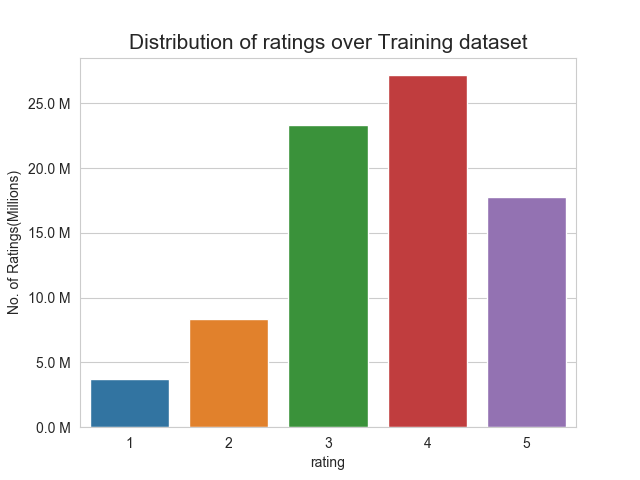

In [14]:
fig, ax = plt.subplots()
plt.title('Distribution of ratings over Training dataset', fontsize=15)
sns.countplot(train_df.rating)
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
ax.set_ylabel('No. of Ratings(Millions)')

plt.show()

<h4> Observations </h4>

<b> *Typically, the Ratings given by users are higher and not lower.* </b>

* Most people give a Movie a rating of 4.
* The second most often found rating in our dataset is 3.
* There are very few people who rate the movie as 1. 1 is the least occuring rating in our dataset.

<p style="font-size:13px"> <b>Add new column (week day) to the data set  for analysis.</b></p>

* We are basically adding a new feature called 'day_of_week' to see if it can be an interesting feature that could be useful in our scenario.

In [15]:
# It is used to skip the warning ''SettingWithCopyWarning''.. 
pd.options.mode.chained_assignment = None  # default='warn'

train_df['day_of_week'] = train_df.date.dt.weekday_name

train_df.tail()

,movie,user,rating,date,day_of_week
80384400,12074,2033618,4,2005-08-08,Monday
80384401,862,1797061,3,2005-08-08,Monday
80384402,10986,1498715,5,2005-08-08,Monday
80384403,14861,500016,4,2005-08-08,Monday
80384404,5926,1044015,5,2005-08-08,Monday


<h3> 3.3.2 Number of Ratings per month </h3>

<IPython.core.display.Javascript object>


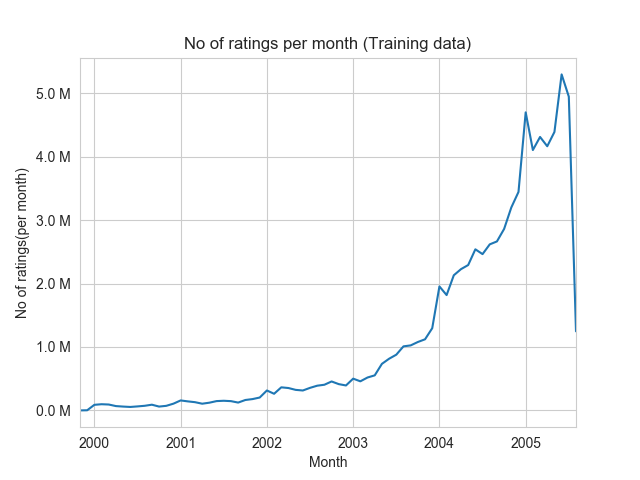

In [16]:
ax = train_df.resample('m', on='date')['rating'].count().plot()
ax.set_title('No of ratings per month (Training data)')
plt.xlabel('Month')
plt.ylabel('No of ratings(per month)')
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
plt.show()

<h4> Observations </h4>

* Y-axis refers to the Number of Ratings per month whereas X-axis refers to the month. (We have the data available from 1999 up till late 2005).
* This shows that the number of ratings that we have increases sharply between 2003 and 2005 : 2003 has approx. 0.5 Million ratings per month whereas 2005 has approx. 4.5 Million Ratings per month.  <b> *This is probably because of the reason that Netflix itself as a company grew a lot during this period.* </b> 
* This curve is only restricted to the Train Data, and this shows that our Test Data is only restricted to a very small window, whereas as seen, our Train Data is much more widespread.
* The Growth should have continued and the Drop in the graph seems to be because of an outlier point.

<h3> 3.3.3 Analysis on the Ratings given by user </h3>

We will take a look at the Average Ratings given by a particular user on a particular movie.

In [17]:
no_of_rated_movies_per_user = train_df.groupby(by='user')['rating'].count().sort_values(ascending=False)

no_of_rated_movies_per_user.head()

user
305344     17112
2439493    15896
387418     15402
1639792     9767
1461435     9447
Name: rating, dtype: int64

<h4> Observations </h4>

* *These are the Number of Movies that are rated by a particular user.* We see that the user with "User ID" = 305344 rated 17112 Movies whereas user with "User ID" = 1461435 rated 9447 Movies.
* This a very high number of ratings for a single user and hence, to explore this further, we plot the PDF and CDF for the number of movie ratings.

<IPython.core.display.Javascript object>


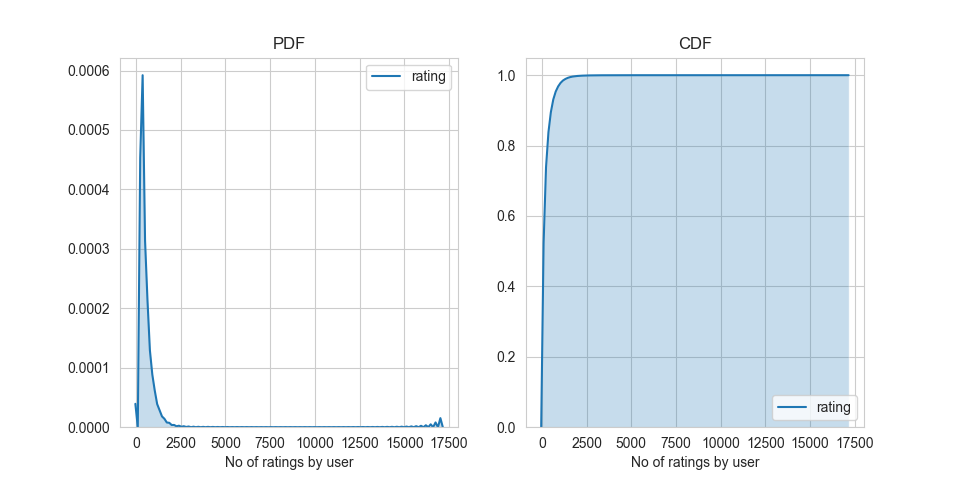

In [18]:
fig = plt.figure(figsize=plt.figaspect(.5))

ax1 = plt.subplot(121)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, ax=ax1)
plt.xlabel('No of ratings by user')
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, cumulative=True,ax=ax2)
plt.xlabel('No of ratings by user')
plt.title('CDF')

plt.show()

<h4> Observations </h4>

* *The PDF Drawn is for the Number of Movies rated by a single user.* By looking at this, we can observe that most users rate only a very few number of movies. However, as seen on the extreme right, there are a few users who rate a large number of movies.
* With the CDF curve we can see that 90% of our users give very very few ratings. However, in order to understand this even further, we can look at the corresponding percentiles for the number of movies that are rated per user.

In [19]:
no_of_rated_movies_per_user.describe()

count    405041.000000
mean        198.459921
std         290.793238
min           1.000000
25%          34.000000
50%          89.000000
75%         245.000000
max       17112.000000
Name: rating, dtype: float64

<h4> Observations </h4>

* The Mean Number of Movies that are rated by a single user is equal to 198. {Average Number of Movies that are rated by a user}. <b> This shows that the users on Netflix typically rate a lot of movies. </b>
* The minimum number of movies rated by a single user is 1 whereas the maximum number of movies rated by a single user is 17112.
* *The 50th Percentile Value can also be called the Median Number.* As seen here, the 50th Percentile Value = 89, which is also quite high. {50% of our total users have rated more than 89 movies}.
* The 75th Percentile value is 245, but between the 75th Percentile and the 100th Percentile values, there is a massive difference. Thus, to further explore this, we can zoom into this range between 75 and 100 percentile values.

> _There,  is something interesting going on with the quantiles.._

In [20]:
quantiles = no_of_rated_movies_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

<IPython.core.display.Javascript object>


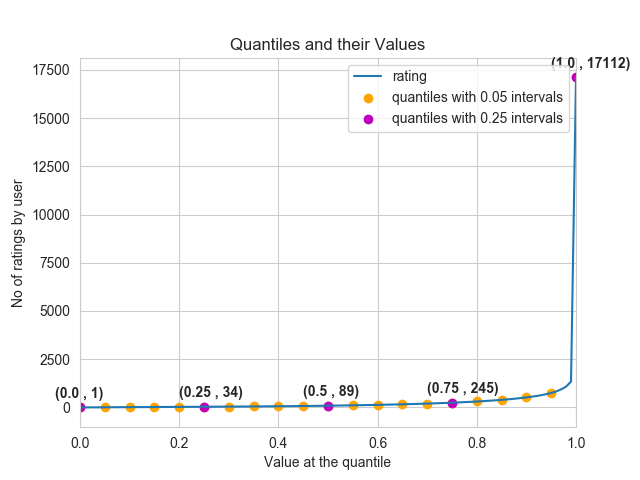

In [21]:
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')

# annotate the 25th, 50th, 75th and 100th percentile values....
for x,y in zip(quantiles.index[::25], quantiles[::25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500)
                ,fontweight='bold')


plt.show()

<h4> Observations </h4>

* The purple dots here denote the 0th,25th,50th,75th and 100th Percentile Values and the yellow dots denote the percentile values which are separated by 5 units. (0th,5th,10th.. and so on).
* As we can see from above, the 95th Percentile value is also reasonably small (<1000) whereas there is a massive jump from 95th to the 100th percentile value.

In [22]:
quantiles[::5]

0.00        1
0.05        7
0.10       15
0.15       21
0.20       27
0.25       34
0.30       41
0.35       50
0.40       60
0.45       73
0.50       89
0.55      109
0.60      133
0.65      163
0.70      199
0.75      245
0.80      307
0.85      392
0.90      520
0.95      749
1.00    17112
Name: rating, dtype: int64

<h4> Observations </h4>

* 90% of our users have rated 15 or more movies.
* By printing each of these percentile values in the 5 unit difference, we can see that the 95th Percentile Value = 749. <b> This means that there are 5% of users on Netflix who rated more than 749 movies. </b>

__How many ratings at the last 5% of all ratings__??

In [23]:
print('\n No of ratings at last 5 percentile : {}\n'.format(sum(no_of_rated_movies_per_user>= 749)) )


 No of ratings at last 5 percentile : 20305



<h3> 3.3.4 Analysis of Ratings of a Movie given by a User </h3>

* What we are trying to do over here is that for a given movie, find the number of users who rated the same. Eg: There are movies like Titanic that are watched by Millions of people across the world, which means that there will be tons of ratings for the same.
* Similarly, there will be movies that are centered to a specific audience which only a very few people will watch.

<IPython.core.display.Javascript object>


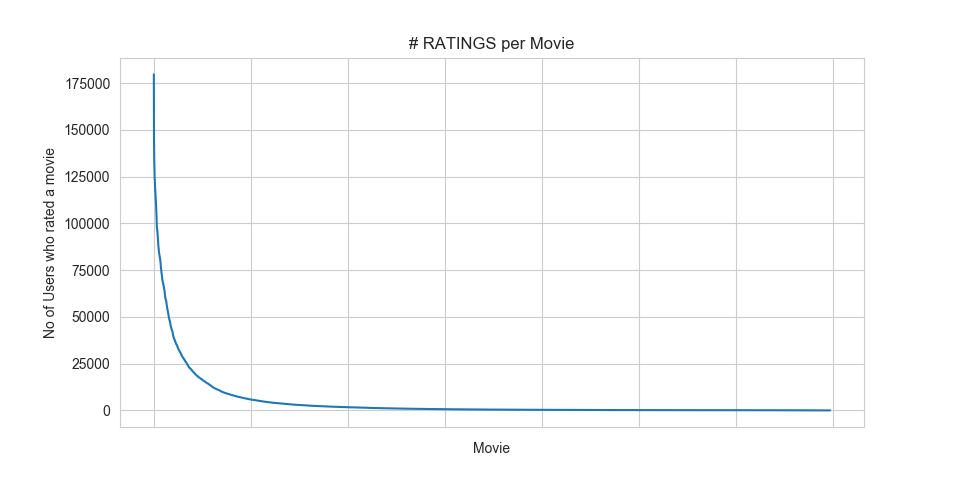

In [24]:
no_of_ratings_per_movie = train_df.groupby(by='movie')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_movie.values)
plt.title('# RATINGS per Movie')
plt.xlabel('Movie')
plt.ylabel('No of Users who rated a movie')
ax.set_xticklabels([])

plt.show()

<h4> Observations </h4>

* The X-axis over here refers to the Movie IDs which have been sorted basis the Number of Ratings. Y-axis refers to the Number of Ratings. We constructed this : Given a Movie, find the number of users who rated that particular movie, sorted by number of users.
* <b> *There are only a very few number of movies (which are very popular) that are rated by a lot of people. But most of the movies (like 90%) are rated only by a very small number of people. { A very skewed distribution }* </b> 


###### <h3> 3.3.5 Number of ratings on each day of the week</h3>

This was a feature that we derived previously from the date value that was provided, and the idea was to understand if the number of ratings differed by day or not.

<IPython.core.display.Javascript object>


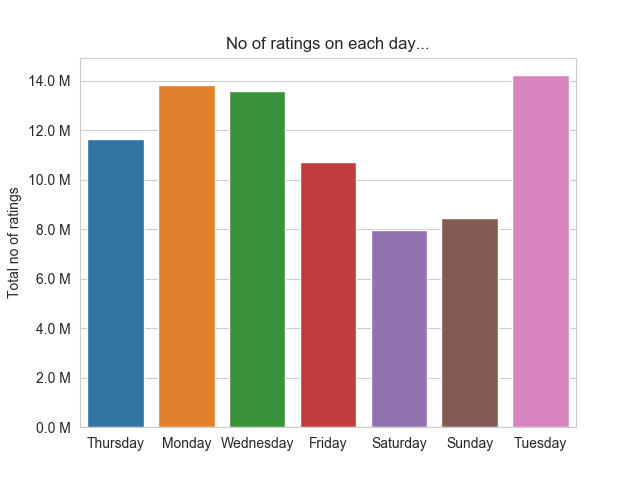

In [25]:
fig, ax = plt.subplots()
sns.countplot(x='day_of_week', data=train_df, ax=ax)
plt.title('No of ratings on each day...')
plt.ylabel('Total no of ratings')
plt.xlabel('')
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
plt.show()

<h4> Observations </h4>

* The X-axis over here denotes the day of the week whereas Y-axis refers to the number of movies that were rated on that particular day.
* We can notice that the Number of ratings given by users on Saturdays and Sundays is far fewer than other days. This could be because in the United States, on Saturdays and Sundays people mostly go on outdoor activities like hiking, skiing etc. <b> This is surprising because in many parts of the world, people watch a lot of movies across the weekend. </b>
* Most of the ratings happen on a Tuesday followed by Monday, and there are much fewer ratings on Fridays, Saturdays and Sundays.
* <b> *A Possible Business Plan that Netflix can apply from this is to recommend more trending and popular movies on Mondays and Tuesdays in comparison to the Weekends.* </b>

<IPython.core.display.Javascript object>


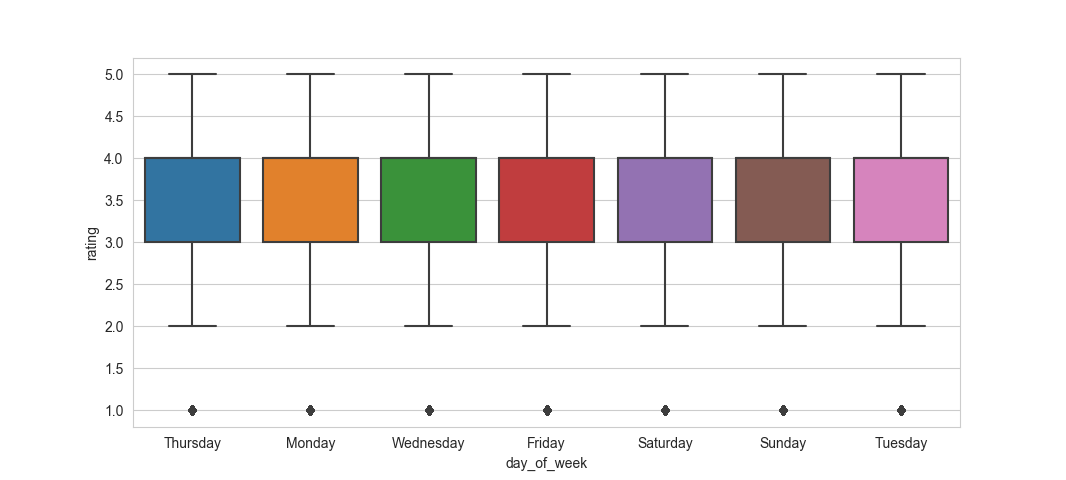

0:00:29.479856


In [26]:
start = datetime.now()
fig = plt.figure(figsize=plt.figaspect(.45))
sns.boxplot(y='rating', x='day_of_week', data=train_df)
plt.show()
print(datetime.now() - start)

<h4> Observations </h4>

* Across here, we have tried to understand if the day of the week on which a movie is rated can be of any indication of the rating that has been given. <b> Do the people watching a movie on a Saturday or a Sunday typically rate the movies higher or lower as compared to the movies watched in the Weekdays? (could day of the week be an interesting feature to predict the rating or not) </b>
* To understand this, we plotted Boxplots for the ratings that are given as per the days of the week and we can observe over here that all of our Boxplots are almost aligned with each other (Not a very good information over here). <b> *We can conclude from this that the 'Day of Week' is not a very good predictor for our Ratings.* </b>   

In [27]:
avg_week_df = train_df.groupby(by=['day_of_week'])['rating'].mean()
print(" Average ratings")
print("-"*30)
print(avg_week_df)
print("\n")

 Average ratings
------------------------------
day_of_week
Friday       3.585274
Monday       3.577250
Saturday     3.591791
Sunday       3.594144
Thursday     3.582463
Tuesday      3.574438
Wednesday    3.583751
Name: rating, dtype: float64




<h4> Observations </h4>

* Just to be very sure of our conclusion from the Boxplot above, we computed the average ratings that have been given by user on a particular day of the week. <b> *Our Ratings over here can range from 1 to 5, and as we can see from here, all of our ratings are very close to each other (around 3.5).* </b>
* This is a very important conclusion and we can stop using this field called 'day of the week' : It won't make a difference.

<h3> 3.3.6 Creating Sparse Matrix from Data Frame </h3>

<table>
<tr>
<td>
<img src='images/data_c.jpg' width='250px' align=left/>
</td>
<td>
<img src='images/arrow.jpg' width='60px' align=left/>
</td>
<td>
<img src='images/data_sparse_c.jpg' width='400px' align=left/>
</td>
</tr>
</table>

* Right now, our dataframe looks like the one shown above on the left where we have our 'Movie ID', 'User ID' and 'Rating' and 'Date' as the Columns. <b> We can discard the Date over here because the necessity of the Date field was just in sorting the data by date obtaining our Train and Test Datasets. </b>
* We want to convert this dataframe into a Matrix representation such that all the ratings given by a user are in a particular row and all the ratings for a particular movie be in that corresponding column. *This Matrix that we obtain is called Matrix A : Adjacency Matrix.*
* For simplicity, as shown in the Matrix Representation above, suppose  we have 3 users and 10 movies. U1 will not rate all the 10 movies but only a subset of movies. All of the remaining values are left blank. *Basically, the row corresponding to U1 is Sparse because most ratings do not exist.*

* To convert a dataframe into a Sparse Matrix Representation, in scipy there is a function called 'csr_matrix'. {Documentation says that this is a Compressed Sparse Row Matrix}

* If we have approx. 480K users and a total of 17K movies, this Matrix itself will be very large in size. 

          (480K * 17K) => 8160 Million = 8.1 Billion cells.
  
  ie there are a total of 8.1 Billion Cells in this Matrix. 
* Assuming that each cell over here takes 4 Bytes, we have a total of (8.1 Billion * 4) => Approx. 32 GB of Memory is needed. <b> *This means that all of our RAM over here would be taken up by this matrix.* </b>
* Because we have most of our entries in the matrix as null/non-existent, the 'Compressed Sparse Row Matrix' works with a lot of Data Structures internally : *Assume that only 1% of the cells in the matrix are non-zero. Therefore the 'csr_matrix' representation of scipy uses not 32 GB, but only approx. 1% of this memory is used.*

* If the Sparsity of a Matrix = 99%, it means that only 1% of cells in this big matrix have a valid value.
   

<h4> 3.3.6.1 Creating Sparse Matrix from Train Data frame </h4>

In [28]:
start = datetime.now()
if os.path.isfile('train_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    train_sparse_matrix = sparse.load_npz('train_sparse_matrix.npz')
    print("DONE..")
else: 
    print("We are creating sparse_matrix from the dataframe..")
    # create sparse_matrix and store it for after usage.
    # csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
    # It should be in such a way that, MATRIX[row, col] = data
    train_sparse_matrix = sparse.csr_matrix((train_df.rating.values, (train_df.user.values,
                                               train_df.movie.values)),)
    
    print('Done. It\'s shape is : (user, movie) : ',train_sparse_matrix.shape)
    print('Saving it into disk for further usage..')
    # save it into disk
    sparse.save_npz("train_sparse_matrix.npz", train_sparse_matrix)
    print('Done..\n')

print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:04.463023


<p><b>The Sparsity of Train Sparse Matrix</b></p>

In [29]:
us,mv = train_sparse_matrix.shape
elem = train_sparse_matrix.count_nonzero()

print("Sparsity Of Train matrix : {} % ".format(  (1-(elem/(us*mv))) * 100) )

Sparsity Of Train matrix : 99.8292709259195 % 


<h4> Observations </h4>

* We notice here that the Sparsity of the Train Matrix = 99.829%, which means that 99.829% of cells are all non-existent: there is no rating given here by any user. {For the Training data, out of all the 8 Billion odd possible ratings, we only have approx. 80 Million Ratings in total}. 

<h4> 3.3.6.2 Creating sparse matrix from test data frame </h4>

In [30]:
start = datetime.now()
if os.path.isfile('test_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    test_sparse_matrix = sparse.load_npz('test_sparse_matrix.npz')
    print("DONE..")
else: 
    print("We are creating sparse_matrix from the dataframe..")
    # create sparse_matrix and store it for after usage.
    # csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
    # It should be in such a way that, MATRIX[row, col] = data
    test_sparse_matrix = sparse.csr_matrix((test_df.rating.values, (test_df.user.values,
                                               test_df.movie.values)))
    
    print('Done. It\'s shape is : (user, movie) : ',test_sparse_matrix.shape)
    print('Saving it into disk for further usage..')
    # save it into disk
    sparse.save_npz("test_sparse_matrix.npz", test_sparse_matrix)
    print('Done..\n')
    
print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:01.209042


<p><b>The Sparsity of Test Data Matrix</b></p>

In [31]:
us,mv = test_sparse_matrix.shape
elem = test_sparse_matrix.count_nonzero()

print("Sparsity Of Test matrix : {} % ".format(  (1-(elem/(us*mv))) * 100) )

Sparsity Of Test matrix : 99.95731772988694 % 


<h4> Observations </h4>

* Just like we computed the Sparse Matrix Representation for the Train Data, we compute the same for the Test Data, and just like the Train Data, the sparsity for the Test Data Representation is also extremely similar to the Train Data Sparsity. <b> Our Data is Extremely Sparse. </b>

<h3>3.3.7 Finding Global average of all movie ratings, Average rating per user, and Average rating per movie</h3>

* We are trying to compute Average or Mean for various slices of data : We have a Sparse Matrix Representation where each row represents a user and each column represents a movie. We want to compute quite a few means.

<h4> Global Average of All Ratings </h4> 

* The Global Mean of all ratings can be basically obtained from all the cells in our sparse matrix that have a non-null value. *This will tell us the Mean Rating given by any user on any given movie : <b> The Average Rating that has been given by all of our Netflix Users. </b>*
* This is a single value and can be represented by μ.

<h4> User Averages (Average Rating per User) </h4>

* We saw that the Median of Number of Ratings that have been given by a user = 89. Therefore in a row corresponding to an average user, we should find considerable good number of ratings. (The 10th Percentile Value for the same is 15 ie. there are 90% users who have rated 15 or more movies).
* This means that for a particular user we should have considerable amount of data. Therefore we try and compute the User Means or User Averages, which means that we compute the average value for a particular row. <b> *This tells us whether a user typically gives high ratings or low ratings.* </b> *{Some Users are very critical whereas some other users are very lenient in their ratings}.*
* This is a vector value because for every user Ui we get an Average User Rating.

<h4> Movie Averages </h4>

* If you take a look at a particular column, it corresponds to the ratings for a particular movie. If we take the average of all the cells in a particular column, the corresponding value that we obtain is the Movie Average. *Some movies such as Titanic tend to get a very high rating whereas bad movies tend to get a very low rating.*
* This is also a vector value because for every movie Mj we get an Average Movie Rating.


===================================================================================================================

* The function 'get_average_ratings' given below computes all of our required averages and puts the same in a dictionary. *The Dictionary can have the Key as the User ID or Movie ID, and the Value as the Average.*


In [32]:
# get the user averages in dictionary (key: user_id/movie_id, value: avg rating)

def get_average_ratings(sparse_matrix, of_users):
    
    # average ratings of user/axes
    ax = 1 if of_users else 0 # 1 - User axes,0 - Movie axes

    # ".A1" is for converting Column_Matrix to 1-D numpy array 
    sum_of_ratings = sparse_matrix.sum(axis=ax).A1
    # Boolean matrix of ratings ( whether a user rated that movie or not)
    is_rated = sparse_matrix!=0
    # no of ratings that each user OR movie..
    no_of_ratings = is_rated.sum(axis=ax).A1
    
    # max_user  and max_movie ids in sparse matrix 
    u,m = sparse_matrix.shape
    # creae a dictonary of users and their average ratigns..
    average_ratings = { i : sum_of_ratings[i]/no_of_ratings[i]
                                 for i in range(u if of_users else m) 
                                    if no_of_ratings[i] !=0}

    # return that dictionary of average ratings
    return average_ratings

<h4> 3.3.7.1 Finding Global Average of all Movie Ratings </h4>

In [33]:
train_averages = dict()
# get the global average of ratings in our train set.
train_global_average = train_sparse_matrix.sum()/train_sparse_matrix.count_nonzero()
train_averages['global'] = train_global_average
train_averages

{'global': 3.582890686321557}

<h4> Observations </h4>

* If we take the entire Training data and compute the Training Global Average, we see that the average rating that we get across the entire Training Dataset is 3.58.

<h4> 3.3.7.2 Finding Average Rating per User</h4>

In [34]:
train_averages['user'] = get_average_ratings(train_sparse_matrix, of_users=True)
print('\nAverage rating of user 10 :',train_averages['user'][10])


Average rating of user 10 : 3.3781094527363185


<h4> Observations </h4>

* We can compute the Training Average for each user, by using the 'get_average_ratings' function that we defined earlier.
* We can have a look at the User 10 as an example, who gives a rating of 3.37 to his movies on an average.

<h4> 3.3.7.3 Finding Average Rating per Movie</h4>

In [35]:
train_averages['movie'] =  get_average_ratings(train_sparse_matrix, of_users=False)
print('\n Average rating of movie 15 :',train_averages['movie'][15])


 Average rating of movie 15 : 3.3038461538461537


<h4> Observations </h4>

* Similarly we can compute the Training Average for each movie, again, by using the same function.
* Here, we have a look at the Movie 15 as an example, which has been rated 3.30 out of 5 across all of our users in the dataset.

<h4> 3.3.7.4 PDFs & CDFs of Avg.Ratings of Users & Movies (In Train Data)</h4>

* For each user in the Dataset, we have the User Average and for each movie in our dataset we have the corresponding Movie Average. {Both of these are vectors}.
* We see the distribution of each of these metrics with their PDF and CDF values as shown below.

<IPython.core.display.Javascript object>


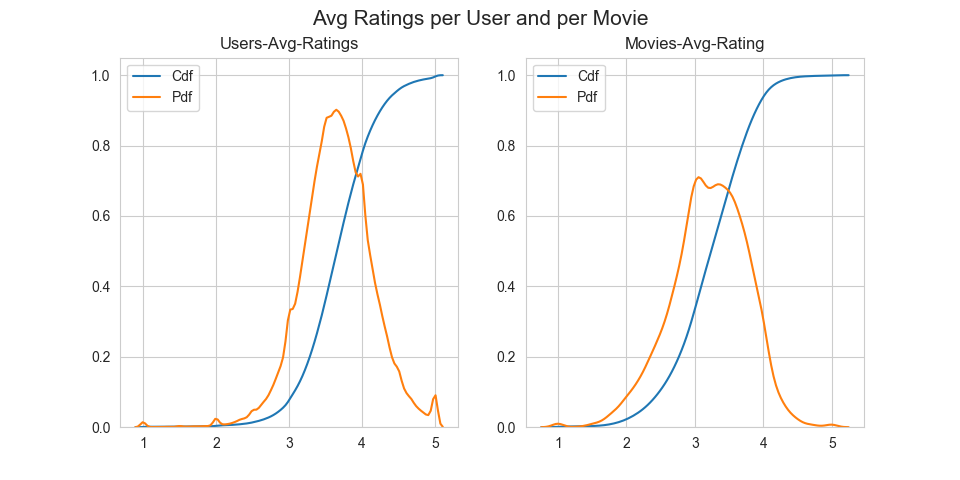

0:01:00.319633


In [36]:
start = datetime.now()
# draw pdfs for average rating per user and average
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(.5))
fig.suptitle('Avg Ratings per User and per Movie', fontsize=15)

ax1.set_title('Users-Avg-Ratings')
# get the list of average user ratings from the averages dictionary..
user_averages = [rat for rat in train_averages['user'].values()]
sns.distplot(user_averages, ax=ax1, hist=False, 
             kde_kws=dict(cumulative=True), label='Cdf')
sns.distplot(user_averages, ax=ax1, hist=False,label='Pdf')

ax2.set_title('Movies-Avg-Rating')
# get the list of movie_average_ratings from the dictionary..
movie_averages = [rat for rat in train_averages['movie'].values()]
sns.distplot(movie_averages, ax=ax2, hist=False, 
             kde_kws=dict(cumulative=True), label='Cdf')
sns.distplot(movie_averages, ax=ax2, hist=False, label='Pdf')

plt.show()
print(datetime.now() - start)

<h4> Observations </h4>

<h5> User Average Ratings </h5>

* The Orange curve on the left denotes the PDF Curve for the User Average Ratings and the Blue Curve denotes the CDF Curve for the User Average Ratings.
* *The PDF Curve over here almost looks like Gaussian* : It is not exactly Gaussian because the PDF Curve over here has a longer tail. (left side).
* The peak for the PDF Curve is approx. 3.5, which means that the average rating given by most users is approx. 3.5.
* <b> *The User Averages tell us whether a user is very critical or he/she is very lenient with his/her ratings.* </b>


<h5> Movie Average Ratings </h5>

* The Orange curve on the right denotes the PDF Curve for the Movie Average Ratings and the Blue Curve denotes the CDF Curve for the Movie Average Ratings.
* The peak for the PDF Curve is approx. 3.0, which means that the average rating for each movie in our dataset is 3.0.
* <b> *The Movie Averages tell us whether the movie is critically acclaimed by users or not.* </b>

<h3> 3.3.8 Cold Start problem </h3>

* Cold Start Problem is a very Important Issue that we face in the case of Recommender Systems.
* Remember that in our scenario we have sliced our data across Time. Thus, if our X-axis represents time, we have taken the oldest 80% of our available data as Training Data and the last 20% of our available data as Test Data.
* Netflix is a continuosly growing business. <b> Therefore there will be some users who are not present in the Training Data and are only present in the Test Data. </b> 
* *Eg : Suppose our Training Data is from 1999 till 2005 and our Test Data is from 2005 to 2006. There will be users who joined Netflix between 2005 and 2006. Similarly, there will also be new movies that are released during this time period for whom we do not have any data available in our Training Dataset : no user information and no movie information is available.*
* Thus we will try and understand the number of new users and number of new movies that are there in our Test Data and the corresponding percentage for the same.

<h4> 3.3.8.1 Cold Start problem with Users</h4>

In [37]:
total_users = len(np.unique(df.user))
users_train = len(train_averages['user'])
new_users = total_users - users_train 

print('\nTotal Number of Users  :', total_users)
print('\nNumber of Users in Train data :', users_train)
print("\nNo of Users that didn't appear in Train Data: {}({} %) \n ".format(new_users,
                                                                        np.round((new_users/total_users)*100, 2)))


Total Number of Users  : 480189

Number of Users in Train data : 405041

No of Users that didn't appear in Train Data: 75148(15.65 %) 
 


<h4> Observations </h4>

* There are a total of 480189 users across our entire Dataset (Train + Test) out of which 405041 users are present in our Training Data and there are 75148 users that are present only in Test Data. 75148 users (about 15% of our entire data user count) are present only in the Test Data, which we might have to handle.
* <b> This means that the Cold Start Problem is fairly severe with respect to users. </b> *This is because Netflix is growing rapidly over time.* 

<h4> 3.3.8.2 Cold Start Problem with Movies</h4>

In [38]:
total_movies = len(np.unique(df.movie))
movies_train = len(train_averages['movie'])
new_movies = total_movies - movies_train

print('\nTotal number of Movies  :', total_movies)
print('\nNumber of Users in Train data :', movies_train)
print("\nNo of Movies that didn't appear in train data: {}({} %) \n ".format(new_movies,
                                                                        np.round((new_movies/total_movies)*100, 2)))


Total number of Movies  : 17770

Number of Users in Train data : 17424

No of Movies that didn't appear in train data: 346(1.95 %) 
 


<h4> Observations </h4>

* Looking at the same problem across Movies, we see that there are a total of 17770 movies across our entire Dataset (Train + Test) out of which 17424 movies are present in our Training Data and there are 346 movies that are present only in Test Data. 346 movies (about 1.95% of our entire data user count) are present only in the Test Data, which we might have to handle.
* Only 1.95% of movies are present in our Test Data which do not have a corresponding rating present in our Train Dataset. <b> This means that the Cold Start Problem is not very severe with respect to movies, but it is fairly severe when it comes to our users. </b> 

<h2> 3.4 Computing Similarity Matrices </h2>

<h3> 3.4.1 Computing User-User Similarity Matrix </h3>

* One of the most basic things in the concept of Recommender Systems is the computation of User-User Similarity and Item-Item Similarity. *So, firstly we will have a look at the user-user similarity and have a look at the real world challenges that we face when we try something like this.*
* Our Training Data has approx. 405K rows (each row corresponds to a user) and approx. 17K columns (each column corresponds to a movie).
* If we want to compute the User-User Similarity, we can take Ui as a User Vector : This has ratings given by the user Ui on all the movies in our Training Data, and of course, most of these ratings will be null. (Let nulls be 0 for simplicity). *This can be taken as the Vector Representation for our user Ui (belongs to 17K dimensions).*
<b> Remember that this Vector Ui is a Sparse Vector </b>
* Imagine that we have another user Uj which is also of 17K dimensionality. If we consider the cosine- similarity between Ui and Uj { *which can be computed with the help of dot product* }, 

        it is equal to (Ui)^T * (Uj) 
                                    = (Uik)*(Ujk) { for all k from 1 to 17K }

* We have already been provided with a Matrix A where each row is a user and each column is a movie. (Size of Matrix A = 405K * 17K).
* The User-Similarity matrix (denoted as Su) is of size (405K * 405K). This is a square matrix and here, each row as well as each column corresponds to a user. *The intersecting cell for a pair of users denotes the similarity value between users Ui and Uj, which is = (Ui)^T * (Uj)*.
* This (405K * 405K) User - Similarity Matrix is very large and is not sparse at all. <b> This matrix is not sparse because for every pair of users in our dataset, we can compute the corresponding similarity value. </b>
* Also remember that <b> this matrix is symmetric. </b> Sij = Sji : similarity value remains the same irrespective of the order in which we denote the same. *This is because (Ui)^T * (Uj) = (Uj)^T * (Ui).*

-------------------------------------------------------------------------------------------------------------------

* Total Number of Multiplications (dot products) that we need to compute = {(405K * 405K)/2}. (divided by 2 because the matrix is symmetric). When we compute this, this value is approx. 82 Billion, which is super expensive to compute.
* Calculating User User Similarity Matrix is not very easy, (unless we have huge Computing Power and lots of time available) because of the number of users being large.

    * You can try if you want to. Your system could crash or the program stops with a **Memory Error**.

<h4> 3.4.1.1 Trying with all dimensions (17k dimensions per user) </h4>

In [39]:
from sklearn.metrics.pairwise import cosine_similarity


def compute_user_similarity(sparse_matrix, compute_for_few=False, top = 100, verbose=False, verb_for_n_rows = 20,
                            draw_time_taken=True):
    no_of_users, _ = sparse_matrix.shape
    # get the indices of  non zero rows(users) from our sparse matrix
    row_ind, col_ind = sparse_matrix.nonzero()
    row_ind = sorted(set(row_ind)) # we don't have to
    time_taken = list() #  time taken for finding similar users for an user..
    
    # we create rows, cols, and data lists.., which can be used to create sparse matrices
    rows, cols, data = list(), list(), list()
    if verbose: print("Computing top",top,"similarities for each user..")
    
    start = datetime.now()
    temp = 0
    
    for row in row_ind[:top] if compute_for_few else row_ind:
        temp = temp+1
        prev = datetime.now()
        
        # get the similarity row for this user with all other users
        sim = cosine_similarity(sparse_matrix.getrow(row), sparse_matrix).ravel()
        # We will get only the top ''top'' most similar users and ignore rest of them..
        top_sim_ind = sim.argsort()[-top:]
        top_sim_val = sim[top_sim_ind]
        
        # add them to our rows, cols and data
        rows.extend([row]*top)
        cols.extend(top_sim_ind)
        data.extend(top_sim_val)
        time_taken.append(datetime.now().timestamp() - prev.timestamp())
        if verbose:
            if temp%verb_for_n_rows == 0:
                print("computing done for {} users [  time elapsed : {}  ]"
                      .format(temp, datetime.now()-start))
            
        
    # lets create sparse matrix out of these and return it
    if verbose: print('Creating Sparse matrix from the computed similarities')
    #return rows, cols, data
    
    if draw_time_taken:
        plt.plot(time_taken, label = 'time taken for each user')
        plt.plot(np.cumsum(time_taken), label='Total time')
        plt.legend(loc='best')
        plt.xlabel('User')
        plt.ylabel('Time (seconds)')
        plt.show()
        
    return sparse.csr_matrix((data, (rows, cols)), shape=(no_of_users, no_of_users)), time_taken      

Computing top 100 similarities for each user..
computing done for 20 users [  time elapsed : 0:01:48.198722  ]
computing done for 40 users [  time elapsed : 0:03:40.148448  ]
computing done for 60 users [  time elapsed : 0:05:32.788994  ]
computing done for 80 users [  time elapsed : 0:07:15.823836  ]
computing done for 100 users [  time elapsed : 0:09:07.061737  ]
Creating Sparse matrix from the computed similarities


<IPython.core.display.Javascript object>


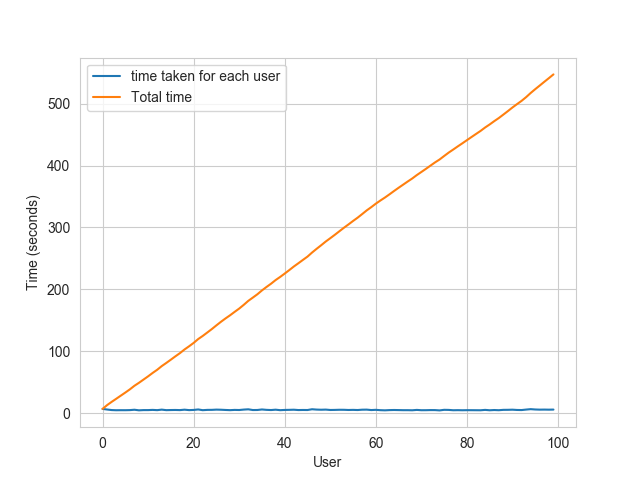

----------------------------------------------------------------------------------------------------
Time taken : 0:09:20.509743


In [41]:
start = datetime.now()
u_u_sim_sparse, _ = compute_user_similarity(train_sparse_matrix, compute_for_few=True, top = 100,
                                                     verbose=True)
print("-"*100)
print("Time taken :",datetime.now()-start)

<h4> Observations </h4>

* Instead of running the code for our 405K users in total, we try the same for 100 users. *We notice that the graph that we obtain over here is very simple : As our number of users grows, the time to compute the corresponding user matrix also grows.*
* From above plot we can conclude that it took us roughly 8.88 sec for computing the simlilar users for a single user. This means that computing the similarity values for a user Ui and all the other users (U1,U2,U3.....U405K) {this is basically the same as computing the dot product between Ui and all the other users}, and to obtain the top similar users for Ui, it takes about 8.88 seconds.
* But we have a total of 4,05,041 users in our data :
 
 ${ 405041 \times 8.88 = 3596764.08  \sec } =  59946.068 \min = 999.101133333 \text{ hours} = 41.629213889 \text{ days}...$

* *Basically, it would take us 41 days to compute this for all of our users ie. to compute the Su.*
*  Since there are 4 cores on any of our modern computers, we can parallelize this entire process such that we can compute for a single user parallely on one of our 4 cores : We can compute the similar users to U1 on Core 1, similar users to U2 on Core 2 and so on. *But the problem is that even if we parallelize this entire operation on 4 cores, it would still take us 10.5 days to obtain our Su.*

===================================================================================================================

* Since each of our users belongs to 17K Dimensions, one of the ideas that we can think about is to carry out Dimensionality Reduction to 500 or so dimensions. Eg : Ui~ with 500 Dimensions. Now we can compute Su on these Ui~ values. *This can be easily achieved by the use of SVD or any of our Dimensionality Reduction Techniques (PCA,TSNE etc).*
* We carry out this entire analysis as shown below, but there is a flaw in this approach. The earlier approach after parallelization (4-Cores) resulted in Su computation in 10.5 days, whereas now this approach would take a longer time : 14 - 15 days.

<h4> 3.4.1.2 Trying with reduced dimensions (Using TruncatedSVD for dimensionality reduction of user vector)</h4>

<h4> Note </h4>

***Even though the following is a Failed Experiment, there is an important lesson that we can learn from this.*** 

In [ ]:
from datetime import datetime
from sklearn.decomposition import TruncatedSVD

start = datetime.now()

# initilaize the algorithm with some parameters..
# All of them are default except n_components. n_itr is for Randomized SVD solver.
netflix_svd = TruncatedSVD(n_components=500, algorithm='randomized', random_state=15)
trunc_svd = netflix_svd.fit_transform(train_sparse_matrix)

print(datetime.now()-start)

Here,


- $\sum \longleftarrow$ (netflix\_svd.**singular\_values\_** )


- $\bigvee^T \longleftarrow$ (netflix\_svd.**components_**)


- $\bigcup$ is not returned. instead **Projection_of_X** onto the new vectorspace is returned. 


- It uses **randomized svd** internally, which returns **All 3 of them saperately**. Use that instead.. 

In [0]:
expl_var = np.cumsum(netflix_svd.explained_variance_ratio_)

<IPython.core.display.Javascript object>


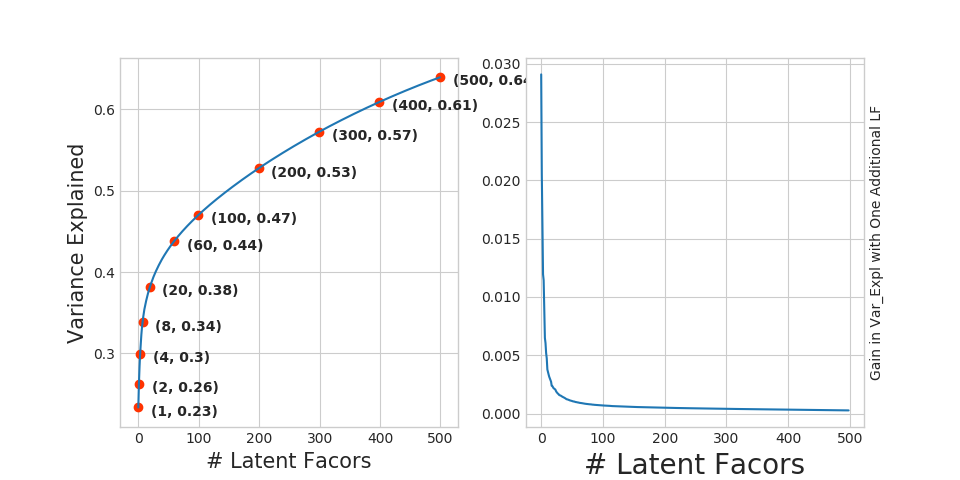

In [0]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(.5))

ax1.set_ylabel("Variance Explained", fontsize=15)
ax1.set_xlabel("# Latent Factors", fontsize=15)
ax1.plot(expl_var)
# annote some (latentfactors, expl_var) to make it clear
ind = [1, 2,4,8,20, 60, 100, 200, 300, 400, 500]
ax1.scatter(x = [i-1 for i in ind], y = expl_var[[i-1 for i in ind]], c='#ff3300')
for i in ind:
    ax1.annotate(s ="({}, {})".format(i,  np.round(expl_var[i-1], 2)), xy=(i-1, expl_var[i-1]),
                xytext = ( i+20, expl_var[i-1] - 0.01), fontweight='bold')

change_in_expl_var = [expl_var[i+1] - expl_var[i] for i in range(len(expl_var)-1)]
ax2.plot(change_in_expl_var)

ax2.set_ylabel("Gain in Var_Expl with One Additional LF", fontsize=10)
ax2.yaxis.set_label_position("right")
ax2.set_xlabel("# Latent Factors", fontsize=20)

plt.show()

In [0]:
for i in ind:
    print("({}, {})".format(i, np.round(expl_var[i-1], 2)))

(1, 0.23)
(2, 0.26)
(4, 0.3)
(8, 0.34)
(20, 0.38)
(60, 0.44)
(100, 0.47)
(200, 0.53)
(300, 0.57)
(400, 0.61)
(500, 0.64)


 
> We believe that the 500 dimensions is good enough. 

---------

-  By just taking __(20 to 30)__ latent factors, explained variance that we could get is __20 %__. 

- To take it to __60%__, we have to take  __almost 400 latent factors__. It is not fare.



- It basically is the __gain of variance explained__, if we ___add one additional latent factor to it.___


- By adding one by one latent factore too it, the ___gain in expained variance__ with that addition is decreasing. (Obviously, because they are sorted that way).
- ___LHS Graph___:
    - __x__ --- ( No of latent factos ),
    - __y__ --- ( The variance explained by taking x latent factors)



- __More decrease in the line (RHS graph) __:
    - We  are getting more expained variance than before.
- __Less decrease in that line (RHS graph)__  :
    - We are not getting benifitted from adding latent factor furthur. This is what is shown in the plots.


- ___RHS Graph___:
    - __x__ --- ( No of latent factors ),
    - __y__ --- ( Gain n Expl_Var by taking one additional latent factor) 

In [0]:
# Let's project our Original U_M matrix into into 500 Dimensional space...
start = datetime.now()
trunc_matrix = train_sparse_matrix.dot(netflix_svd.components_.T)
print(datetime.now()- start)

0:00:45.670265


In [0]:
type(trunc_matrix), trunc_matrix.shape

(numpy.ndarray, (2649430, 500))

* Now we convert this to the Actual Sparse Matrix and store it for future purposes.

In [0]:
if not os.path.isfile('trunc_sparse_matrix.npz'):
    # create that sparse sparse matrix
    trunc_sparse_matrix = sparse.csr_matrix(trunc_matrix)
    # Save this truncated sparse matrix for later usage..
    sparse.save_npz('trunc_sparse_matrix', trunc_sparse_matrix)
else:
    trunc_sparse_matrix = sparse.load_npz('trunc_sparse_matrix.npz')

In [0]:
trunc_sparse_matrix.shape

(2649430, 500)

Computing top 50 similarities for each user..
computing done for 10 users [  time elapsed : 0:02:09.746324  ]
computing done for 20 users [  time elapsed : 0:04:16.017768  ]
computing done for 30 users [  time elapsed : 0:06:20.861163  ]
computing done for 40 users [  time elapsed : 0:08:24.933316  ]
computing done for 50 users [  time elapsed : 0:10:28.861485  ]
Creating Sparse matrix from the computed similarities


<IPython.core.display.Javascript object>


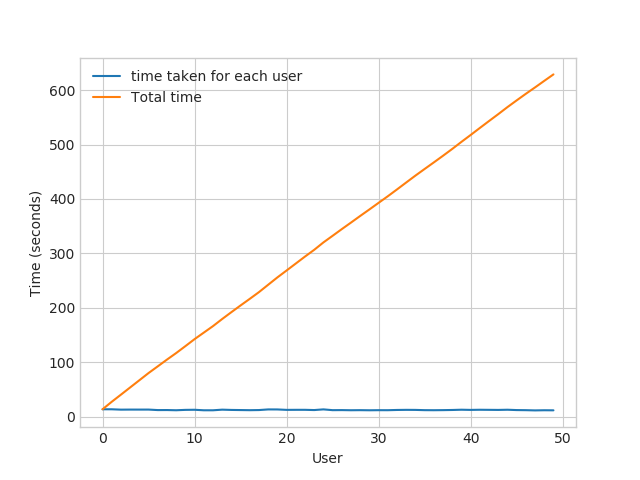

--------------------------------------------------
time: 0:10:52.658092


In [0]:
start = datetime.now()
trunc_u_u_sim_matrix, _ = compute_user_similarity(trunc_sparse_matrix, compute_for_few=True, top=50, verbose=True, 
                                                 verb_for_n_rows=10)
print("-"*50)
print("time:",datetime.now()-start)

***This is taking more time for each user than Original one.***


* From the above plot, It took almost __12.18__ for computing simlilar users for __one user__.
* We have __405041 users__ with us in training set.

- ${ 405041 \times 12.18 ==== 4933399.38 \sec } ====  82223.323 \min ==== 1370.388716667 \text{ hours}
==== 57.099529861 \text{ days}...$

- Even we run on 4 cores parallelly (a typical system now a days), It will still take almost __(14 - 15) __ days.

<h4> Q. Why is this happening that after Dimensionality Reduction our Similarity Matrix Computation is taking a longer time> </h4>

* Initially, when we had a 17K dimensional vector, our vector was sparse. Even though we had a 17K dimensionality, only a small subset of them are non-zero. {If there is a zero value in any of our 2 vectors that we are comparing, we do not have to carry out the multiplication}. <b> The advantage is that in the case of sparse matrix representation, the system already knows where are the non-zero values present. It does not have to go through every single step -> Stored in a csr matrix. </b>
* *This means that in the first approach even though there are 17K values in our vectors, we are not computing 17K multiplications to compute the value of (Ui)^T * (Uj). 
* In the second approach we converted our 17K dimensional vector into a 500 dimensional vector after carrying out PCA/SVD. Now it is to be noted that Ui~ is not a sparse, but a dense vector. This means that now if we take Ui~ and Uj~, even though there are only 500 dimensions, each of our dimensions has a certain value. *Therefore we must need to carry out 500 multiplications and 499 additions in this case.*

***The most critical point over here is that Ui~ is a Dense 500 Dimensional Vector whereas our Original Vector is a Sparse Vector. Because we represent it as a Sparse Matrix, it takes less time than the scenario where we carry out dimensionality reduction with the help of PCA/SVD.***

===================================================================================================================

* Because our Su Computation takes us 10.5 days and we won't be able to compute it in the traditional manner, we develop a hack to work on the same.

__Is there any other way to compute User-User Similarity..??__

* If we have a User Ui and if we have to find similar users to Ui, it was taking us approx. 8.88 seconds. So the idea is that instead of computing Su and keeping it ready, an alternative is to compute the similar users to a particular user whenever needed : At Runtime.
* We also maintain a Binary Vector called 'iscomputed' for the same which has a single value for each user : Since we have a total of 405K users, we have 405K dimensionality : 405K Values. Hence for a vector, if we have already computed this we will set the corresponding cell value to 1 and we set it to 0 otherwise.
* Also, if we have already computed the Top 100 or the Top 1000 users to a user U1, we store the corresponding information in a Dictionary.
* Assume that initially our Binary Vector 'iscomputed' is empty, and now we compute the 1000 most similar users to U1 and store the same in a Dictionary. 'iscomputed' value corresponding to U1 is changed to 1. We create a Dictionary such that our Key is 1 and our Value is another Dictionary : The most similar user to U1 (let it be U3), and the corresponding similarity value (let it be 0.8), followed by (U2,0.6)....(U1634,0.12). {We have a Dictionary of Dictionaries}.
* This technique is fine because there could be many user combinations that we may not require at all.

=================================================================================================================== 

<h4> Summary </h4>

* Compute top (let's just say, 1000) most similar users for the given user, and add this to our data structure, so that we can just access the similar users without recomputing it again.
   
<b> If It is already Computed: </b>:

* Just get it directly from our data structure, which has that information.
* In production time, We might have to recompute similarities, if it is computed a long time ago because user preferences changes over time. If we could maintain some kind of Timer, which when expires, we have to update it ( recompute it ). 

<b> Which Data Structure to use? </b>

* It is purely implementation dependant. 
* One simple method is to maintain a **Dictionary Of Dictionaries**.
            
            - Key    : User ID 
            - Value: Again a dictionary
            - Key  : Similar User
            - Value: Similarity Value

<h3> 3.4.2 Computing Movie-Movie Similarity Matrix </h3>

* If we have a Movie Vector Mi and a Movie Vector Mj, both of these are high dimensional : In a Big Matrix, we have the rows that are representing the users and columns that are representing the movies. 
* Our Matrix is of size (405K * 17K), which means our Movie vectors are High Dimensional of Dimensionality = 405K.
* <b> But the Best Part in the case of Movie Vectors is the part that this particular vector will be extremely sparse. </b>
* Now, if we want to compute the Movie Similarity Matrix, because we have a total of 17K movies, this matrix will be of the size (17K * 17K), where the interesecting cell value between Mi and Mj is the similarity value between these 2 movies Mi and Mj. => (Mi)^T * (Mj). *{Using Cosine Similarity}*
* *Again, this Matrix will be Symmetric as well as Dense.* Just like in the case of the User-User Similarity Matrix, here also we have to carry out : {(17K * 17K)/2} Computations. => Approx. 144 Million Computations of (Mi)^T * (Mj).
* This number that we obtained (144 Million) is very very less as compared to the number (82 Billion) that we saw earlier in the case of User-User Similarity Matrix. <b> Thus, the computation of this similarity matrix should not be hard because we are computing 144 Million Similarities. </b> : csr matrix representation helps us in improving the efficiency.
* When we run the code for this implementation as shown below, it took us a total of 10 minutes. This is without parallelization and is much much quicker than 10.5 days in the case of User-User Similarity Matrix computation. Sparse Matrix is also loaded to the disk to have it available whenever we need it. 

In [42]:
start = datetime.now()
if not os.path.isfile('m_m_sim_sparse.npz'):
    print("It seems you don't have that file. Computing movie_movie similarity...")
    start = datetime.now()
    m_m_sim_sparse = cosine_similarity(X=train_sparse_matrix.T, dense_output=False)
    print("Done..")
    # store this sparse matrix in disk before using it. For future purposes.
    print("Saving it to disk without the need of re-computing it again.. ")
    sparse.save_npz("m_m_sim_sparse.npz", m_m_sim_sparse)
    print("Done..")
else:
    print("It is there, We will get it.")
    m_m_sim_sparse = sparse.load_npz("m_m_sim_sparse.npz")
    print("Done ...")

print("It's a ",m_m_sim_sparse.shape," dimensional matrix")

print(datetime.now() - start)

It is there, We will get it.
Done ...
It's a  (17771, 17771)  dimensional matrix
0:00:28.650145


In [43]:
m_m_sim_sparse.shape

(17771, 17771)

<h4> Note </h4>

* Even though we have these 17K movies approx. and we have the similarity measure for each movie, the fact is that we do not care about all the movies. What we actually care about is that given a Movie Mi, what are the other movies (say M1,M2,M8,M9,.... etc) that are most similar to the Movie Mi.
* In most cases, we only require information about the Top 10 or Top 100 movies, the data for which we can store in a dictionary. The Key for our Dictionary will be the Movie Mi and again, the Value in this case would be another Dictionary. This Dictionary will have a Key-Value pair where Key Represents the Movie ID of the most similar movie to Mi, and the Value represents this Similarity Score.

In [44]:
movie_ids = np.unique(m_m_sim_sparse.nonzero()[1])

In [45]:
start = datetime.now()
similar_movies = dict()
for movie in movie_ids:
    # get the top similar movies and store them in the dictionary
    sim_movies = m_m_sim_sparse[movie].toarray().ravel().argsort()[::-1][1:]
    similar_movies[movie] = sim_movies[:100]
print(datetime.now() - start)

# just testing similar movies for movie_15
similar_movies[15]

0:01:03.828256


array([ 8279,  8013, 16528,  5927, 13105, 12049,  4424, 10193, 17590,
        4549,  3755,   590, 14059, 15144, 15054,  9584,  9071,  6349,
       16402,  3973,  1720,  5370, 16309,  9376,  6116,  4706,  2818,
         778, 15331,  1416, 12979, 17139, 17710,  5452,  2534,   164,
       15188,  8323,  2450, 16331,  9566, 15301, 13213, 14308, 15984,
       10597,  6426,  5500,  7068,  7328,  5720,  9802,   376, 13013,
        8003, 10199,  3338, 15390,  9688, 16455, 11730,  4513,   598,
       12762,  2187,   509,  5865,  9166, 17115, 16334,  1942,  7282,
       17584,  4376,  8988,  8873,  5921,  2716, 14679, 11947, 11981,
        4649,   565, 12954, 10788, 10220, 10963,  9427,  1690,  5107,
        7859,  5969,  1510,  2429,   847,  7845,  6410, 13931,  9840,
        3706])

<h3> 3.4.3 Finding the Most Similar Movies using Similarity Matrix </h3>

* <b> A Very Important Question that arises is the fact that does the Top most similar movies that we obtain and store in the Dictionary work as expected? </b>
* Suppose we take a Random movie (say M6), and according to this Cosine Similarity calculation we obtain that the list of similar movies that we obtain be (M8,M9,M12) etc. Because we also have Movie Titles in our data, we can see what are the exact titles to see if they are similar or not based on our own intuition of movies.

In [46]:
# First Let's load the movie details into soe dataframe..
# movie details are in 'netflix/movie_titles.csv'

movie_titles = pd.read_csv("data_folder/movie_titles.csv", sep=',', header = None,
                           names=['movie_id', 'year_of_release', 'title'], verbose=True,
                      index_col = 'movie_id', encoding = "ISO-8859-1")

movie_titles.head()

Tokenization took: 7.20 ms
Type conversion took: 17.02 ms
Parser memory cleanup took: 0.01 ms


,year_of_release,title
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


<p style='font-size:15px'><b>Similar Movies for 'Vampire Journals'</b></p>

<h4> Note </h4>

* We basically try and understand whether 'Movie-Movie Similarity' actually works. In order to do that we first load a file called 'movie_titles.csv', and we try to pick some random movie to see if our Movie-Movie Similarity works or not. The movie that we pick for our analysis is 'Vampire Journals' (Movie ID = 67).
* Also we can see from the code snippet below that the movie 'Vampire Journals' has 270 user ratings.
* We want to find the most similar movies to 'Vampire Journals' and have a look at the corresponding titles.

In [47]:
mv_id = 67

print("\nMovie ----->",movie_titles.loc[mv_id].values[1])

print("\nIt has {} Ratings from users.".format(train_sparse_matrix[:,mv_id].getnnz()))

print("\nWe have {} movies which are similar to this  and we will get only top most..".format(m_m_sim_sparse[:,mv_id].getnnz()))


Movie -----> Vampire Journals

It has 270 Ratings from users.

We have 17284 movies which are similar to this  and we will get only top most..


In [48]:
similarities = m_m_sim_sparse[mv_id].toarray().ravel()

similar_indices = similarities.argsort()[::-1][1:]

similarities[similar_indices]

sim_indices = similarities.argsort()[::-1][1:] # It will sort and reverse the array and ignore its similarity (ie.,1)
                                               # and return its indices(movie_ids)

<IPython.core.display.Javascript object>


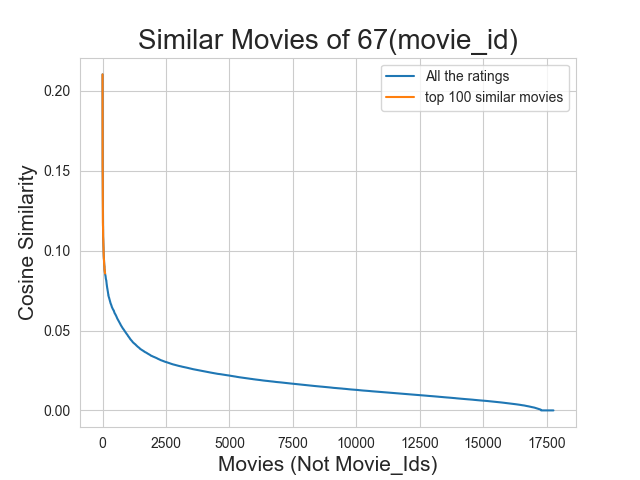

In [49]:
plt.plot(similarities[sim_indices], label='All the ratings')
plt.plot(similarities[sim_indices[:100]], label='top 100 similar movies')
plt.title("Similar Movies of {}(movie_id)".format(mv_id), fontsize=20)
plt.xlabel("Movies (Not Movie_Ids)", fontsize=15)
plt.ylabel("Cosine Similarity",fontsize=15)
plt.legend()
plt.show()

<h4> Observations </h4>

* Because we have a total of 17.5K Movies, from the graph above we find out the Top Similarity Value to the Movie 'Vampire Journals' : It is approx. 0.23.
* From this graph above we can say that the Top 100 Movies have a very high similarity value as compared to the rest of the movies (*Similarity to 'Vampire Journals'). *The Top Movie has a similarity value around 0.23 whereas the 100th most similar movie has a similarity value of 0.08 approx.* The rest of the movies have ratings that fall significantly.


__Top 10 similar movies__

In [50]:
movie_titles.loc[sim_indices[:10]]

,year_of_release,title
movie_id,,
323,1999.0,Modern Vampires
4044,1998.0,Subspecies 4: Bloodstorm
1688,1993.0,To Sleep With a Vampire
13962,2001.0,Dracula: The Dark Prince
12053,1993.0,Dracula Rising
16279,2002.0,Vampires: Los Muertos
4667,1996.0,Vampirella
1900,1997.0,Club Vampire
13873,2001.0,The Breed


 > Similarly, we can ___find similar users___ and compare how similar they are. 

<h4> Observations </h4>

* We found that for 'Vampire Journals' (Movie with ID=67) the most similar movies and their corresponding Movie IDs are as shown above. *As we can see from these titles, most of our movies are related to Vampires.*
* <b> *It is important to note ever here that we have not used our Movie Titles anywhere to obtain the Similarities. We just had a look at Movie-Movie Similarity : the users who watched both of these movies.* </b>
* Thus, by just looking at the value for (Mi)^T * (Mj) we are able to say that these movies are similar to each other.
* We could build a very simple Recommendation System by using Movie-Movie Similarity. We can say that because the user watched 'Vampire Journals', some of the recommendations for this user are 'Modern Vampires','Subspecies 4: Bloodstorm etc.'

 <h1> 4. Applying Machine Learning Models on Sample of 10K Users and 1K Movies </h1>
 
* We will now see proper Machine Learning where we will see both Regression as well as Recommendation System ideas.
* Before we go forward and have a look at the individual ML Models, we will take a look at the 'Surprise Library', which is one of the Best Libraries for Recommendation systems in Python. <b> *The Best part is that the Surprise Library is also very compatible with scikit-learn.* </b>
* Surprise Library makes your Data Handling very simple as long as you provide the data in (Movie,User,Rating) format. These are called Triplets. *If we have the file information with these triplet values available, the Surprise Library will take care of everything else.*
* <b> Most importantly, Surprise Library has very important algorithms like Baseline Algorithms, Neighbourhood Methods, and Matrix Factorization Methods (such as SVD, PMF,SVD++,NMF) etc. Similarly, it can also handle multiple similarity measures such as cosine similarity. </b>

===================================================================================================================

* In the Netflix Prize idea and analysis of the same in the context of Recommender Systems and Matrix Factorization, we saw a research paper by Yehuda Koren. Following is the reference link where he talks about how to build Collaborative Filtering Models with accurate and scalable ideas :
http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf 

* *The Best Part is that the Surprise Library implements all of these Major Algorithms. This Research Paper was the Baseline on which the entire surprise library was built.*

***SurPRISE : Simple Python Recommendation System Engine.***

<img src='images/models.jpg' width=500px>

* As shown in the diagram above, we start with the whole of Training Data, but instead of operating on the entire Training Data we take a sample of data, so that we have a smaller amount of data to operate on. *This smaller amount of data basically makes each of our computations much faster.*
* After we take this sample data, there are 2 paths that we can follow. The path on the right is where we can use the Surprise library, whereas the path on the left is the Standard Regression Path.

<h4> Feature Group 1 </h4> 

* When we pose our problem as a Regression Problem, we featurize the data. Our Task is that given a User Ui and a Movie Mj, predict Rij. <b> This basically means that Ui and Mj combination becomes our Xi, which we will use to generate features for our input. This feature could be that a given user Ui which other user is very similar to him/her, given a movie Mj which other movies are very similar to it, average rating given by a User Ui, average rating given to Movie Mj and so on. </b>
* Using this 'Feature Group 1', the models that we train will be : 'XGBoost Regressor' (to optimize for RMSE). We use a total of 13 Handcrafted features in this case. *We do not use our Surprise Library at all in this case and hence this becomes our Baseline Model.*

<h4> Feature Group 2 </h4> 

* The Surprise Library has multiple models : <b> There is a Baseline Model, KNN Model (with user-user similarity), KNN Model (with item-item similarity) etc. </b>
* We basically train a Surprise Baseline Model and whatever be the output of this model will be used as a feature. Eg :- Given Ui and Mj, suppose it predicts Rij*. This Rij* obtained is used as a feature to our Regression Models (can be thought of as stacking). This feature that we obtain becomes our 14th feature.

===================================================================================================================

* <b> Feature Set 1 : </b> 13 Handcrafted Features. {Model 1}
* <b> Feature Set 2 : </b> Output of Surprise Baseline Model used as a feature. Added to Feature Set 1. {Model 2}
* <b> Feature Set 3 : </b> Output of Surprise KNN Model (with user-user similarity) used as a feature. Added to Feature Set 2.
* <b> Feature Set 4 : </b> Output of Surprise KNN Model (with item-item similarity) used as a feature. Added to Feature Set 3. {Model 3}
* <b> Feature Set 5 : </b> We use SVD as a Matrix Factorization Technique. Again, we have Ui and Mj and we predict Rij'. This is used as a feature and is added to Feature Set 4.
* <b> Feature Set 6 : </b> We use SVD++ as a Matrix Factorization Technique. Again, we have Ui and Mj and we predict Rij^. This is used as a feature and is added to Feature Set 5.


In [51]:
def get_sample_sparse_matrix(sparse_matrix, no_users, no_movies, path, verbose = True):
    """
        It will get it from the ''path'' if it is present  or It will create 
        and store the sampled sparse matrix in the path specified.
    """

    # get (row, col) and (rating) tuple from sparse_matrix...
    row_ind, col_ind, ratings = sparse.find(sparse_matrix)
    users = np.unique(row_ind)
    movies = np.unique(col_ind)

    print("Original Matrix : (users, movies) -- ({} {})".format(len(users), len(movies)))
    print("Original Matrix : Ratings -- {}\n".format(len(ratings)))

    # It just to make sure to get same sample everytime we run this program..
    # and pick without replacement....
    np.random.seed(15)
    sample_users = np.random.choice(users, no_users, replace=False)
    sample_movies = np.random.choice(movies, no_movies, replace=False)
    # get the boolean mask or these sampled_items in originl row/col_inds..
    mask = np.logical_and( np.isin(row_ind, sample_users),
                      np.isin(col_ind, sample_movies) )
    
    sample_sparse_matrix = sparse.csr_matrix((ratings[mask], (row_ind[mask], col_ind[mask])),
                                             shape=(max(sample_users)+1, max(sample_movies)+1))

    if verbose:
        print("Sampled Matrix : (users, movies) -- ({} {})".format(len(sample_users), len(sample_movies)))
        print("Sampled Matrix : Ratings --", format(ratings[mask].shape[0]))

    print('Saving it into disk for further usage..')
    # save it into disk
    sparse.save_npz(path, sample_sparse_matrix)
    if verbose:
            print('Done..\n')
    
    return sample_sparse_matrix

<h2> 4.1 Sampling Data : 10K Users and 1K Movies</h2>

* We have split our total data into DTrain and DTest using Time. DTrain itself has approx. 405K users and a total of 17K Movies, whereas DTest itself has approx. 349K users and 17K movies. *But the problem over here is that our Dataset Dimensionalities are quite large. Therefore, instead of operating on the entire data we sample this data.*
* We sample this data such that from our 2 datasets, we take a subset of users and a subset of movies. <b> *From our Training Dataset we take 10K users and 1K movies, whereasfor the Test Dataset we take 5K users and 500 movies.* </b> *We call our Training Data obtained as DTrain' whereas we call our Test Dataset obtained as DTest'.*
* Now, we build each of our models on these datasets to see which of our models perform the best. <b> Whichever Model works the best, we can go back and Train on our entire data. It is possible that running on the entire dataset might even take days. (If we had a cluster or group of computers interconnected to each other in a network fashion, we may be able to operate on these large matrices). </b>
* We sample a random set of users and a random set of movies from both Training and Test Datasets. *Ideally, when we train on the total data and test on the total data, our performance will be significantly better than the case when we are just sampling.*
* We have loaded the available intermediate files for both Train and Test datasets from Google Drive link and will load the same.

<h3>4.1.1 Build Sample Train Data from the Train Data </h3>

In [52]:
start = datetime.now()
path = "sample/small/sample_train_sparse_matrix.npz"
if os.path.isfile(path):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    sample_train_sparse_matrix = sparse.load_npz(path)
    print("DONE..")
else: 
    # get 10k users and 1k movies from available data 
    sample_train_sparse_matrix = get_sample_sparse_matrix(train_sparse_matrix, no_users=10000, no_movies=1000,
                                             path = path)

print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:00.057784


<h3>4.1.2 Build sample test data from the test data</h3>

In [53]:
start = datetime.now()

path = "sample/small/sample_test_sparse_matrix.npz"
if os.path.isfile(path):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    sample_test_sparse_matrix = sparse.load_npz(path)
    print("DONE..")
else:
    # get 5k users and 500 movies from available data 
    sample_test_sparse_matrix = get_sample_sparse_matrix(test_sparse_matrix, no_users=5000, no_movies=500,
                                                 path = "sample/small/sample_test_sparse_matrix.npz")
print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:00.040910


<h2>4.2 Finding Global Average of all movie ratings, Average rating per User, and Average Rating per Movie (from Sampled Train)</h2>

* Now we will take a look at the 13 Handcrafted features that we will use for the XGBoost Regression. First we need to remember that we have DTrain' and DTest' that are sampled from DTrain and DTest respectively.
* So, we will recompute the Global Average, User Average as well as Movie Average for our DTrain' as well as our DTest'.  
* Global Average can be represented as μ. We also compute the Average Rating given by each user and the Average Rating given to each movie. These are 3 of the 13 features that we consider.

===================================================================================================================

*  __Global Avg__ :  Average rating of all the ratings 

* __User Avg__ : A Particular User's Average rating. This basically tells us whether our user is critical with his reviews or he/she is leniant with the same.

* __Movie Avg__ : Average rating of the movie. This basically tells us whether this movie was critically acclaimed or not.

-------------------------------------------------------------------------------------------------------------------
* __Similar user rating for a particular movie__:
    
* Remember that our Input is the User Ui, the Movie Mj and the Rating Rij, and given this information we transform our task into a Regression Problem.
* We use the Ui and Mj combination to obtain a vector of features. {This vector becomes our Xij) and Rij becomes our Yij. * Now our Dataset is a combination of {Xij,Yij}. Once we have the Data in this format, we can pose this as a Regression Problem, for which we will use XGBoost Regressor.
* Note that to construct this vector of features, all we can do is to obtain a vector of features. *Global Average has nothing to do with a user or a movie.* <b> We have to use only Ui and Mj to come up with these 13 features and we cannot use anything else. </b>

* Given that we have been provided with a User Ui and a corresponding Mj, assume that Users {U1,U2,U5,U7,U8,U10} are the most similar users to Ui, of which U1 watched Mj and gave it a rating of 3 (We only care about Mj here).
* Now suppose U2 has not watched Mj ie. there is no corresponding rating (Rating is Null), and U5 watched Mj who gave it a rating of 4. Similarly, suppose U7,U8 watched Mj and gave it a rating of 4 and 3 respectively. Suppose U10 did not watch Mj and U15 gave it a rating of 5.
* <b> *We basically take the 5 ratings of the 5 Most Similar Users who watched the Movie Mj and call the same as follows : </b>
    
       - sur1, sur2, sur3, sur4, sur5 ( Top 5 similar users who rated this particular movie )
       
-------------------------------------------------------------------------------------------------------------------

* __Similar movies rated by a particular user :

* Given that we have been provided with a User Ui and a corresponding Mj, assume that Movies {M1,M5,M6,M7,M8,M9,M12} are the most similar movies to Mj, of which we only care about the user Ui here.
* Suppose the user Ui did not watch M1 and hence has not rated the same. He watched M5 and gave a rating of 4, he did not watch M6, he watched M7,M8 and M9 and gave a rating of 3,2 and 1 respectively. He also watched M12 and gave it a 5 star rating.
* Now, given that Mj is very similar to M5, if Ui gave 4 stars to M5, there is a very high chance that Ui will give a similar high rating to Mj.
* <b> *We basically take the 5 ratings of the 5 Most Similar Movies to Mj and call the same as follows : </b>
    
        - smr1, smr2, smr3, smr4, smr5 ( Top 5 similar movies that are rated by this particular user )
    
-------------------------------------------------------------------------------------------------------------------       
- __Rating__ : Rating for the particular movie by this particular user. {This is the same as Yij}.


==================================================================================================================

***When we compute similar users on Test Data, we have to always compare with the similar users of Training Data. We cannot use the Test Data for Feature Engineering.***

* Assume that we have a User Ui in our Test Data who is a new user :- this basically becomes our Cold Start Problem since he/she is not present in our Training Data.
* In such a case, we give all of our sur ratings (similar user ratings) as zeros.
* Similarly if we have a particular movie which is new and is not present in our Training Data, we give the corresponding smr values as zeros.


In [54]:
sample_train_averages = dict()

<h3>4.2.1 Finding Global Average of all Movie Ratings</h3>

In [55]:
# get the global average of ratings in our train set.
global_average_train = sample_train_sparse_matrix.sum()/sample_train_sparse_matrix.count_nonzero()
sample_train_averages['global'] = global_average_train
sample_train_averages

{'global': 3.581679377504138}

<h3>4.2.2 Finding Average Rating per User</h3>

In [56]:
sample_train_averages['user'] = get_average_ratings(sample_train_sparse_matrix, of_users=True)
print('\nAverage rating of user 1179 :',sample_train_averages['user'][1179])


Average rating of user 1179 : 3.6666666666666665


<h3>4.2.3 Finding Average Rating per Movie</h3>

In [57]:
sample_train_averages['movie'] =  get_average_ratings(sample_train_sparse_matrix, of_users=False)
print('\n Average rating of movie 1098:',sample_train_averages['movie'][1098])


 Average rating of movie 1098: 3.99009900990099


<h2> 4.3 Featurizing Data </h2>

In [58]:
print('\n No of ratings in Our Sampled train matrix is : {}\n'.format(sample_train_sparse_matrix.count_nonzero()))
print('\n No of ratings in Our Sampled test matrix is : {}\n'.format(sample_test_sparse_matrix.count_nonzero()))


 No of ratings in Our Sampled train matrix is : 129286


 No of ratings in Our Sampled test matrix is : 7333



<h3> 4.3.1 Featurizing Data for Regression Problem </h3>

<h4> 4.3.1.1 Featurizing Train Data </h4>

In [59]:
# get users, movies and ratings from our samples train sparse matrix
sample_train_users, sample_train_movies, sample_train_ratings = sparse.find(sample_train_sparse_matrix)

In [60]:
############################################################
# It took me almost 10 hours to prepare this train dataset.#
############################################################
start = datetime.now()
if os.path.isfile('sample/small/reg_train.csv'):
    print("File already exists and you don't have to prepare the same once again..." )
else:
    print('preparing {} tuples for the dataset..\n'.format(len(sample_train_ratings)))
    with open('sample/small/reg_train.csv', mode='w') as reg_data_file:
        count = 0
        for (user, movie, rating)  in zip(sample_train_users, sample_train_movies, sample_train_ratings):
            st = datetime.now()
        #     print(user, movie)    
            #--------------------- Ratings of "movie" by similar users of "user" ---------------------
            # compute the similar Users of the "user"        
            user_sim = cosine_similarity(sample_train_sparse_matrix[user], sample_train_sparse_matrix).ravel()
            top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar users for this movie
            top_ratings = sample_train_sparse_matrix[top_sim_users, movie].toarray().ravel()
            # we will make it's length "5" by adding movie averages to .
            top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_users_ratings.extend([sample_train_averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
        #     print(top_sim_users_ratings, end=" ")    


            #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
            # compute the similar movies of the "movie"        
            movie_sim = cosine_similarity(sample_train_sparse_matrix[:,movie].T, sample_train_sparse_matrix.T).ravel()
            top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar movie rated by this user..
            top_ratings = sample_train_sparse_matrix[user, top_sim_movies].toarray().ravel()
            # we will make it's length "5" by adding user averages to.
            top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_movies_ratings.extend([sample_train_averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
        #     print(top_sim_movies_ratings, end=" : -- ")

            #-----------------prepare the row to be stores in a file-----------------#
            row = list()
            row.append(user)
            row.append(movie)
            # Now add the other features to this data...
            row.append(sample_train_averages['global']) # first feature
            # next 5 features are similar_users "movie" ratings
            row.extend(top_sim_users_ratings)
            # next 5 features are "user" ratings for similar_movies
            row.extend(top_sim_movies_ratings)
            # Avg_user rating
            row.append(sample_train_averages['user'][user])
            # Avg_movie rating
            row.append(sample_train_averages['movie'][movie])

            # finalley, The actual Rating of this user-movie pair...
            row.append(rating)
            count = count + 1

            # add rows to the file opened..
            reg_data_file.write(','.join(map(str, row)))
            reg_data_file.write('\n')        
            if (count)%10000 == 0:
                # print(','.join(map(str, row)))
                print("Done for {} rows----- {}".format(count, datetime.now() - start))


print(datetime.now() - start)

File already exists and you don't have to prepare the same once again...
0:00:00.002871


__Reading from the file to make a Train Dataframe__

In [61]:
reg_train = pd.read_csv('sample/small/reg_train.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5','smr1', 'smr2', 'smr3', 'smr4', 'smr5', 'UAvg', 'MAvg', 'rating'], header=None)
reg_train.head()

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,53406,33,3.581679,4.0,5.0,5.0,4.0,1.0,5.0,2.0,5.0,3.0,1.0,3.370370,4.092437,4
1,99540,33,3.581679,5.0,5.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,5.0,3.555556,4.092437,3
2,99865,33,3.581679,5.0,5.0,4.0,5.0,3.0,5.0,4.0,4.0,5.0,4.0,3.714286,4.092437,5
3,101620,33,3.581679,2.0,3.0,5.0,5.0,4.0,4.0,3.0,3.0,4.0,5.0,3.584416,4.092437,5
4,112974,33,3.581679,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,3.0,3.750000,4.092437,5


<h4> Note <h4/>
    
* Remember that over here, the first 2 columns are the User ID as well as the Movie ID, both of which are columns that we cannot use for modelling.

<h4> 4.3.1.2 Featurizing Test Data </h4>

In [62]:
# get users, movies and ratings from the Sampled Test 
sample_test_users, sample_test_movies, sample_test_ratings = sparse.find(sample_test_sparse_matrix)

In [63]:
start = datetime.now()

if os.path.isfile('sample/small/reg_test.csv'):
    print("It is already created...")
else:

    print('preparing {} tuples for the dataset..\n'.format(len(sample_test_ratings)))
    with open('sample/small/reg_test.csv', mode='w') as reg_data_file:
        count = 0 
        for (user, movie, rating)  in zip(sample_test_users, sample_test_movies, sample_test_ratings):
            st = datetime.now()

        #--------------------- Ratings of "movie" by similar users of "user" ---------------------
            #print(user, movie)
            try:
                # compute the similar Users of the "user"        
                user_sim = cosine_similarity(sample_train_sparse_matrix[user], sample_train_sparse_matrix).ravel()
                top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
                # get the ratings of most similar users for this movie
                top_ratings = sample_train_sparse_matrix[top_sim_users, movie].toarray().ravel()
                # we will make it's length "5" by adding movie averages to .
                top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
                top_sim_users_ratings.extend([sample_train_averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
                # print(top_sim_users_ratings, end="--")

            except (IndexError, KeyError):
                # It is a new User or new Movie or there are no ratings for given user for top similar movies...
                ########## Cold STart Problem ##########
                top_sim_users_ratings.extend([sample_train_averages['global']]*(5 - len(top_sim_users_ratings)))
                #print(top_sim_users_ratings)
            except:
                print(user, movie)
                # we just want KeyErrors to be resolved. Not every Exception...
                raise



            #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
            try:
                # compute the similar movies of the "movie"        
                movie_sim = cosine_similarity(sample_train_sparse_matrix[:,movie].T, sample_train_sparse_matrix.T).ravel()
                top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
                # get the ratings of most similar movie rated by this user..
                top_ratings = sample_train_sparse_matrix[user, top_sim_movies].toarray().ravel()
                # we will make it's length "5" by adding user averages to.
                top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
                top_sim_movies_ratings.extend([sample_train_averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
                #print(top_sim_movies_ratings)
            except (IndexError, KeyError):
                #print(top_sim_movies_ratings, end=" : -- ")
                top_sim_movies_ratings.extend([sample_train_averages['global']]*(5-len(top_sim_movies_ratings)))
                #print(top_sim_movies_ratings)
            except :
                raise

            #-----------------prepare the row to be stores in a file-----------------#
            row = list()
            # add usser and movie name first
            row.append(user)
            row.append(movie)
            row.append(sample_train_averages['global']) # first feature
            #print(row)
            # next 5 features are similar_users "movie" ratings
            row.extend(top_sim_users_ratings)
            #print(row)
            # next 5 features are "user" ratings for similar_movies
            row.extend(top_sim_movies_ratings)
            #print(row)
            # Avg_user rating
            try:
                row.append(sample_train_averages['user'][user])
            except KeyError:
                row.append(sample_train_averages['global'])
            except:
                raise
            #print(row)
            # Avg_movie rating
            try:
                row.append(sample_train_averages['movie'][movie])
            except KeyError:
                row.append(sample_train_averages['global'])
            except:
                raise
            #print(row)
            # finally, The actual Rating of this user-movie pair...
            row.append(rating)
            #print(row)
            count = count + 1

            # add rows to the file opened..
            reg_data_file.write(','.join(map(str, row)))
            #print(','.join(map(str, row)))
            reg_data_file.write('\n')        
            if (count)%1000 == 0:
                #print(','.join(map(str, row)))
                print("Done for {} rows----- {}".format(count, datetime.now() - start))
    print("",datetime.now() - start)  

It is already created...


__Reading from the File to make a Test Dataframe__

In [64]:
reg_test_df = pd.read_csv('sample/small/reg_test.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5',
                                                          'smr1', 'smr2', 'smr3', 'smr4', 'smr5',
                                                          'UAvg', 'MAvg', 'rating'], header=None)
reg_test_df.head(4)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4
2,1737912,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3
3,1849204,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4


<h3> 4.3.2 Transforming Data for Surprise Models</h3>

<h4> 4.3.2.1 Transforming Train Data </h4>

* Surprise models use a very different data format internally to make the algorithms very fast and quick to Train. We can't give raw data (movie, user, rating) to train the model in Surprise library.
* Surprise Models have a separate format for Train and Test data, which are useful for training the models like SVD, KNNBaseLineOnly etc, in Surprise.
* We can give a Pandas DataFrame or a file as an input to the Surprise Model. The Surprise 'Reader' as shown below can quickly read the data either from a Pandas DataFrame or a File and transform the same internally into a format that it prefers.

In [65]:
from surprise import Reader, Dataset

In [66]:
# It is to specify how to read the dataframe.
# for our dataframe, we don't have to specify anything extra..
reader = Reader(rating_scale=(1,5))

# create the train data from the dataframe...
train_data = Dataset.load_from_df(reg_train[['user', 'movie', 'rating']], reader)
#reg_train is the actual training data and convert it into 'train_data', which is the surprise variable in which
#all of the Training Data is stored.

# build the trainset from traindata.., It is of dataset format from surprise library..
trainset = train_data.build_full_trainset() 

<h4> 4.3.2.2 Transforming Test Data </h4>

- Testset is just a list of (user, movie, rating) tuples. (Order in the tuple is impotant) 

In [67]:
testset = list(zip(reg_test_df.user.values, reg_test_df.movie.values, reg_test_df.rating.values))
testset[:3]

[(808635, 71, 5), (941866, 71, 4), (1737912, 71, 3)]

<h2> 4.4 Applying Machine Learning Models </h2>

* Since we have the actual 13 Handcrafted features and the data in the format that we need for the Surprise Format, we can apply models on the same.
* Since we are training lots of models, we will store each of these model outputs, like the model that we are training, the metric we are evaluating (Metric can be RMSE or MAPE) and the corresponding value that we obtain. *Because we have a lot of these models, we might want to store all of this data in a Dictionary like setup.* Eg: If our Model is (13 Handcrafted Features + XGBoost), and the metric is RMSE, we store the corresponding value that we obtain.

-  Global dictionary stores rmse and mape for all the models....

    - It stores the metrics in a dictionary of dictionaries

    > __keys__ : model names(string)

    > __value__: dict(__key__ : metric, __value__ : value ) 

In [68]:
models_evaluation_train = dict()
models_evaluation_test = dict()

models_evaluation_train, models_evaluation_test

({}, {})

 > __Utility functions for running regression models__
 
* __get_error_metrics__ : Whenever we run a Regression Model we need the corresponding error metrics. The error metrics that we obtain are rmse and mape. If you provide the actual Yij values and the predicted Yij values, it computes the corresponding RMSE and MAPE values and return the same.
* __run_xgboost__ : Written so that we can simply Train the XGBoost model and print a few things : Print the Time Taken to Train the model, evaluate the model so that we are able to compute the RMSE and MAPE, as well as obtain the Feature Importance.

In [69]:
# to get rmse and mape given actual and predicted ratings..
def get_error_metrics(y_true, y_pred):
    rmse = np.sqrt(np.mean([ (y_true[i] - y_pred[i])**2 for i in range(len(y_pred)) ]))
    mape = np.mean(np.abs( (y_true - y_pred)/y_true )) * 100
    return rmse, mape

def run_xgboost(algo,  x_train, y_train, x_test, y_test, verbose=True):
    """
    It will return train_results and test_results
    """
    
    # dictionaries for storing train and test results
    train_results = dict()
    test_results = dict()
    
    
    # fit the model
    print('Training the model..')
    start =datetime.now()
    algo.fit(x_train, y_train, eval_metric = 'rmse')
    print('Done. Time taken : {}\n'.format(datetime.now()-start))
    print('Done \n')

    # from the trained model, get the predictions....
    print('Evaluating the model with TRAIN data...')
    start =datetime.now()
    y_train_pred = algo.predict(x_train)
    # get the rmse and mape of train data...
    rmse_train, mape_train = get_error_metrics(y_train.values, y_train_pred)
    
    # store the results in train_results dictionary..
    train_results = {'rmse': rmse_train,
                    'mape' : mape_train,
                    'predictions' : y_train_pred}
    
    #######################################
    # get the test data predictions and compute rmse and mape
    print('Evaluating Test data')
    y_test_pred = algo.predict(x_test) 
    rmse_test, mape_test = get_error_metrics(y_true=y_test.values, y_pred=y_test_pred)
    # store them in our test results dictionary.
    test_results = {'rmse': rmse_test,
                    'mape' : mape_test,
                    'predictions':y_test_pred}
    if verbose:
        print('\nTEST DATA')
        print('-'*30)
        print('RMSE : ', rmse_test)
        print('MAPE : ', mape_test)
        
    # return these train and test results...
    return train_results, test_results
    

> __Utility functions for Surprise modes__

* Similarly we also write similar functions for the Surprise Model in our Hand that returns us different important things.

In [70]:
# it is just to makesure that all of our algorithms should produce same results
# everytime they run...

my_seed = 15
random.seed(my_seed)
np.random.seed(my_seed)

##########################################################
# get  (actual_list , predicted_list) ratings given list 
# of predictions (prediction is a class in Surprise).    
##########################################################

def get_ratings(predictions):
    actual = np.array([pred.r_ui for pred in predictions])
    pred = np.array([pred.est for pred in predictions])
    
    return actual, pred

################################################################
# get ''rmse'' and ''mape'' , given list of prediction objects 
################################################################
def get_errors(predictions, print_them=False):

    actual, pred = get_ratings(predictions)
    rmse = np.sqrt(np.mean((pred - actual)**2))
    mape = np.mean(np.abs(pred - actual)/actual)

    return rmse, mape*100

##################################################################################
# It will return predicted ratings, rmse and mape of both train and test data   #
##################################################################################
def run_surprise(algo, trainset, testset, verbose=True): 
    '''
        return train_dict, test_dict
    
        It returns two dictionaries, one for train and the other is for test
        Each of them have 3 key-value pairs, which specify ''rmse'', ''mape'', and ''predicted ratings''.
    '''
    start = datetime.now()
    # dictionaries that stores metrics for train and test..
    train = dict()
    test = dict()
    
    # train the algorithm with the trainset
    st = datetime.now()
    print('Training the model...')
    algo.fit(trainset)
    print('Done. time taken : {} \n'.format(datetime.now()-st))
    
    # ---------------- Evaluating train data--------------------#
    st = datetime.now()
    print('Evaluating the model with train data..')
    # get the train predictions (list of prediction class inside Surprise)
    train_preds = algo.test(trainset.build_testset())
    # get predicted ratings from the train predictions..
    train_actual_ratings, train_pred_ratings = get_ratings(train_preds)
    # get ''rmse'' and ''mape'' from the train predictions.
    train_rmse, train_mape = get_errors(train_preds)
    print('time taken : {}'.format(datetime.now()-st))
    
    if verbose:
        print('-'*15)
        print('Train Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(train_rmse, train_mape))
    
    #store them in the train dictionary
    if verbose:
        print('adding train results in the dictionary..')
    train['rmse'] = train_rmse
    train['mape'] = train_mape
    train['predictions'] = train_pred_ratings
    
    #------------ Evaluating Test data---------------#
    st = datetime.now()
    print('\nEvaluating for test data...')
    # get the predictions( list of prediction classes) of test data
    test_preds = algo.test(testset)
    # get the predicted ratings from the list of predictions
    test_actual_ratings, test_pred_ratings = get_ratings(test_preds)
    # get error metrics from the predicted and actual ratings
    test_rmse, test_mape = get_errors(test_preds)
    print('time taken : {}'.format(datetime.now()-st))
    
    if verbose:
        print('-'*15)
        print('Test Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(test_rmse, test_mape))
    # store them in test dictionary
    if verbose:
        print('storing the test results in test dictionary...')
    test['rmse'] = test_rmse
    test['mape'] = test_mape
    test['predictions'] = test_pred_ratings
    
    print('\n'+'-'*45)
    print('Total time taken to run this algorithm :', datetime.now() - start)
    
    # return two dictionaries train and test
    return train, test

<h3> 4.4.1 XGBoost with Initial 13 Features </h3>

In [71]:
import xgboost as xgb

<h4> 4.4.1.1 Working with Default Values of Hyperparameters </h4>

Training the model..
Done. Time taken : 0:00:06.703005

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.076373581778953
MAPE :  34.48223172520999


<IPython.core.display.Javascript object>


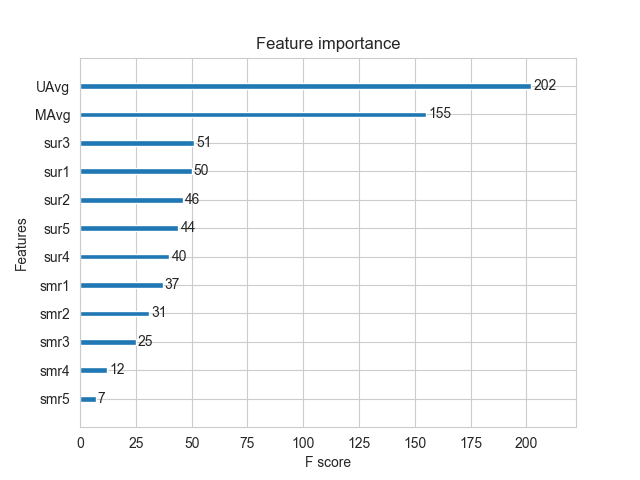

In [72]:
import warnings
warnings.filterwarnings("ignore")

# prepare Train data
x_train = reg_train.drop(['user','movie','rating'], axis=1)
y_train = reg_train['rating']

# Prepare Test data
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

# initialize Our first XGBoost model...
first_xgb = xgb.XGBRegressor(objective ='reg:squarederror', 
                              silent=False, n_jobs=13, random_state=15, n_estimators=100)
train_results, test_results = run_xgboost(first_xgb, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['first_algo'] = train_results
models_evaluation_test['first_algo'] = test_results

xgb.plot_importance(first_xgb)
plt.show()

<h4> Note </h4>

* The Reason that we have focused on MAPE is that MAPE tells us the Percentage Error. Looking at the RMSE, we can understand whether the value that we obtained is large or small, because all of our ratings lie between 1 and 5.
* <b> We need to remember that over here we are using a very small sample dataset of 10K users and 1K movies, whereas the original dataset consists of 405K users and 17K movies. </b> *When we train the model on the entire dataset of 405K users and 17K movies, our Training will take that much longer time but our results will be that much better.*

<h4> Observations </h4>

* While looking at the Feature Importance plot, we can observe that the most important feature to predict the Rating Rij given by a User Ui on Movie Mj is the UAvg (User Average). *It's the relative difference in feature importances between the various features that matters as far as these values are concerned. The absolute values do not matter as much.*
* The second most important feature is the Movie Average. If the Movie is critically acclaimed or a Big Hit among other users, there is a very big chance that the particular user would also rate it high.
* The Next 3 Important Fearures are the similar user ratings : similar user ratings 1,2, and 3, followed by similar movies and so on.

***Whenever a Build a Model like this, it is very important to understand which feature matters more.***

<h4> 4.4.1.2 Hyperparameter Tuning </h4>

In [79]:
from datetime import datetime
import time 
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

start = datetime.now()

#A parameter grid for XGBoost
params = {
        'eta' : [0.05,0.1,0.3],
        'min_child_weight': [5,6,7,8,9,10],
        'gamma': [0,0.10,0.20,0.50, 0.75,0.8,0.9],
        'subsample': [0.5,0.6, 0.7, 0.8,0.9],
        'colsample_bytree': [0.5, 0.6, 0.7,0.8,0.9],
        'max_depth': [3, 4, 5, 6, 7, 8,9,10],
        'n_estimators' : [100,150,200,250,300,500,1000]
        }


xgb1 = xgb.XGBRegressor(objective='reg:squarederror',silent=False, verbose=10, n_jobs=-1)
random_search = RandomizedSearchCV(xgb1, param_distributions=params, n_iter=30, 
                                   scoring='neg_mean_squared_error',n_jobs=-1, cv=3, verbose=10, 
                                   random_state=0)
random_search.fit(x_train, y_train)

print('\n Best hyperparameters:')
print(random_search.best_params_)

#Best cross validation RMSE obtained from hyperparameter tuning
print("Best RMSE obtained on Cross Validation data using hyperparameter tuning: ",random_search.best_score_)

print("Time taken to run this cell :", datetime.now() - start)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 27.6min finished



 Best hyperparameters:
{'subsample': 0.8, 'n_estimators': 250, 'min_child_weight': 10, 'max_depth': 5, 'gamma': 0.2, 'eta': 0.1, 'colsample_bytree': 0.7}
Best RMSE obtained on Cross Validation data using hyperparameter tuning:  -0.7163579316650656
Time taken to run this cell : 0:27:54.983688


<h4> 4.4.1.3 Obtaining Results on the Best Values of Hyperparameters Obtained </h4>

Training the model..
Done. Time taken : 0:00:21.118631

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0969415081270293
MAPE :  33.5205653190201


<IPython.core.display.Javascript object>


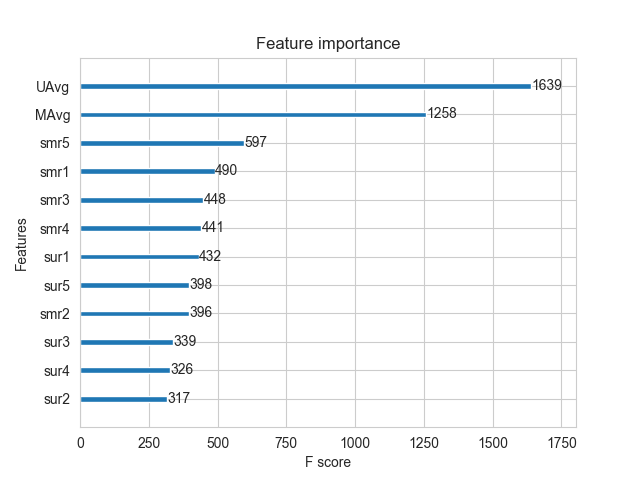

In [73]:
# initialize Our first XGBoost model...
first_xgb = xgb.XGBRegressor(objective='reg:squarederror',subsample=0.8, min_child_weight=10, max_depth=5, 
                             gamma=0.2, eta = 0.1, colsample_bytree = 0.7, silent=False, n_jobs=13, random_state=15, 
                             n_estimators=250)
train_results, test_results = run_xgboost(first_xgb, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['first_algo'] = train_results
models_evaluation_test['first_algo'] = test_results

xgb.plot_importance(first_xgb)
plt.show()

<h3> 4.4.2 Suprise Baseline Model </h3>

In [74]:
from surprise import BaselineOnly 

<h3> Predicted Rating : ( Baseline Prediction ) </h3>

* Given below is the link to the actual Research paper written by Yehuda Koren :
  http://surprise.readthedocs.io/en/stable/basic_algorithms.html#surprise.prediction_algorithms.baseline_only.BaselineOnly
  
* We have been provided with a User Ui and a Movie Mj and the corresponding Rating Rij. But according to Yehuda Koren's research paper in the link above and in the formula below, the subscript of 'u' refers to an item and the subscript of 'i' refers to an item (movie in our case).


 >$   \large {\hat{r}_{ui} = b_{ui} =\mu + b_u + b_i} $


- $\pmb \mu $ : Average of all trainings in training data.
- $\pmb b_u$ : User bias
- $\pmb b_i$ : Item bias (movie biases) 


* <b> This is not a Matrix Factorization Model, but a simple Linear Model that we are trying to build over here. </b>
* In the actual data, we have the information about User u, Item i and the Rating given by User u on item i ie. Rij. The formula above basically talks about the Predicted Rating given by user u on item i where b(ui) refers to the Baseline Model.
* It says that given a User u, an Item i and a Rating Rij, this b(ui) is the summation of global average (average of all the ratings in our Training Data), the user bias and the item bias (movie bias). *Remember that the 2 biases that we have over here are not interacting with each other.*
* There is one user bias for every user and one item bias for every item in our dataset.

***b(u) and b(i) are somewhat like the user average and the item average respectively but not exactly the same.***

===================================================================================================================

* μ over here is a constant whereas b(u) and b(i) are what we basically need to compute. The core of the Model says : <b> *I can Predict the Rating given by User u on Item i as the sum of the global average, the user bias and the item bias.* (Simple Linear Model) </b>
* In the 13 features that we had, the equivalent of b(u) is the user mean whereas b(i) is like the Movie Average or Movie Mean.
* b(u) and b(i) are the values that we try to obtain by solving a simple optimization problem, such as the Least Squares Problem.

__Optimization function ( Least Squares Problem )__

* The optimization problem is as shown below where we want to minimise the squared loss. The second paranthesis over here is like r(ui)^ -> predicted. This is like the Squared Loss.
    - http://surprise.readthedocs.io/en/stable/prediction_algorithms.html#baselines-estimates-configuration 
    

* When we are trying to minimize the values, we are trying to minimise on b(u) and b(i). We do not have μ as a variable that we want to minimize on. Note that, at the end we add an L2 Regularizer.

> $ \large \sum_{r_{ui} \in R_{train}} \left(r_{ui} - (\mu + b_u + b_i)\right)^2 +
\lambda \left(b_u^2 + b_i^2 \right).\text {        [mimimize } {b_u, b_i]}$ 

* We will be able to solve this problem with the help of SGD. 

***This is a very simple model and there is no complexity. This is called a Linear Model because we are not carrying out any Multiplication such as the Product of user bias and item bias. Also, b(u) and b(i) over here are not even vectors. They are Scalars.***

In [75]:
# options are to specify.., how to compute those user and item biases
bsl_options = {'method': 'sgd',
               'learning_rate': .001
               }
bsl_algo = BaselineOnly(bsl_options=bsl_options)
# run this algorithm.., It will return the train and test results..
bsl_train_results, bsl_test_results = run_surprise(bsl_algo, trainset, testset, verbose=True)


# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['bsl_algo'] = bsl_train_results 
models_evaluation_test['bsl_algo'] = bsl_test_results

Training the model...
Estimating biases using sgd...
Done. time taken : 0:00:00.922874 

Evaluating the model with train data..
time taken : 0:00:01.156200
---------------
Train Data
---------------
RMSE : 0.9347153928678286

MAPE : 29.389572652358183

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.081239
---------------
Test Data
---------------
RMSE : 1.0730330260516174

MAPE : 35.04995544572911

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:02.161215


<h4> Observations </h4>

* Because we have very few datapoints over here in our Sample, our Model trains very very quickly.
* We do not cary very much about the Train RMSE, except while checking the difference between Train RMSE and Test RMSE, because we know that when this difference is quite large we run into the risk of overfitting. However, here, since the difference in these values is not massive, we are not overfitting.
* The Test RMSE value over here has a value of 1.073 which is slightly better than the Test RMSE for the XGBoost Model with 13 Features.

<h3> 4.4.3 XGBoost with Initial 13 Features + Surprise Baseline predictor </h3>

* Initially we have the 13 Handcrafted Features as well as Yi ie. the Rij that we have to predict. {Note that we computed our 13 features by using the information about User Ui and Movie Mj}.
* Now to the Xi formed by these 13 features, we add a 14th feature, which is the Predicted Feature by the Baseline Model. *This is called bslpr :- output of our Baseline Model.*
* What we now do is that we apply the XGBoost Model on top of this.

------------------------------------------------------------------------------------------------------------------

* This is the approach that we keep on carrying out : In the next case we will add KNN Model from the Surprise Library and add the predicted output from this as another feature, on top of which we again apply the XGBoost Model.

__Updating Train Data__

In [76]:
# add our baseline_predicted value as our feature..
reg_train['bslpr'] = models_evaluation_train['bsl_algo']['predictions']
reg_train.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,53406,33,3.581679,4.0,5.0,5.0,4.0,1.0,5.0,2.0,5.0,3.0,1.0,3.370370,4.092437,4,3.898982
1,99540,33,3.581679,5.0,5.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,5.0,3.555556,4.092437,3,3.371403


__Updating Test Data__

In [77]:
# add that baseline predicted ratings with Surprise to the test data as well
reg_test_df['bslpr']  = models_evaluation_test['bsl_algo']['predictions']

reg_test_df.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5,3.581679
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4,3.581679


<h4> 4.4.3.1 Working with Default Values of Hyperparameters </h4>

Training the model..
Done. Time taken : 0:00:07.945288

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0765603714651855
MAPE :  34.4648051883444


<IPython.core.display.Javascript object>


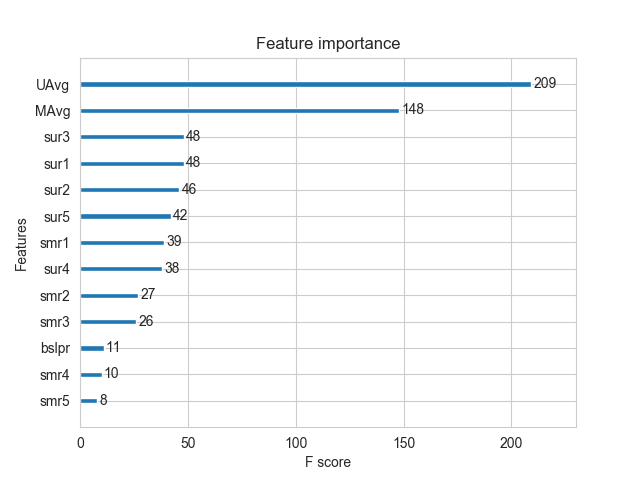

In [78]:
# prepare train data
x_train = reg_train.drop(['user', 'movie','rating'], axis=1)
y_train = reg_train['rating']

# Prepare Test data
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

# initialize Our first XGBoost model...
xgb_bsl = xgb.XGBRegressor(objective='reg:squarederror',silent=False, n_jobs=13, random_state=15, 
                           n_estimators=100)
train_results, test_results = run_xgboost(xgb_bsl, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_bsl'] = train_results
models_evaluation_test['xgb_bsl'] = test_results

xgb.plot_importance(xgb_bsl)
plt.show()

<h4> Observations </h4>

* Note that the RMSE that we obtain over here is 1.076, which has not changed significantly. 
* However, instead, what has changed in this case is the Feature Importance : While the User Average (UAvg) and Movie Average (MAvg) are still our most important features, our 'bslpr' is not a very important feature given this information being already present.

***F Score over here basically refers to the Feature Score.***

<h4> 4.4.3.2 Hyperparameter Tuning </h4>

In [88]:
start = datetime.now()

#A parameter grid for XGBoost
params = {
        'eta' : [0.05,0.1,0.3],
        'min_child_weight': [5,6,7,8,9,10],
        'gamma': [0,0.10,0.20,0.50, 0.75,0.8,0.9],
        'subsample': [0.5,0.6, 0.7, 0.8,0.9],
        'colsample_bytree': [0.5, 0.6, 0.7,0.8,0.9],
        'max_depth': [3, 4, 5, 6, 7, 8,9,10],
        'n_estimators' : [100,150,200,250,300,500,1000]
        }

xgb2 = xgb.XGBRegressor(objective='reg:squarederror',silent=False, verbose=10, n_jobs=-1)
random_search = RandomizedSearchCV(xgb2, param_distributions=params, n_iter=30, 
                                   scoring='neg_mean_squared_error',n_jobs=-1, cv=3, verbose=10, 
                                   random_state=0)
random_search.fit(x_train, y_train)

print('\n Best hyperparameters:')
print(random_search.best_params_)

#Best cross validation RMSE obtained from hyperparameter tuning
print("Best RMSE obtained on Cross Validation data using hyperparameter tuning: ",random_search.best_score_)

print("Time taken to run this cell :", datetime.now() - start)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 40.0min finished



 Best hyperparameters:
{'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 8, 'max_depth': 8, 'gamma': 0.75, 'eta': 0.05, 'colsample_bytree': 0.5}
Best RMSE obtained on Cross Validation data using hyperparameter tuning:  -0.7191981194206494
Time taken to run this cell : 0:40:15.032409


<h4> 4.4.3.3 Obtaining Results on the Best Values of Hyperparameters Obtained </h4>

Training the model..
Done. Time taken : 0:00:12.661591

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.1287786334381198
MAPE :  32.66926188247627


<IPython.core.display.Javascript object>


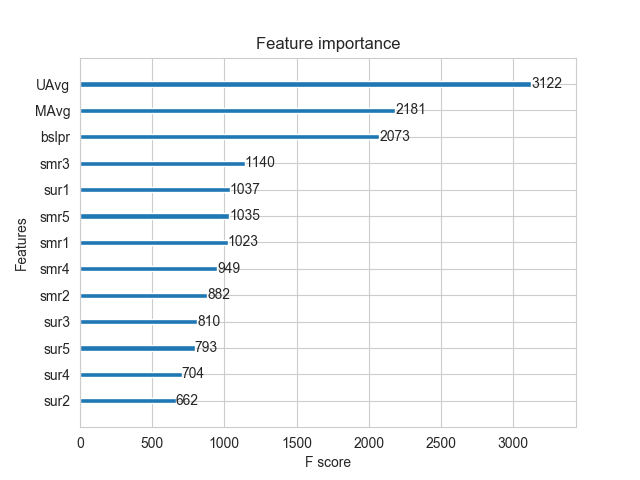

In [79]:
# initialize Our first XGBoost model...
xgb_bsl = xgb.XGBRegressor(objective='reg:squarederror',subsample=0.7, min_child_weight=8, max_depth=8, 
                           gamma=0.75, eta = 0.05, colsample_bytree = 0.5, silent=False, n_jobs=13, 
                           random_state=15, n_estimators=100)
train_results, test_results = run_xgboost(xgb_bsl, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_bsl'] = train_results
models_evaluation_test['xgb_bsl'] = test_results

xgb.plot_importance(xgb_bsl)
plt.show()

<h3> 4.4.4 Surprise KNNBaseline Predictor </h3>

* The Surprise Baseline Model is introducing a feature that is very similar to User Average and Movie Average. <b> *They are not exactly the same because in the Baseline Model over here we are solving an Optimization Problem.* </b>
* Note that in the 13 features that we generated, we also have the similar user ratings and the similar movie ratings, the equivalent of which is the KNNBaseline Predictor in the Surprise Library.

In [80]:
from surprise import KNNBaseline

- KNN BASELINE
    - http://surprise.readthedocs.io/en/stable/knn_inspired.html#surprise.prediction_algorithms.knns.KNNBaseline 

- PEARSON BASELINE SIMILARITY
    - http://surprise.readthedocs.io/en/stable/similarities.html#surprise.similarities.pearson_baseline 

- SHRINKAGE
    - _2.2 Neighborhood Models_ in http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf 

- __Predicted Rating__ : ( __Based on User-User similarity__ )

\begin{align} \hat{r}_{ui} = b_{ui} + \frac{ \sum\limits_{v \in N^k_i(u)}
\text{sim}(u, v) \cdot (r_{vi} - b_{vi})} {\sum\limits_{v \in
N^k_i(u)} \text{sim}(u, v)} \end{align}

- $\pmb{b_{ui}}$ -  _Baseline prediction_ of (user,movie) rating

- $ \pmb {N_i^k (u)}$ - Set of __K similar__ users (neighbours) of __user (u)__ who rated __movie(i)__ This is exactly similar to the "Similar user" Features that we constructed in the Handcrafted Feature List : There also we found 5 most similar users who rated the particular movie.

- _sim (u, v)_ - __Similarity__ between users __u and v__ 

***The Surprise Library already has what we have Handcrafted as our Features.***

-----------------------------------------------------------------------------------------------------------------

* For a User u and an Item i we will have a model to predict the rating given by User u on the Item i, and we will solve an optimization problem regarding the same.
* In the Surprise Baseline Model, we had the Rui^ as ( μ + b(u) + b(i) ), which is called bui ie. the Baseline Predicted Rating of User u on Item i. 
* As shown above the Rui^ in this case is the sum of bui  {which is the same formula as defined above}. Ni^k in the formula above has been defined below : The 'v' in the above formula refers to a user who is similar to User u and who also rated the Movie i.
* <b> *The similarity values that we are computing in the formula defined above can be computed in 2 ways : Cosine Similarity as well as with the help of Pearson Correlation Coefficient, because both u and v in the above formula are vectors of ratings.* </b>
* After this, r(vi) is the rating given by User v on Item i, because we are only considering those users who have rated the Movie i, and b(v,i) is the output of the Surprise Baseline Model : What the Baseline Model predicted that the user v will rate on the item i. *We are subtracting these values because the subtraction result tells us how different is the actual rating from the predicted rating.*

=================================================================================================================

* In the Research Paper, we can see reasons on why Pearson Correlation Coefficient is better than Cosine Similarity for our task at hand.
* Also, the researchers use a modified form of Pearson Correlation Coefficient, which is called "Shrunk Pearson Correlation Coefficient". *Shrunk comes from the word 'Shrinkage', which is an idea like Laplace Smoothing.*       

- __Predicted Rating : ( Based on Item Item similarity )__
 \begin{align} \hat{r}_{ui} = b_{ui} + \frac{ \sum\limits_{j \in N^k_u(i)}\text{sim}(i, j) \cdot (r_{uj} - b_{uj})} {\sum\limits_{j \in N^k_u(j)} \text{sim}(i, j)} \end{align}

    - Notations follows same as above (user user based predicted rating )

  <h4> 4.4.4.1 Surprise KNNBaseline with User-User Similarities</h4>

In [81]:
# we specify , how to compute similarities and what to consider with sim_options to our algorithm
sim_options = {'user_based' : True,
               'name': 'pearson_baseline',
               'shrinkage': 100,
               'min_support': 2
              } 
#We are saying that we at least need 2 Nearest Neighbours and a Shrinkage value of 100 for Smoothing.
# We keep the other parameters like regularization parameter and learning_rate as default values.
bsl_options = {'method': 'sgd'} 

knn_bsl_u = KNNBaseline(k=40, sim_options = sim_options, bsl_options = bsl_options)
knn_bsl_u_train_results, knn_bsl_u_test_results = run_surprise(knn_bsl_u, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['knn_bsl_u'] = knn_bsl_u_train_results 
models_evaluation_test['knn_bsl_u'] = knn_bsl_u_test_results

Training the model...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done. time taken : 0:00:36.458795 

Evaluating the model with train data..
time taken : 0:02:04.777927
---------------
Train Data
---------------
RMSE : 0.33642097416508826

MAPE : 9.145093375416348

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.088106
---------------
Test Data
---------------
RMSE : 1.0726493739667242

MAPE : 35.02094499698424

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:02:41.327417


<h4> Observations </h4>

* The Training Error over here is very very small(0.336) whereas the Test Error is 1.0726 {which is the best value till now that we have obtained across all of our models}. *This means that we could be Overfitting on the Training Data.*
* To avoid this overfitting, we can carry out Hyperparameter Tuning in this case. Eg : Shrinkage, the value of K, min_support etc. are some values of Hyperparameters that we can tune. However, we are not tuning them over here for simplicity.

<h4> 4.4.4.2 Surprise KNNBaseline with Movie-Movie Similarities</h4>

In [82]:
# we specify , how to compute similarities and what to consider with sim_options to our algorithm

# 'user_based' : False => this considers the similarities of movies instead of users

sim_options = {'user_based' : False,
               'name': 'pearson_baseline',
               'shrinkage': 100,
               'min_support': 2
              } 
# we keep other parameters like regularization parameter and learning_rate as default values.
bsl_options = {'method': 'sgd'}


knn_bsl_m = KNNBaseline(k=40, sim_options = sim_options, bsl_options = bsl_options)

knn_bsl_m_train_results, knn_bsl_m_test_results = run_surprise(knn_bsl_m, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['knn_bsl_m'] = knn_bsl_m_train_results 
models_evaluation_test['knn_bsl_m'] = knn_bsl_m_test_results


Training the model...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done. time taken : 0:00:01.214833 

Evaluating the model with train data..
time taken : 0:00:10.461528
---------------
Train Data
---------------
RMSE : 0.32584796251610554

MAPE : 8.447062581998374

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.085924
---------------
Test Data
---------------
RMSE : 1.072758832653683

MAPE : 35.02269653015042

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:11.762886


<h3> 4.4.5 XGBoost with Initial 13 Features + Surprise Baseline Predictor + KNNBaseline Predictor </h3>

* First we will run XGBoost with predictions from both KNN's ( that uses User-User and Item-Item similarities along with our previous features.
* Then we will run XGBoost with just predictions from both our KNN models and predictions from our baseline model. 

__Preparing Train Data__

In [83]:
# add the predicted values from both knns to this dataframe
reg_train['knn_bsl_u'] = models_evaluation_train['knn_bsl_u']['predictions']
reg_train['knn_bsl_m'] = models_evaluation_train['knn_bsl_m']['predictions']

reg_train.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m
0,53406,33,3.581679,4.0,5.0,5.0,4.0,1.0,5.0,2.0,5.0,3.0,1.0,3.370370,4.092437,4,3.898982,3.93002,3.867958
1,99540,33,3.581679,5.0,5.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,5.0,3.555556,4.092437,3,3.371403,3.17733,3.076302


__Preparing Test Data__

In [84]:
reg_test_df['knn_bsl_u'] = models_evaluation_test['knn_bsl_u']['predictions']
reg_test_df['knn_bsl_m'] = models_evaluation_test['knn_bsl_m']['predictions']

reg_test_df.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5,3.581679,3.581679,3.581679
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4,3.581679,3.581679,3.581679


<h4> 4.4.5.1 Working with Default Values of Hyperparameters </h4>

Training the model..
Done. Time taken : 0:00:10.160904

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0767793575625662
MAPE :  34.44745951378593


<IPython.core.display.Javascript object>


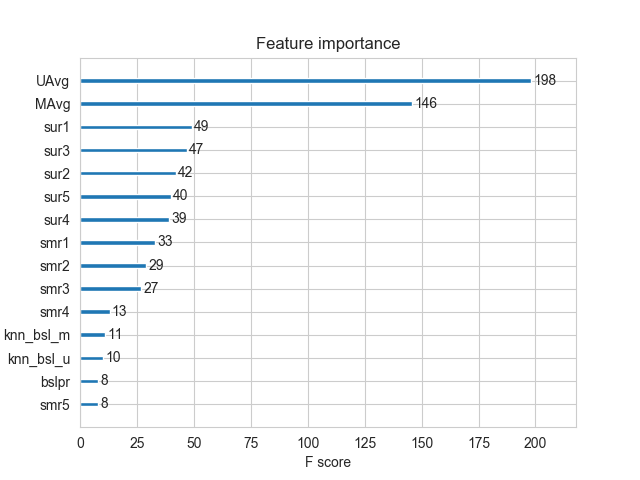

In [85]:
# prepare the train data....
x_train = reg_train.drop(['user', 'movie', 'rating'], axis=1)
y_train = reg_train['rating']

# prepare the train data....
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

# declare the model
xgb_knn_bsl = xgb.XGBRegressor(objective='reg:squarederror',n_jobs=10, random_state=15)
train_results, test_results = run_xgboost(xgb_knn_bsl, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_knn_bsl'] = train_results
models_evaluation_test['xgb_knn_bsl'] = test_results

xgb.plot_importance(xgb_knn_bsl)
plt.show()

<h4> Observations </h4>

The Feature Importance for KNN Baseline Model (with Movies and with users) is slightly better than our simple Baseline Predictor. <b> *Given that all other of our features exist, these features may not necessarily be the most useful features.* </b> *This is because UAvg as well as MAvg are features that are already accounting for our Baseline Models. Also, the other features are accounting for KNN type of features.*

***This is the Reason why our Surprise Models are not adding too much value to our system.***

<h4> 4.4.5.2 Hyperparameter Tuning </h4>

In [97]:
start = datetime.now()

#A parameter grid for XGBoost
params = {
        'eta' : [0.05,0.1,0.3],
        'min_child_weight': [5,6,7,8,9,10],
        'gamma': [0,0.10,0.20,0.50, 0.75,0.8,0.9],
        'subsample': [0.5,0.6, 0.7, 0.8,0.9],
        'colsample_bytree': [0.5, 0.6, 0.7,0.8,0.9],
        'max_depth': [3, 4, 5, 6, 7, 8,9,10],
        'n_estimators' : [100,150,200,250,300,500,1000]
        }

xgb3 = xgb.XGBRegressor(objective='reg:squarederror',silent=False, verbose=10, n_jobs=-1)
random_search = RandomizedSearchCV(xgb3, param_distributions=params, n_iter=30, 
                                   scoring='neg_mean_squared_error',n_jobs=-1, cv=3, verbose=10, 
                                   random_state=0)
random_search.fit(x_train, y_train)

print('\n Best hyperparameters:')
print(random_search.best_params_)

#Best cross validation RMSE obtained from hyperparameter tuning
print("Best RMSE obtained on Cross Validation data using hyperparameter tuning: ",random_search.best_score_)

print("Time taken to run this cell :", datetime.now() - start)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 38.4min finished



 Best hyperparameters:
{'subsample': 0.9, 'n_estimators': 150, 'min_child_weight': 7, 'max_depth': 5, 'gamma': 0.8, 'eta': 0.3, 'colsample_bytree': 0.6}
Best RMSE obtained on Cross Validation data using hyperparameter tuning:  -0.7213052131242862
Time taken to run this cell : 0:38:42.851514


<h4> 4.4.5.3 Obtaining Results on the Best Values of Hyperparameters Obtained </h4>

Training the model..
Done. Time taken : 0:00:19.156940

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0755700033759097
MAPE :  34.573904803419246


<IPython.core.display.Javascript object>


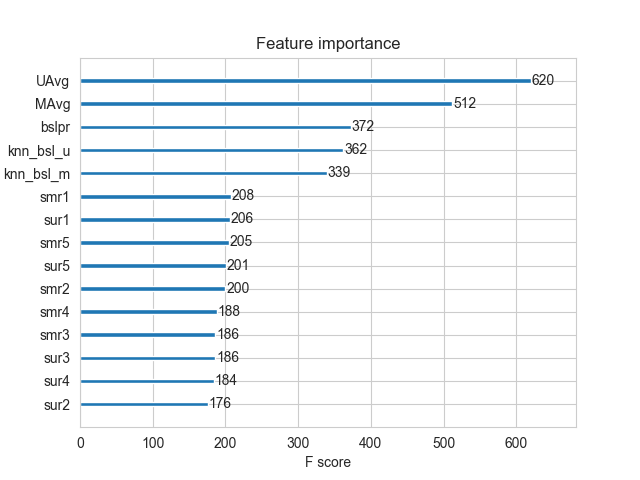

In [86]:
# declare the model
xgb_knn_bsl = xgb.XGBRegressor(objective='reg:squarederror',subsample = 0.9, min_child_weight=7,
                               max_depth=5, gamma=0.8, eta=0.3, colsample_bytree=0.6, n_estimators=150,
                               n_jobs=10, random_state=15)
train_results, test_results = run_xgboost(xgb_knn_bsl, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_knn_bsl'] = train_results
models_evaluation_test['xgb_knn_bsl'] = test_results

xgb.plot_importance(xgb_knn_bsl)
plt.show()

<h3> 4.4.6 Matrix Factorization Techniques </h3>

<h4> 4.4.6.1 SVD Matrix Factorization User Movie interactions </h4>

In [87]:
from surprise import SVD

http://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD 

- __Predicted Rating :__

    - $ \large  \hat r_{ui} = \mu + b_u + b_i + q_i^Tp_u $
    
        - $\pmb q_i$ - Representation of item(movie) in latent factor space
        
        - $\pmb p_u$ - Representation of user in new latent factor space
        
-----------------------------------------------------------------------------------------------------------------

* The formula above tells us that the Rating given by User u on Item i is the summation of (what we already had in the Surprise Baseline Model) and q(i)^T p(u).
* Both q(i) as well as p(u) over here are vectors : q(i) is the vector corresponding to item i, and p(u) is the k-dimensional vector which corresponds to user u. <b> We can choose the Dimensions that we want over here. This is the part corresponding to Matrix Factorization. </b>
* There are multiple ways to carry out Matrix Factorization : There are the techniques of SVD and NMF. *However, this is not NMF because we are not saying that each of the elements of the vector q(i) need to be positive or non-zero values. We do not have this constraint on p(u) as well.*


- A BASIC MATRIX FACTORIZATION MODEL in  https://datajobs.com/data-science-repo/Recommender-Systems-[Netflix].pdf

- __Optimization problem with user item interactions and regularization (to avoid overfitting)__

  - $\large \sum_{r_{ui} \in R_{train}} \left(r_{ui} - \hat{r}_{ui} \right)^2 +
\lambda\left(b_i^2 + b_u^2 + ||q_i||^2 + ||p_u||^2\right) $


* r(ui) over here is the same as what has been defined in the formulation above whereas the part inside paranthesis refers to the Regularization Term. 
* To compute this entire thing, we need to find the values of b(i),b(u),q(i) and p(u). {b(i) and b(u) are scalars whereas q(i) and p(u) are vectors.}

<h4> Q. What is the dimensionality of q(i) and p(u)? </h4>

* We know that the dimensionality of both of these vectors need to be the same. The number of dimensions are also called factors.
* Over here, we consider the dimensionality to be equal to 100. This is however a Hyperparameter.

In [88]:
# initiallize the model
svd = SVD(n_factors=100, biased=True, random_state=15, verbose=True)
svd_train_results, svd_test_results = run_surprise(svd, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['svd'] = svd_train_results 
models_evaluation_test['svd'] = svd_test_results

Training the model...
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Done. time taken : 0:00:08.994789 

Evaluating the model with train data..
time taken : 0:00:01.501096
---------------
Train Data
---------------
RMSE : 0.6574721240954099

MAPE : 19.704901088660474

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.083625
---------------
Test Data
---------------
RMSE : 1.0726046873826458

MAPE : 35.01953535988152

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:10.580538


<h4> 4.4.6.2 SVD Matrix Factorization with Implicit Feedback from User ( User rated Movies ) </h4>
  
* This is a Modification on Top of SVD. If we look at the formulation shown below mathematically, the initial few terms are exactly the same as the Surprise Baseline Model whereas q(i)^T p(u) is what we saw in the regular SVD Model formulation.
* <b> The part that we add over here is called "Implicit Feedback". *Implicit Feedback occurs a lot in Ecommerce Companies.*</b>

In [89]:
from surprise import SVDpp

- ----->  2.5 Implicit Feedback in http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf

- __Predicted Rating :__
     
    - $ \large \hat{r}_{ui} = \mu + b_u + b_i + q_i^T\left(p_u +
    |I_u|^{-\frac{1}{2}} \sum_{j \in I_u}y_j\right) $ 

 - $ \pmb{I_u}$ --- the set of all items rated by User u. Eg: Suppose User u has rated movies with Movie ID = {1,5,7,3,9}. This set becomes our I(u). In the formulation we consider the size of this set.

- $\pmb{y_j}$ --- Our new set of item factors that capture implicit ratings.  

-------------------------------------------------------------------------------------------------------------------

* Note that in the formulation shown, b(u) and b(i) are scalars whereas μ is a constant. q(i) as well as p(u) belongs to k dimensions (this is the number of factors).
* <b> We have another vector over here called Yj which is also belonging to K dimensions. This is called the Item Vector : We will have this vector for every single item. </b>
* Suppose a User u watched a Movie i and explicitly gave a rating of Rij. *This is called Explicit Feedback.*
* Implicit Feedback, on the other hand, can occur in many different ways. Suppose a Netflix user went to the Details page of Movie with ID=10, and spent some time on this page. <b> *Even though this is not an explicit rating that the user is giving, this data is interesting because the user decided to proceed to watch or not watch a movie based on the actor or storyline information that he/she may have read.* </b> 
* In our case, since Netflix hasn't provided us with the information about the pages that a particular user went and spent time on, but the very fact that Netflix told us that a User rated a movie, irrespective of the rating that he/she gave, it shows that the user watched the movie.
* *As long as the cell value in our Data Matrix is non-empty, it shows that the User u spent some time in watching Movie j.* <b> Implicitly we can say that the User u was, at some point, interested in Movie j. </b>
* q(i)^T p(u) ie. Vector Multiplication was what was used for Explicit Feedback.

- __Optimization problem with user item interactions and Regularization (to avoid Overfitting)__
     
    - $ \large \sum_{r_{ui} \in R_{train}} \left(r_{ui} - \hat{r}_{ui} \right)^2 +
\lambda\left(b_i^2 + b_u^2 + ||q_i||^2 + ||p_u||^2 + ||y_j||^2\right) $ 


* All of these parts inside the L2 Regularizer Paranthesis become our variables that we want to minimize : q(i), p(u) and y(j) belong to the same number of dimensions.

In [90]:
# initialize the model : We have not carried out Hyperparameter Tuning.
svdpp = SVDpp(n_factors=50, random_state=15, verbose=True)
svdpp_train_results, svdpp_test_results = run_surprise(svdpp, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['svdpp'] = svdpp_train_results 
models_evaluation_test['svdpp'] = svdpp_test_results

Training the model...
 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
Done. time taken : 0:02:32.157445 

Evaluating the model with train data..
time taken : 0:00:07.871841
---------------
Train Data
---------------
RMSE : 0.6032438403305899

MAPE : 17.49285063490268

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.082427
---------------
Test Data
---------------
RMSE : 1.0728491944183447

MAPE : 35.03817913919887

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:02:40.112445


 <h4> Observations </h4>

* The Training Error that we obtain over here is very small as compared to our Test Error, which means we should be able to avoid some form of overfitting with the help of Hyperparameter Tuning. *The Most Important Hyperparameter over here is K ie the Number of Factors.*

<h3> 4.4.7 XGBoost with 13 features + Surprise Baseline + Surprise KNNbaseline + MF Techniques </h3>

* Now we combine all the features that we have obtained so far and train an XGBoost Model on top of it.

__Preparing Train data__

In [91]:
# add the predicted values from both knns to this dataframe
reg_train['svd'] = models_evaluation_train['svd']['predictions']
reg_train['svdpp'] = models_evaluation_train['svdpp']['predictions']

reg_train.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,...,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m,svd,svdpp
0,53406,33,3.581679,4.0,5.0,5.0,4.0,1.0,5.0,2.0,...,3.0,1.0,3.370370,4.092437,4,3.898982,3.93002,3.867958,4.303764,3.621664
1,99540,33,3.581679,5.0,5.0,5.0,4.0,5.0,3.0,4.0,...,3.0,5.0,3.555556,4.092437,3,3.371403,3.17733,3.076302,3.278967,3.538247


__Preparing Test data__

In [92]:
reg_test_df['svd'] = models_evaluation_test['svd']['predictions']
reg_test_df['svdpp'] = models_evaluation_test['svdpp']['predictions']

reg_test_df.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,...,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m,svd,svdpp
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,...,3.581679,3.581679,3.581679,3.581679,5,3.581679,3.581679,3.581679,3.581679,3.581679
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,...,3.581679,3.581679,3.581679,3.581679,4,3.581679,3.581679,3.581679,3.581679,3.581679


<h4> 4.4.7.1 Working with Default Values of Hyperparameters </h4>

Training the model..
Done. Time taken : 0:00:10.219250

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0769599573828592
MAPE :  34.431788329400995


<IPython.core.display.Javascript object>


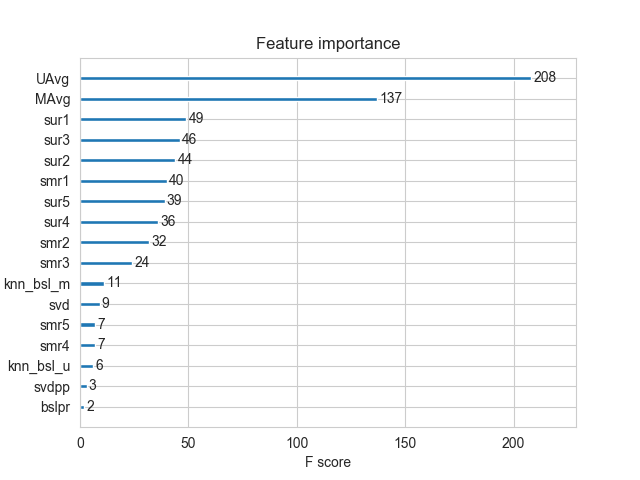

In [93]:
# prepare x_train and y_train
x_train = reg_train.drop(['user', 'movie', 'rating',], axis=1)
y_train = reg_train['rating']

# prepare test data
x_test = reg_test_df.drop(['user', 'movie', 'rating'], axis=1)
y_test = reg_test_df['rating']


xgb_final = xgb.XGBRegressor(objective='reg:squarederror',n_jobs=10, random_state=15)
train_results, test_results = run_xgboost(xgb_final, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_final'] = train_results
models_evaluation_test['xgb_final'] = test_results


xgb.plot_importance(xgb_final)
plt.show()

<h4> 4.4.7.2 Hyperparameter Tuning </h4>

In [107]:
start = datetime.now()

#A parameter grid for XGBoost
params = {
        'eta' : [0.05,0.1,0.3],
        'min_child_weight': [5,6,7,8,9,10],
        'gamma': [0,0.10,0.20,0.50, 0.75,0.8,0.9],
        'subsample': [0.5,0.6, 0.7, 0.8,0.9],
        'colsample_bytree': [0.5, 0.6, 0.7,0.8,0.9],
        'max_depth': [3, 4, 5, 6, 7, 8,9,10],
        'n_estimators' : [100,150,200,250,300,500,1000]
        }

xgb4 = xgb.XGBRegressor(objective='reg:squarederror',silent=False, verbose=10, n_jobs=-1)
random_search = RandomizedSearchCV(xgb4, param_distributions=params, n_iter=30, 
                                   scoring='neg_mean_squared_error',n_jobs=-1, cv=3, verbose=10, 
                                   random_state=0)
random_search.fit(x_train, y_train)

print('\n Best hyperparameters:')
print(random_search.best_params_)

#Best cross validation RMSE obtained from hyperparameter tuning
print("Best RMSE obtained on Cross Validation data using hyperparameter tuning: ",random_search.best_score_)

print("Time taken to run this cell :", datetime.now() - start)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 41.0min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 44.9min finished



 Best hyperparameters:
{'subsample': 0.9, 'n_estimators': 150, 'min_child_weight': 7, 'max_depth': 5, 'gamma': 0.8, 'eta': 0.3, 'colsample_bytree': 0.6}
Best RMSE obtained on Cross Validation data using hyperparameter tuning:  -0.7216012114115491
Time taken to run this cell : 0:45:10.572863


<h4> 4.4.7.3 Obtaining Results on the Best Values of Hyperparameters Obtained </h4>

Training the model..
Done. Time taken : 0:00:17.570465

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.1094665144483278
MAPE :  33.1278525734442


<IPython.core.display.Javascript object>


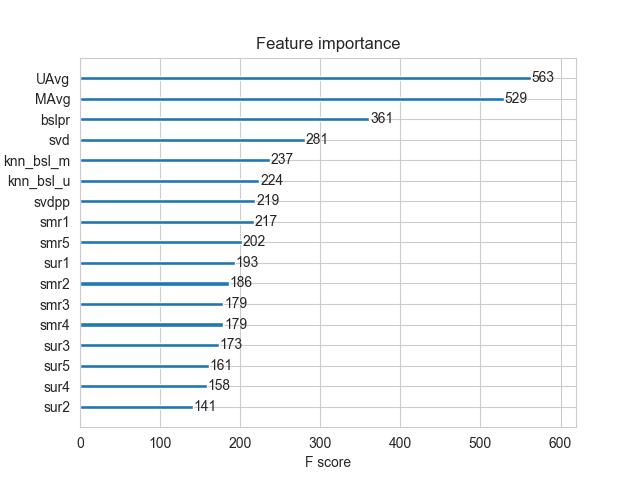

In [94]:
xgb_final = xgb.XGBRegressor(objective='reg:squarederror',subsample=0.9, min_child_weight=7, max_depth=5, gamma=0.8,
                             eta=0.3, colsample_bytree= 0.6, n_estimators = 150,
                             n_jobs=10, random_state=15)
train_results, test_results = run_xgboost(xgb_final, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_final'] = train_results
models_evaluation_test['xgb_final'] = test_results

xgb.plot_importance(xgb_final)
plt.show()

<h3> 4.4.8 XGBoost with Surprise Baseline + Surprise KNNbaseline + MF Techniques </h3>

* We now prepare a model after we skip the initial 13 features to see the results that we obtain in this case.

<h4> 4.4.8.1 Working with Default Values of Hyperparameters </h4>

Training the model..
Done. Time taken : 0:00:05.019977

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0753047860953797
MAPE :  35.07058962951319


<IPython.core.display.Javascript object>


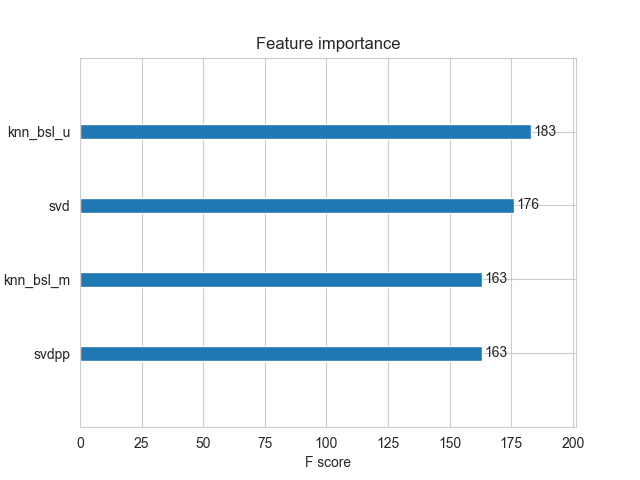

In [95]:
# prepare train data
x_train = reg_train[['knn_bsl_u', 'knn_bsl_m', 'svd', 'svdpp']]
y_train = reg_train['rating']

# test data
x_test = reg_test_df[['knn_bsl_u', 'knn_bsl_m', 'svd', 'svdpp']]
y_test = reg_test_df['rating']


xgb_all_models = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=10, random_state=15)
train_results, test_results = run_xgboost(xgb_all_models, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_all_models'] = train_results
models_evaluation_test['xgb_all_models'] = test_results

xgb.plot_importance(xgb_all_models)
plt.show()

 <h4> Observations </h4>

* The SVD Feature Importance that we obtained is the Highest followed by the Feature Importances for the remaining models. *We can notice that there is not much of a difference in the feature importance value among our different models, which means that all of these features are important in this case.* 

***As long as our features are reasonable, the addition of features to a model like XGBoost should make them perform better.*** 

<h4> 4.4.8.2 Hyperparameter Tuning </h4>

In [96]:
from datetime import datetime
import time 
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

start = datetime.now()

#A parameter grid for XGBoost
params = {
        'eta' : [0.05,0.1,0.3],
        'min_child_weight': [5,6,7,8,9,10],
        'gamma': [0,0.10,0.20,0.50, 0.75,0.8,0.9],
        'subsample': [0.5,0.6, 0.7, 0.8,0.9],
        'colsample_bytree': [0.5, 0.6, 0.7,0.8,0.9],
        'max_depth': [3, 4, 5, 6, 7, 8,9,10],
        'n_estimators' : [100,150,200,250,300,500,1000]
        }

xgb5 = xgb.XGBRegressor(objective='reg:squarederror',silent=False, verbose=10, n_jobs=-1)
random_search = RandomizedSearchCV(xgb5, param_distributions=params, n_iter=30, 
                                   scoring='neg_mean_squared_error',n_jobs=-1, cv=3, verbose=10, 
                                   random_state=0)
random_search.fit(x_train, y_train)

print('\n Best hyperparameters:')
print(random_search.best_params_)

#Best cross validation RMSE obtained from hyperparameter tuning
print("Best RMSE obtained on Cross Validation data using hyperparameter tuning: ",random_search.best_score_)

print("Time taken to run this cell :", datetime.now() - start)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 17.5min finished



 Best hyperparameters:
{'subsample': 0.9, 'n_estimators': 100, 'min_child_weight': 10, 'max_depth': 3, 'gamma': 0.1, 'eta': 0.3, 'colsample_bytree': 0.7}
Best RMSE obtained on Cross Validation data using hyperparameter tuning:  -1.161928005483737
Time taken to run this cell : 0:17:33.476997


<h4> 4.4.8.3 Obtaining Results on the Best Values of Hyperparameters Obtained </h4>

Training the model..
Done. Time taken : 0:00:04.525890

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0754027121361314
MAPE :  35.03419297154077


<IPython.core.display.Javascript object>


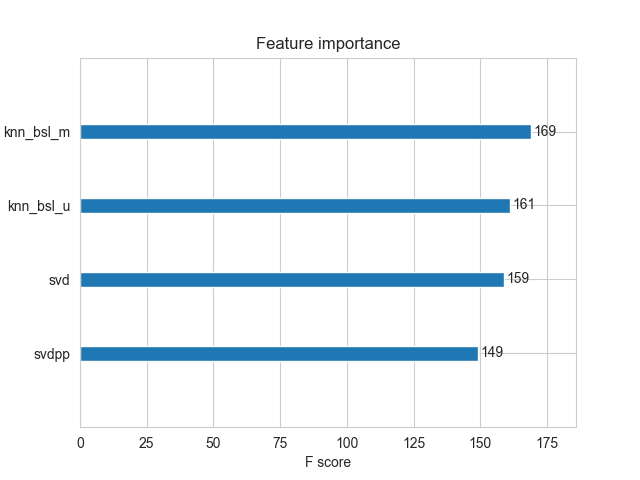

In [97]:
xgb_all_models = xgb.XGBRegressor(objective='reg:squarederror', subsample=0.9, min_child_weight=10, max_depth=3,
                                  gamma= 0.1, eta = 0.3, colsample_bytree = 0.7, n_estimators = 100, 
                                  n_jobs=10, random_state=15)
train_results, test_results = run_xgboost(xgb_all_models, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_all_models'] = train_results
models_evaluation_test['xgb_all_models'] = test_results

xgb.plot_importance(xgb_all_models)
plt.show()

<h2> 4.5 Comparison between All Models </h2>

In [97]:
# Saving our Test Results into a dataframe so that you don't have to run it again
pd.DataFrame(models_evaluation_test).to_csv('sample/small/small_sample_results.csv')
models = pd.read_csv('sample/small/small_sample_results.csv', index_col=0)
models.loc['rmse'].sort_values()

svd               1.0726046873826458
knn_bsl_u         1.0726493739667242
knn_bsl_m          1.072758832653683
svdpp             1.0728491944183447
bsl_algo          1.0730330260516174
xgb_all_models    1.0754027121361314
xgb_knn_bsl       1.0755700033759097
first_algo        1.0969415081270293
xgb_final         1.1094665144483278
xgb_bsl           1.1287786334381198
Name: rmse, dtype: object

<h4> Observations </h4>

* Here we have sorted the Test RMSE Values for each of the Models that we have computed in ascending order, ie. the Best Model that we have is SVD and the worst model that we have is 'xgb_bsl'.
* RMSE Values on Test Data that we have here so far : 
                            
                            SVD = 1.0726
                        xgb_bsl = 1.128.

***We only obtain a 4.96% improvement in this case from the Worst Model to the Best Model.***

<h4> Q. Why are we carrying out all of this approach only for 4.96% Relative Improvement in our RMSE Values? </h4>

* Note that here we have only taken a Small Sample Size. We have considered only 10K Users and 1K Movies for our Training Data and a Total of 5K Users and 500 Movies for our Test Data.
* These values could significantly improve if we improve our Sample Data sizes for Train and Test.

 <h1> 5. Applying Machine Learning Models on Sample of 25K Users and 3K Movies </h1>

<h2> 5.1 Sampling Data : 25K Users and 3K Movies</h2>

<h3>5.1.1 Build Sample Train Data from the Train Data </h3>

In [98]:
start = datetime.now()
path = "sample/small/sample_train_sparse_matrix_25k.npz"
if os.path.isfile(path):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    sample_train_sparse_matrix_25k = sparse.load_npz(path)
    print("DONE..")
else: 
    # get 25k users and 3k movies from available data 
    sample_train_sparse_matrix_25k = get_sample_sparse_matrix(train_sparse_matrix, no_users=25000, no_movies=3000,
                                             path = path)

print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:00.093352


<h3>5.1.2 Build sample test data from the test data</h3>

In [99]:
start = datetime.now()

path = "sample/small/sample_test_sparse_matrix_25k.npz"
if os.path.isfile(path):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    sample_test_sparse_matrix_25k = sparse.load_npz(path)
    print("DONE..")
else:
    # get 12.5k users and 1.5k movies from available data 
    sample_test_sparse_matrix_25k = get_sample_sparse_matrix(test_sparse_matrix, no_users=12500, no_movies=1500,
                                                 path = "sample/small/sample_test_sparse_matrix_25k.npz")
print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:00.052122


<h2>5.2 Finding Global Average of all Movie Ratings, Average Rating per User, and Average Rating per Movie (from Sampled Train)</h2>

<h3>5.2.1 Finding Global Average of all Movie Ratings</h3>

In [100]:
sample_train_averages_25k = dict()

global_average_train_25k = sample_train_sparse_matrix_25k.sum()/sample_train_sparse_matrix_25k.count_nonzero()
sample_train_averages_25k['global'] = global_average_train_25k
sample_train_averages_25k

{'global': 3.5875813607223455}

<h3>5.2.2 Finding Average Rating per User</h3>

In [101]:
sample_train_averages_25k['user'] = get_average_ratings(sample_train_sparse_matrix_25k, of_users=True)
print('\nAverage rating of user 1179 :',sample_train_averages_25k['user'][1179])


Average rating of user 1179 : 3.3529411764705883


<h3>5.2.3 Finding Average Rating per Movie</h3>

In [102]:
sample_train_averages_25k['movie'] =  get_average_ratings(sample_train_sparse_matrix_25k, of_users=False)
print('\n Average rating of movie 1098:',sample_train_averages_25k['movie'][1098])


 Average rating of movie 1098: 4.100401606425703


<h2> 5.3 Featurizing Data </h2>

In [103]:
print('\n No of ratings in Our Sampled train matrix is : {}\n'.format(sample_train_sparse_matrix_25k.count_nonzero()))
print('\n No of ratings in Our Sampled test  matrix is : {}\n'.format(sample_test_sparse_matrix_25k.count_nonzero()))


 No of ratings in Our Sampled train matrix is : 856986


 No of ratings in Our Sampled test  matrix is : 69407



<h3> 5.3.1 Featurizing Data for Regression Problem </h3>

<h4> 5.3.1.1 Featurizing Train Data </h4>

In [104]:
# get users, movies and ratings from our samples train sparse matrix
sample_train_users_25k, sample_train_movies_25k, sample_train_ratings_25k = sparse.find(sample_train_sparse_matrix_25k)

In [105]:
start = datetime.now()
if os.path.isfile('sample/small/reg_train_25k.csv'):
    print("File already exists and you don't have to prepare the same once again..." )
else:
    print('Preparing {} tuples for the dataset..\n'.format(len(sample_train_ratings_25k)))
    with open('sample/small/reg_train_25k.csv', mode='w') as reg_data_file:
        count = 0
        for (user, movie, rating)  in zip(sample_train_users_25k, sample_train_movies_25k, sample_train_ratings_25k):
            st = datetime.now()
        #     print(user, movie)    
            #--------------------- Ratings of "movie" by similar users of "user" ---------------------
            # compute the similar Users of the "user"        
            user_sim = cosine_similarity(sample_train_sparse_matrix_25k[user], sample_train_sparse_matrix_25k).ravel()
            top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            
            # get the ratings of most similar users for this movie
            top_ratings = sample_train_sparse_matrix_25k[top_sim_users, movie].toarray().ravel()
            # we will make it's length "5" by adding movie averages to .
            top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_users_ratings.extend([sample_train_averages_25k['movie'][movie]]*(5 - len(top_sim_users_ratings)))
            # print(top_sim_users_ratings, end=" ")    


            #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
            # compute the similar movies of the "movie"        
            movie_sim = cosine_similarity(sample_train_sparse_matrix_25k[:,movie].T, sample_train_sparse_matrix_25k.T).ravel()
            top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar movie rated by this user..
            top_ratings = sample_train_sparse_matrix_25k[user, top_sim_movies].toarray().ravel()
            # we will make it's length "5" by adding user averages to.
            top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_movies_ratings.extend([sample_train_averages_25k['user'][user]]*(5-len(top_sim_movies_ratings))) 
            # print(top_sim_movies_ratings, end=" : -- ")

            #-----------------prepare the row to be stores in a file-----------------#
            row = list()
            row.append(user)
            row.append(movie)
            # Now add the other features to this data...
            row.append(sample_train_averages_25k['global']) # first feature
            # next 5 features are similar_users "movie" ratings
            row.extend(top_sim_users_ratings)
            # next 5 features are "user" ratings for similar_movies
            row.extend(top_sim_movies_ratings)
            # Avg_user rating
            row.append(sample_train_averages_25k['user'][user])
            # Avg_movie rating
            row.append(sample_train_averages_25k['movie'][movie])

            # finally, The actual Rating of this user-movie pair...
            row.append(rating)
            count = count + 1

            # add rows to the file opened..
            reg_data_file.write(','.join(map(str, row)))
            reg_data_file.write('\n')        
            if (count)%10000 == 0:
                # print(','.join(map(str, row)))
                print("Done for {} rows----- {}".format(count, datetime.now() - start))


print(datetime.now() - start)


File already exists and you don't have to prepare the same once again...
0:00:00.001751


__Reading from the file to make a Train Dataframe__

In [106]:
reg_train_25k = pd.read_csv('sample/small/reg_train_25k.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5','smr1', 'smr2', 'smr3', 'smr4', 'smr5', 'UAvg', 'MAvg', 'rating'], header=None)
reg_train_25k.head()

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,174683,10,3.587581,5.0,5.0,3.0,4.0,4.0,3.0,5.0,4.0,3.0,2.0,3.882353,3.611111,5
1,233949,10,3.587581,4.0,4.0,5.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0,2.692308,3.611111,3
2,555770,10,3.587581,4.0,5.0,4.0,4.0,5.0,4.0,2.0,5.0,4.0,4.0,3.795455,3.611111,4
3,767518,10,3.587581,2.0,5.0,4.0,4.0,3.0,5.0,5.0,4.0,4.0,3.0,3.884615,3.611111,5
4,894393,10,3.587581,3.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.000000,3.611111,4


<h4> 5.3.1.2 Featurizing Test Data </h4>

In [107]:
# get users, movies and ratings from the Sampled Test 
sample_test_users_25k, sample_test_movies_25k, sample_test_ratings_25k = sparse.find(sample_test_sparse_matrix_25k)

In [108]:
start = datetime.now()

if os.path.isfile('sample/small/reg_test_25k.csv'):
    print("It is already created...")
else:

    print('Preparing {} tuples for the dataset..\n'.format(len(sample_test_ratings_25k)))
    with open('sample/small/reg_test_25k.csv', mode='w') as reg_data_file:
        count = 0 
        for (user, movie, rating)  in zip(sample_test_users_25k, sample_test_movies_25k, sample_test_ratings_25k):
            st = datetime.now()

        #--------------------- Ratings of "movie" by similar users of "user" ---------------------
            #print(user, movie)
            try:
                # compute the similar Users of the "user"        
                user_sim = cosine_similarity(sample_train_sparse_matrix_25k[user], sample_train_sparse_matrix_25k).ravel()
                top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
                # get the ratings of most similar users for this movie
                top_ratings = sample_train_sparse_matrix_25k[top_sim_users, movie].toarray().ravel()
                # we will make it's length "5" by adding movie averages to .
                top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
                top_sim_users_ratings.extend([sample_train_averages_25k['movie'][movie]]*(5 - len(top_sim_users_ratings)))
                # print(top_sim_users_ratings, end="--")

            except (IndexError, KeyError):
                # It is a new User or new Movie or there are no ratings for given user for top similar movies...
                ########## Cold STart Problem ##########
                top_sim_users_ratings.extend([sample_train_averages_25k['global']]*(5 - len(top_sim_users_ratings)))
                #print(top_sim_users_ratings)
            except:
                print(user, movie)
                # we just want KeyErrors to be resolved. Not every Exception...
                raise


        #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
            try:
                # compute the similar movies of the "movie"        
                movie_sim = cosine_similarity(sample_train_sparse_matrix_25k[:,movie].T, sample_train_sparse_matrix_25k.T).ravel()
                top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
                # get the ratings of most similar movie rated by this user..
                top_ratings = sample_train_sparse_matrix_25k[user, top_sim_movies].toarray().ravel()
                # we will make it's length "5" by adding user averages to.
                top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
                top_sim_movies_ratings.extend([sample_train_averages_25k['user'][user]]*(5-len(top_sim_movies_ratings))) 
                #print(top_sim_movies_ratings)
            except (IndexError, KeyError):
                #print(top_sim_movies_ratings, end=" : -- ")
                top_sim_movies_ratings.extend([sample_train_averages_25k['global']]*(5-len(top_sim_movies_ratings)))
                #print(top_sim_movies_ratings)
            except :
                raise

            #-----------------prepare the row to be stores in a file-----------------#
            row = list()
            # add usser and movie name first
            row.append(user)
            row.append(movie)
            row.append(sample_train_averages_25k['global']) # first feature
            #print(row)
            # next 5 features are similar_users "movie" ratings
            row.extend(top_sim_users_ratings)
            #print(row)
            # next 5 features are "user" ratings for similar_movies
            row.extend(top_sim_movies_ratings)
            #print(row)
            # Avg_user rating
            try:
                row.append(sample_train_averages_25k['user'][user])
            except KeyError:
                row.append(sample_train_averages_25k['global'])
            except:
                raise
            #print(row)
            # Avg_movie rating
            try:
                row.append(sample_train_averages_25k['movie'][movie])
            except KeyError:
                row.append(sample_train_averages_25k['global'])
            except:
                raise
            #print(row)
            # finally, The actual Rating of this user-movie pair...
            row.append(rating)
            #print(row)
            count = count + 1

            # add rows to the file opened..
            reg_data_file.write(','.join(map(str, row)))
            #print(','.join(map(str, row)))
            reg_data_file.write('\n')        
            if (count)%1000 == 0:
                #print(','.join(map(str, row)))
                print("Done for {} rows----- {}".format(count, datetime.now() - start))
    print("",datetime.now() - start)

It is already created...


__Reading from the file to make a Test Dataframe__

In [109]:
reg_test_25k = pd.read_csv('sample/small/reg_test_25k.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5',
                                                          'smr1', 'smr2', 'smr3', 'smr4', 'smr5',
                                                          'UAvg', 'MAvg', 'rating'], header=None)
reg_test_25k.head(4)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,1129620,2,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3
1,779046,71,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,5
2,808635,71,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,5
3,898730,71,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3


<h3> 5.3.2 Transforming Data for Surprise Models</h3>

<h4> 5.3.2.1 Transforming Train Data </h4>

In [110]:
# It is to specify how to read the dataframe.
# for our dataframe, we don't have to specify anything extra..
reader_25k = Reader(rating_scale=(1,5))

# create the traindata from the dataframe...
train_data_25k = Dataset.load_from_df(reg_train_25k[['user', 'movie', 'rating']], reader_25k)
#reg_train is the actual training data and convert it into 'train_data', which is the surprise variable in which
#all of the Training Data is stored.

# build the trainset from traindata.., It is of dataset format from surprise library..
trainset_25k = train_data_25k.build_full_trainset() 

<h4> 5.3.2.2 Transforming Test Data </h4>

In [111]:
testset_25k = list(zip(reg_test_25k.user.values, reg_test_25k.movie.values, reg_test_25k.rating.values))
testset_25k[:3]

[(1129620, 2, 3), (779046, 71, 5), (808635, 71, 5)]

<h2> 5.4 Applying Machine Learning Models on Sample of 25K Users and 3K Movies </h2>

In [112]:
models_evaluation_train_25k = dict()
models_evaluation_test_25k = dict()

models_evaluation_train_25k, models_evaluation_test_25k

({}, {})

<h3> 5.4.1 XGBoost with Initial 13 Features </h3>

<h4> 5.4.1.1 Working with Default Values of Hyperparameters </h4>

Training the model..
Done. Time taken : 0:00:46.984662

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.091407621273764
MAPE :  34.96412446313194


<IPython.core.display.Javascript object>


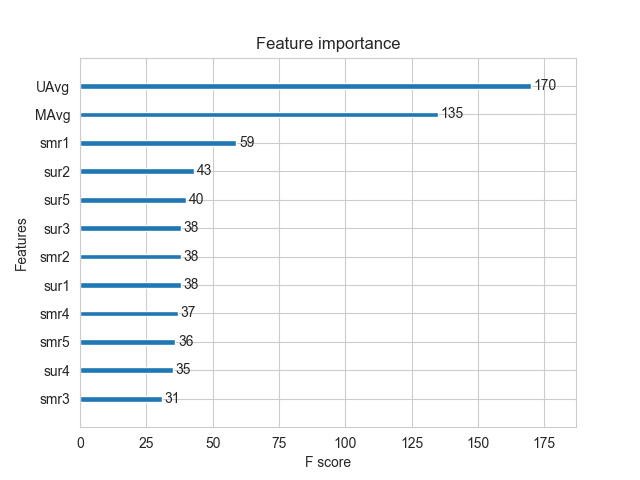

In [113]:
import warnings
warnings.filterwarnings("ignore")

# prepare Train data
x_train_25k = reg_train_25k.drop(['user','movie','rating'], axis=1)
y_train_25k = reg_train_25k['rating']

# Prepare Test data
x_test_25k = reg_test_25k.drop(['user','movie','rating'], axis=1)
y_test_25k = reg_test_25k['rating']

# initialize Our first XGBoost model...
first_xgb_25k = xgb.XGBRegressor(objective ='reg:squarederror', 
                              silent=False, n_jobs=13, random_state=15, n_estimators=100)
train_results_25k, test_results_25k = run_xgboost(first_xgb_25k, x_train_25k, y_train_25k, x_test_25k, y_test_25k)

# store the results in models_evaluations dictionaries
models_evaluation_train_25k['first_algo'] = train_results_25k
models_evaluation_test_25k['first_algo'] = test_results_25k

xgb.plot_importance(first_xgb_25k)
plt.show()

<h4> 5.4.1.2 Hyperparameter Tuning </h4>

In [116]:
from datetime import datetime
import time 
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

start = datetime.now()

#A parameter grid for XGBoost
params = {
        'eta' : [0.05,0.1,0.3],
        'min_child_weight': [5,6,7,8,9,10],
        'gamma': [0,0.10,0.20,0.50, 0.75,0.8,0.9],
        'subsample': [0.5,0.6, 0.7, 0.8,0.9],
        'colsample_bytree': [0.5, 0.6, 0.7,0.8,0.9],
        'max_depth': [3, 4, 5, 6, 7, 8,9,10],
        'n_estimators' : [100,150,200,250,300,500,1000]
        }


xgb1 = xgb.XGBRegressor(objective='reg:squarederror',silent=False, verbose=10, n_jobs=-1)
random_search_25k = RandomizedSearchCV(xgb1, param_distributions=params, n_iter=30, 
                                   scoring='neg_mean_squared_error',n_jobs=-1, cv=3, verbose=10, 
                                   random_state=0)
random_search_25k.fit(x_train_25k, y_train_25k)

print('\n Best hyperparameters:')
print(random_search_25k.best_params_)

#Best cross validation RMSE obtained from hyperparameter tuning
print("Best RMSE obtained on Cross Validation data using hyperparameter tuning: ",random_search_25k.best_score_)

print("Time taken to run this cell :", datetime.now() - start)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 70.5min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 88.0min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 106.7min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 123.3min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 148.5min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 175.9min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 198.1min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 217.4min finished



 Best hyperparameters:
{'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 8, 'max_depth': 8, 'gamma': 0.75, 'eta': 0.05, 'colsample_bytree': 0.5}
Best RMSE obtained on Cross Validation data using hyperparameter tuning:  -0.7391804880648525
Time taken to run this cell : 3:38:47.271046


<h4> 5.4.1.3 Obtaining Results on the Best Values of Hyperparameters Obtained </h4>

Training the model..
Done. Time taken : 0:01:17.412008

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.1569290622625428
MAPE :  33.32350192651349


<IPython.core.display.Javascript object>


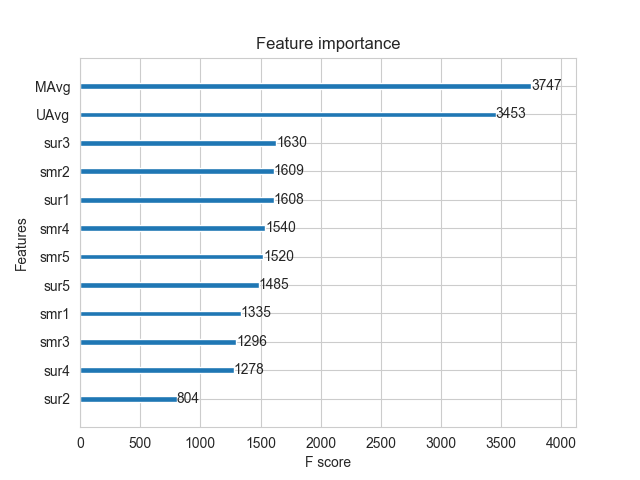

In [114]:
# initialize Our first XGBoost model...
first_xgb = xgb.XGBRegressor(objective='reg:squarederror',subsample=0.7, min_child_weight=8, max_depth=8, 
                             gamma=0.75, eta = 0.05, colsample_bytree = 0.5, silent=False, n_jobs=13, 
                             random_state=15, n_estimators=100)
train_results_25k, test_results_25k = run_xgboost(first_xgb, x_train_25k, y_train_25k, x_test_25k, y_test_25k)

# store the results in models_evaluations dictionaries
models_evaluation_train_25k['first_algo'] = train_results_25k
models_evaluation_test_25k['first_algo'] = test_results_25k

xgb.plot_importance(first_xgb)
plt.show()

<h3> 5.4.2 Suprise BaselineModel </h3>

In [115]:
# options are to specify.., how to compute those user and item biases
bsl_options = {'method': 'sgd',
               'learning_rate': .001
               }

bsl_algo_25k = BaselineOnly(bsl_options=bsl_options)
# run this algorithm.., It will return the train and test results..
bsl_train_results_25k, bsl_test_results_25k = run_surprise(bsl_algo_25k, trainset_25k, testset_25k, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train_25k['bsl_algo'] = bsl_train_results_25k 
models_evaluation_test_25k['bsl_algo'] = bsl_test_results_25k

Training the model...
Estimating biases using sgd...
Done. time taken : 0:00:07.735154 

Evaluating the model with train data..
time taken : 0:00:09.700036
---------------
Train Data
---------------
RMSE : 0.9220478981418425

MAPE : 28.6415868708249

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.854377
---------------
Test Data
---------------
RMSE : 1.0866775936742565

MAPE : 35.01103359557571

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:18.290306


<h3> 5.4.3 XGBoost with initial 13 features + Surprise Baseline predictor </h3>

__Updating Train Data__

In [116]:
# add our baseline_predicted value as our feature..
reg_train_25k['bslpr'] = models_evaluation_train_25k['bsl_algo']['predictions']
reg_train_25k.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,174683,10,3.587581,5.0,5.0,3.0,4.0,4.0,3.0,5.0,4.0,3.0,2.0,3.882353,3.611111,5,3.681393
1,233949,10,3.587581,4.0,4.0,5.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0,2.692308,3.611111,3,3.720150


__Updating Test Data__

In [117]:
# add that baseline predicted ratings with Surprise to the test data as well
reg_test_25k['bslpr']  = models_evaluation_test_25k['bsl_algo']['predictions']
reg_test_25k.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,1129620,2,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3,3.587581
1,779046,71,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,5,3.587581


<h4> 5.4.3.1 Working with Default Values of Hyperparameters </h4>

Training the model..
Done. Time taken : 0:00:57.578752

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.091407621273764
MAPE :  34.96412446313194


<IPython.core.display.Javascript object>


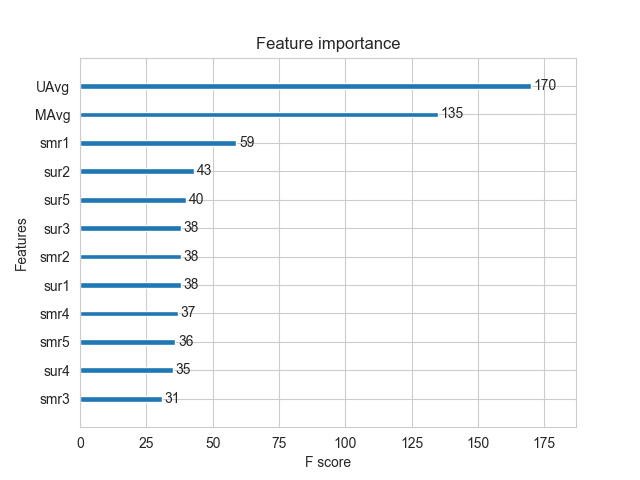

In [118]:
import warnings
warnings.filterwarnings("ignore")

# prepare train data
x_train_25k = reg_train_25k.drop(['user', 'movie','rating'], axis=1)
y_train_25k = reg_train_25k['rating']

# Prepare Test data
x_test_25k = reg_test_25k.drop(['user','movie','rating'], axis=1)
y_test_25k = reg_test_25k['rating']

# initialize Our first XGBoost model...
xgb_bsl_25k = xgb.XGBRegressor(objective='reg:squarederror',silent=False, n_jobs=13, random_state=15, 
                           n_estimators=100)
train_results_25k, test_results_25k = run_xgboost(xgb_bsl_25k, x_train_25k, y_train_25k, x_test_25k, y_test_25k)

# store the results in models_evaluations dictionaries
models_evaluation_train_25k['xgb_bsl'] = train_results_25k
models_evaluation_test_25k['xgb_bsl'] = test_results_25k

xgb.plot_importance(xgb_bsl_25k)
plt.show()

<h4> 5.4.3.2 Hyperparameter Tuning </h4>

In [121]:
start = datetime.now()

#A parameter grid for XGBoost
params = {
        'eta' : [0.05,0.1,0.3],
        'min_child_weight': [5,6,7,8,9,10],
        'gamma': [0,0.10,0.20,0.50, 0.75,0.8,0.9],
        'subsample': [0.5,0.6, 0.7, 0.8,0.9],
        'colsample_bytree': [0.5, 0.6, 0.7,0.8,0.9],
        'max_depth': [3, 4, 5, 6, 7, 8,9,10],
        'n_estimators' : [100,150,200,250,300,500,1000]
        }

xgb2 = xgb.XGBRegressor(objective='reg:squarederror',silent=False, verbose=10, n_jobs=4)
random_search_25k = RandomizedSearchCV(xgb2, param_distributions=params, n_iter=30, 
                                   scoring='neg_mean_squared_error',n_jobs=4, cv=3, verbose=10, 
                                   random_state=0)
random_search_25k.fit(x_train_25k, y_train_25k)

print('\n Best hyperparameters:')
print(random_search_25k.best_params_)

#Best cross validation RMSE obtained from hyperparameter tuning
print("Best RMSE obtained on Cross Validation data using hyperparameter tuning: ",random_search_25k.best_score_)

print("Time taken to run this cell :", datetime.now() - start)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed: 24.5min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 29.2min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed: 78.8min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 106.3min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 128.4min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 149.7min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 179.4min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 210.1min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed: 233.7min
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed: 252.9min finished



 Best hyperparameters:
{'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 8, 'max_depth': 8, 'gamma': 0.75, 'eta': 0.05, 'colsample_bytree': 0.5}
Best RMSE obtained on Cross Validation data using hyperparameter tuning:  -0.7402914705973153
Time taken to run this cell : 4:14:29.845510


<h4> 5.4.3.3 Obtaining Results on the Best Values of Hyperparameters Obtained </h4>

Training the model..
Done. Time taken : 0:01:36.297804

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.1137327676505375
MAPE :  34.212455503695985


<IPython.core.display.Javascript object>


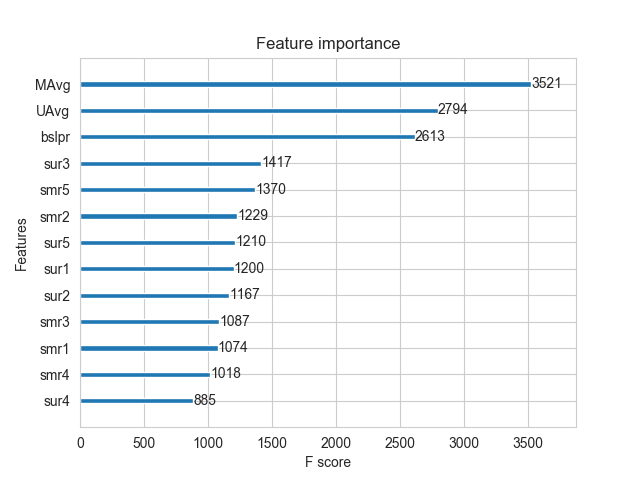

In [119]:
# initialize Our first XGBoost model...
xgb_bsl_25k = xgb.XGBRegressor(objective='reg:squarederror',subsample=0.7, min_child_weight=8, max_depth=8, 
                           gamma=0.75, eta = 0.05, colsample_bytree = 0.5, silent=False, n_jobs=13, 
                           random_state=15, n_estimators=100)
train_results_25k, test_results_25k = run_xgboost(xgb_bsl_25k, x_train_25k, y_train_25k, x_test_25k, y_test_25k)

# store the results in models_evaluations dictionaries
models_evaluation_train_25k['xgb_bsl'] = train_results_25k
models_evaluation_test_25k['xgb_bsl'] = test_results_25k

xgb.plot_importance(xgb_bsl_25k)
plt.show()

<h3> 5.4.4 Surprise KNNBaseline predictor </h3>


<h4> 5.4.4.1 Surprise KNNBaseline with user user similarities</h4>

In [120]:
# we specify , how to compute similarities and what to consider with sim_options to our algorithm
sim_options_25k = {'user_based' : True,
               'name': 'pearson_baseline',
               'shrinkage': 100,
               'min_support': 2
              } 
# we keep other parameters like regularization parameter and learning_rate as default values.
bsl_options_25k = {'method': 'sgd'} 

knn_bsl_u_25k = KNNBaseline(k=40, sim_options = sim_options_25k, bsl_options = bsl_options_25k)
knn_bsl_u_train_results_25k, knn_bsl_u_test_results_25k = run_surprise(knn_bsl_u_25k, trainset_25k,\
                                                                       testset_25k, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train_25k['knn_bsl_u'] = knn_bsl_u_train_results_25k 
models_evaluation_test_25k['knn_bsl_u'] = knn_bsl_u_test_results_25k

Training the model...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done. time taken : 1:07:35.434640 

Evaluating the model with train data..
time taken : 0:38:36.925240
---------------
Train Data
---------------
RMSE : 0.4536279292470732

MAPE : 12.840252350475915

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:02.153500
---------------
Test Data
---------------
RMSE : 1.0872139165792538

MAPE : 35.01367548984769

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 1:46:14.552388


<h4> 5.4.4.2 Surprise KNNBaseline with Movie Movie Similarities</h4>

In [121]:
# we specify , how to compute similarities and what to consider with sim_options to our algorithm

# 'user_based' : False => this considers the similarities of movies instead of users

sim_options_25k = {'user_based' : False,
               'name': 'pearson_baseline',
               'shrinkage': 100,
               'min_support': 2
                   } 
# we keep other parameters like regularization parameter and learning_rate as default values.
bsl_options_25k = {'method': 'sgd'}


knn_bsl_m_25k = KNNBaseline(k=40, sim_options = sim_options_25k, bsl_options = bsl_options_25k)

knn_bsl_m_train_results_25k, knn_bsl_m_test_results_25k = run_surprise(knn_bsl_m_25k, trainset_25k, \
                                                                       testset_25k, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train_25k['knn_bsl_m'] = knn_bsl_m_train_results_25k 
models_evaluation_test_25k['knn_bsl_m'] = knn_bsl_m_test_results_25k

Training the model...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done. time taken : 0:00:15.836459 

Evaluating the model with train data..
time taken : 0:02:40.292026
---------------
Train Data
---------------
RMSE : 0.5038994796517224

MAPE : 14.168515366483724

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:01.392335
---------------
Test Data
---------------
RMSE : 1.0874504808868481

MAPE : 35.01640799571963

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:02:57.521486


<h3> 5.4.5 XGBoost with Initial 13 Features + Surprise Baseline predictor + KNNBaseline predictor </h3>

__Preparing Train data__

In [122]:
# add the predicted values from both knns to this dataframe
reg_train_25k['knn_bsl_u'] = models_evaluation_train_25k['knn_bsl_u']['predictions']
reg_train_25k['knn_bsl_m'] = models_evaluation_train_25k['knn_bsl_m']['predictions']

reg_train_25k.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m
0,174683,10,3.587581,5.0,5.0,3.0,4.0,4.0,3.0,5.0,4.0,3.0,2.0,3.882353,3.611111,5,3.681393,4.984495,4.884782
1,233949,10,3.587581,4.0,4.0,5.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0,2.692308,3.611111,3,3.720150,3.181296,3.295934


__Preparing Test data__

In [123]:
reg_test_25k['knn_bsl_u'] = models_evaluation_test_25k['knn_bsl_u']['predictions']
reg_test_25k['knn_bsl_m'] = models_evaluation_test_25k['knn_bsl_m']['predictions']

reg_test_25k.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m
0,1129620,2,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3,3.587581,3.587581,3.587581
1,779046,71,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,5,3.587581,3.587581,3.587581


<h4> 5.4.5.1 Working with Default Values of Hyperparameters </h4>

Training the model..
Done. Time taken : 0:01:07.158291

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0913016265184956
MAPE :  34.97523719488302


<IPython.core.display.Javascript object>


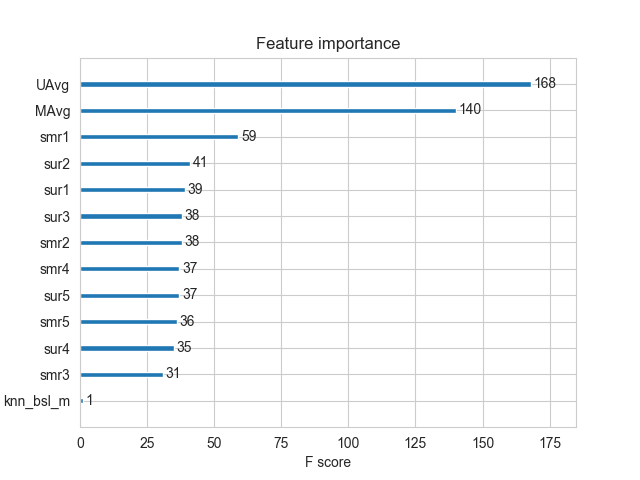

In [124]:
# prepare the train data....
x_train_25k = reg_train_25k.drop(['user', 'movie', 'rating'], axis=1)
y_train_25k = reg_train_25k['rating']

# prepare the test data....
x_test_25k = reg_test_25k.drop(['user','movie','rating'], axis=1)
y_test_25k = reg_test_25k['rating']

# declare the model
xgb_knn_bsl_25k = xgb.XGBRegressor(objective='reg:squarederror',n_jobs=10, random_state=15)
train_results_25k, test_results_25k = run_xgboost(xgb_knn_bsl_25k, x_train_25k, y_train_25k, x_test_25k, y_test_25k)

# store the results in models_evaluations dictionaries
models_evaluation_train_25k['xgb_knn_bsl'] = train_results_25k
models_evaluation_test_25k['xgb_knn_bsl'] = test_results_25k

xgb.plot_importance(xgb_knn_bsl_25k)
plt.show()

<h4> 5.4.5.2 Hyperparameter Tuning </h4>

In [127]:
start = datetime.now()

#A parameter grid for XGBoost
params = {
        'eta' : [0.05,0.1,0.3],
        'min_child_weight': [5,6,7,8,9,10],
        'gamma': [0,0.10,0.20,0.50, 0.75,0.8,0.9],
        'subsample': [0.5,0.6, 0.7, 0.8,0.9],
        'colsample_bytree': [0.5, 0.6, 0.7,0.8,0.9],
        'max_depth': [3, 4, 5, 6, 7, 8,9,10],
        'n_estimators' : [100,150,200,250,300,500,1000]
        }

xgb3 = xgb.XGBRegressor(objective='reg:squarederror',silent=False, verbose=10, n_jobs=4)
random_search_25k = RandomizedSearchCV(xgb3, param_distributions=params, n_iter=30, 
                                   scoring='neg_mean_squared_error',n_jobs=4, cv=3, verbose=10, 
                                   random_state=0)
random_search_25k.fit(x_train_25k, y_train_25k)

print('\n Best hyperparameters:')
print(random_search_25k.best_params_)

#Best cross validation RMSE obtained from hyperparameter tuning
print("Best RMSE obtained on Cross Validation data using hyperparameter tuning: ",random_search_25k.best_score_)

print("Time taken to run this cell :", datetime.now() - start)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed: 31.1min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 37.2min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed: 103.0min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 133.2min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 159.9min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 185.4min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 221.6min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 259.4min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed: 290.2min
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed: 316.2min finished



 Best hyperparameters:
{'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 8, 'max_depth': 8, 'gamma': 0.75, 'eta': 0.05, 'colsample_bytree': 0.5}
Best RMSE obtained on Cross Validation data using hyperparameter tuning:  -0.7419109518897743
Time taken to run this cell : 5:18:30.836573


<h4> 5.4.5.3 Obtaining Results on the Best Values of Hyperparameters Obtained </h4>

Training the model..
Done. Time taken : 0:01:57.077372

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0952803852501523
MAPE :  34.78200452033061


<IPython.core.display.Javascript object>


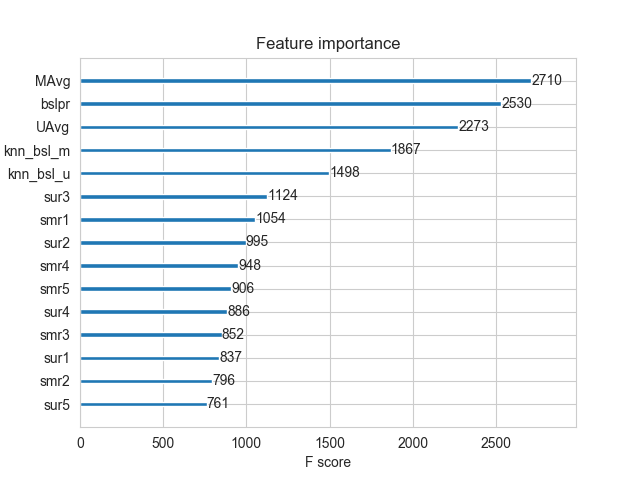

In [125]:
# declare the model
xgb_knn_bsl_25k = xgb.XGBRegressor(objective='reg:squarederror',subsample = 0.7, min_child_weight=8,
                               max_depth=8, gamma=0.75, eta=0.05, colsample_bytree=0.5, n_estimators=100,
                               n_jobs=10, random_state=15)
train_results_25k, test_results_25k = run_xgboost(xgb_knn_bsl_25k, x_train_25k, y_train_25k, x_test_25k, y_test_25k)

# store the results in models_evaluations dictionaries
models_evaluation_train_25k['xgb_knn_bsl'] = train_results_25k
models_evaluation_test_25k['xgb_knn_bsl'] = test_results_25k

xgb.plot_importance(xgb_knn_bsl_25k)
plt.show()

<h3> 5.4.6 Matrix Factorization Techniques </h3>


<h4> 5.4.6.1 SVD Matrix Factorization User Movie interactions </h4>

In [126]:
# initiallize the model
svd_25k = SVD(n_factors=100, biased=True, random_state=15, verbose=True)
svd_train_results_25k, svd_test_results_25k = run_surprise(svd_25k, trainset_25k, testset_25k, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train_25k['svd'] = svd_train_results_25k 
models_evaluation_test_25k['svd'] = svd_test_results_25k

Training the model...
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Done. time taken : 0:00:59.078874 

Evaluating the model with train data..
time taken : 0:00:11.861458
---------------
Train Data
---------------
RMSE : 0.6746731413267192

MAPE : 20.054795546700834

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.851481
---------------
Test Data
---------------
RMSE : 1.0866896789690303

MAPE : 34.94168324135605

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:01:11.792671


<h4> 5.4.6.2 SVD Matrix Factorization with Implicit Feedback from User ( User Rated Movies ) </h4>

In [127]:
# initiallize the model
svdpp_25k = SVDpp(n_factors=50, random_state=15, verbose=True)
svdpp_train_results_25k, svdpp_test_results_25k = run_surprise(svdpp_25k, trainset_25k, testset_25k, verbose=True)

# Just store these error metrics in our models_evaluation data structure
models_evaluation_train_25k['svdpp'] = svdpp_train_results_25k 
models_evaluation_test_25k['svdpp'] = svdpp_test_results_25k

Training the model...
 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
Done. time taken : 0:44:35.677612 

Evaluating the model with train data..
time taken : 0:01:57.039788
---------------
Train Data
---------------
RMSE : 0.6641918784333875

MAPE : 19.24213231265533

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.848422
---------------
Test Data
---------------
RMSE : 1.0871659127583222

MAPE : 34.90263199512074

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:46:33.566676


<h3> 5.4.7 XGBoost with 13 Features + Surprise Baseline + Surprise KNNbaseline + MF Techniques </h3>

__Preparing Train data__

In [128]:
# add the predicted values from both knns to this dataframe
reg_train_25k['svd'] = models_evaluation_train_25k['svd']['predictions']
reg_train_25k['svdpp'] = models_evaluation_train_25k['svdpp']['predictions']

reg_train_25k.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,...,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m,svd,svdpp
0,174683,10,3.587581,5.0,5.0,3.0,4.0,4.0,3.0,5.0,...,3.0,2.0,3.882353,3.611111,5,3.681393,4.984495,4.884782,4.073348,3.884115
1,233949,10,3.587581,4.0,4.0,5.0,1.0,3.0,2.0,3.0,...,3.0,3.0,2.692308,3.611111,3,3.720150,3.181296,3.295934,3.649073,3.618476


__Preparing Test data__

In [129]:
reg_test_25k['svd'] = models_evaluation_test_25k['svd']['predictions']
reg_test_25k['svdpp'] = models_evaluation_test_25k['svdpp']['predictions']

reg_test_25k.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,...,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m,svd,svdpp
0,1129620,2,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,...,3.587581,3.587581,3.587581,3.587581,3,3.587581,3.587581,3.587581,3.587581,3.587581
1,779046,71,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,...,3.587581,3.587581,3.587581,3.587581,5,3.587581,3.587581,3.587581,3.587581,3.587581


<h4> 5.4.7.1 Working with Default Values of Hyperparameters </h4>

Training the model..
Done. Time taken : 0:01:14.012499

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0913016265184956
MAPE :  34.97523719488302


<IPython.core.display.Javascript object>


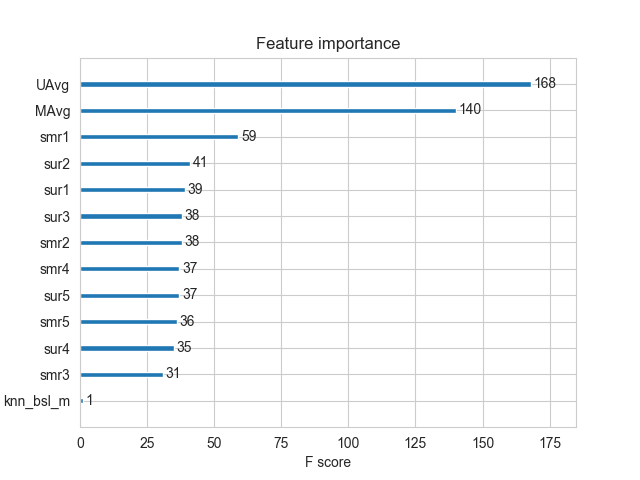

In [130]:
# prepare x_train and y_train
x_train_25k = reg_train_25k.drop(['user', 'movie', 'rating',], axis=1)
y_train_25k = reg_train_25k['rating']

# prepare test data
x_test_25k = reg_test_25k.drop(['user', 'movie', 'rating'], axis=1)
y_test_25k = reg_test_25k['rating']


xgb_final_25k = xgb.XGBRegressor(objective='reg:squarederror',n_jobs=10, random_state=15)
train_results_25k, test_results_25k = run_xgboost(xgb_final_25k, x_train_25k, y_train_25k, x_test_25k, y_test_25k)

# store the results in models_evaluations dictionaries
models_evaluation_train_25k['xgb_final'] = train_results_25k
models_evaluation_test_25k['xgb_final'] = test_results_25k


xgb.plot_importance(xgb_final_25k)
plt.show()

<h4> 5.4.7.2 Hyperparameter Tuning </h4>

In [130]:
start = datetime.now()

#A parameter grid for XGBoost
params = {
        'eta' : [0.05,0.1,0.3],
        'min_child_weight': [5,6,7,8,9,10],
        'gamma': [0,0.10,0.20,0.50, 0.75,0.8,0.9],
        'subsample': [0.5,0.6, 0.7, 0.8,0.9],
        'colsample_bytree': [0.5, 0.6, 0.7,0.8,0.9],
        'max_depth': [3, 4, 5, 6, 7, 8,9,10],
        'n_estimators' : [100,150,200,250,300,500,1000]
        }

xgb4 = xgb.XGBRegressor(objective='reg:squarederror',silent=False, verbose=10, n_jobs=4)
random_search_25k = RandomizedSearchCV(xgb4, param_distributions=params, n_iter=30, 
                                   scoring='neg_mean_squared_error',n_jobs=4, cv=3, verbose=10, 
                                   random_state=0)
random_search_25k.fit(x_train_25k, y_train_25k)

print('\n Best hyperparameters:')
print(random_search_25k.best_params_)

#Best cross validation RMSE obtained from hyperparameter tuning
print("Best RMSE obtained on Cross Validation data using hyperparameter tuning: ",random_search_25k.best_score_)

print("Time taken to run this cell :", datetime.now() - start)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed: 35.8min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 42.3min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed: 117.9min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 147.1min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 180.5min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 209.1min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 249.3min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 290.1min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed: 324.5min
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed: 349.6min finished



 Best hyperparameters:
{'subsample': 0.9, 'n_estimators': 150, 'min_child_weight': 7, 'max_depth': 5, 'gamma': 0.8, 'eta': 0.3, 'colsample_bytree': 0.6}
Best RMSE obtained on Cross Validation data using hyperparameter tuning:  -0.7424653649610596
Time taken to run this cell : 5:51:48.490900


<h4> 5.4.7.3 Obtaining Results on the Best Values of Hyperparameters Obtained </h4>

Training the model..
Done. Time taken : 0:02:10.090260

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.1117736622032974
MAPE :  34.183467373557995


<IPython.core.display.Javascript object>


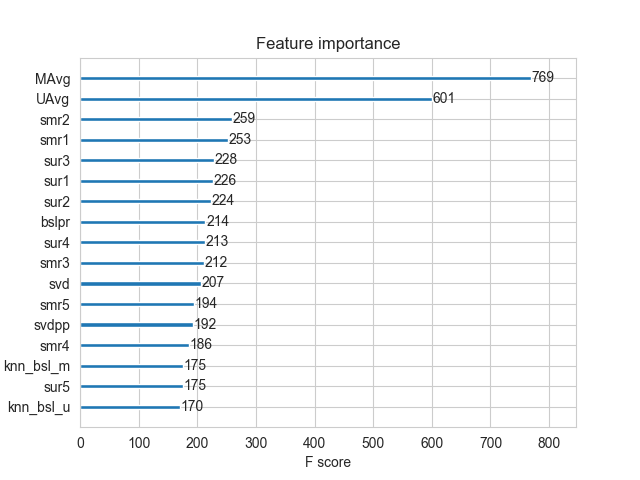

In [131]:
xgb_final_25k = xgb.XGBRegressor(objective='reg:squarederror',subsample=0.9, min_child_weight=7, max_depth=5,
                                 gamma=0.8, eta=0.3, colsample_bytree= 0.6, n_estimators = 150,
                                 n_jobs=10, random_state=15)
train_results_25k, test_results_25k = run_xgboost(xgb_final_25k, x_train_25k, y_train_25k, x_test_25k, y_test_25k)

# store the results in models_evaluations dictionaries
models_evaluation_train_25k['xgb_final'] = train_results_25k
models_evaluation_test_25k['xgb_final'] = test_results_25k

xgb.plot_importance(xgb_final_25k)
plt.show()

<h3> 5.4.8 XGBoost with Surprise Baseline + Surprise KNNbaseline + MF Techniques </h3>

<h4> 5.4.8.1 Working with Default Values of Hyperparameters </h4>

Training the model..
Done. Time taken : 0:00:46.779585

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0960253198154102
MAPE :  35.60981788329692


<IPython.core.display.Javascript object>


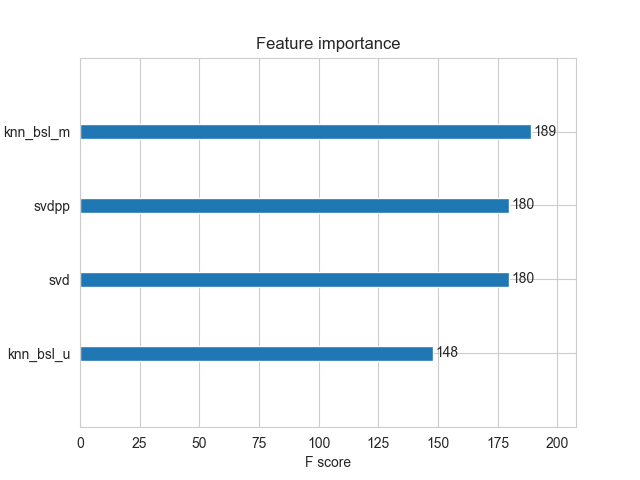

In [132]:
# prepare train data
x_train_25k = reg_train_25k[['knn_bsl_u', 'knn_bsl_m', 'svd', 'svdpp']]
y_train_25k = reg_train_25k['rating']

# test data
x_test_25k = reg_test_25k[['knn_bsl_u', 'knn_bsl_m', 'svd', 'svdpp']]
y_test_25k = reg_test_25k['rating']


xgb_all_models = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=10, random_state=15)
train_results_25k, test_results_25k = run_xgboost(xgb_all_models, x_train_25k, y_train_25k, x_test_25k, y_test_25k)

# store the results in models_evaluations dictionaries
models_evaluation_train_25k['xgb_all_models'] = train_results_25k
models_evaluation_test_25k['xgb_all_models'] = test_results_25k

xgb.plot_importance(xgb_all_models)
plt.show()

<h4> 5.4.8.2 Hyperparameter Tuning </h4>

In [134]:
from datetime import datetime
import time 
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

start = datetime.now()

#A parameter grid for XGBoost
params = {
        'eta' : [0.05,0.1,0.3],
        'min_child_weight': [5,6,7,8,9,10],
        'gamma': [0,0.10,0.20,0.50, 0.75,0.8,0.9],
        'subsample': [0.5,0.6, 0.7, 0.8,0.9],
        'colsample_bytree': [0.5, 0.6, 0.7,0.8,0.9],
        'max_depth': [3, 4, 5, 6, 7, 8,9,10],
        'n_estimators' : [100,150,200,250,300,500,1000]
        }

xgb5 = xgb.XGBRegressor(objective='reg:squarederror',silent=False, verbose=10, n_jobs=4)
random_search_25k = RandomizedSearchCV(xgb5, param_distributions=params, n_iter=30, 
                                   scoring='neg_mean_squared_error',n_jobs=4, cv=3, verbose=10, 
                                   random_state=0)
random_search_25k.fit(x_train_25k, y_train_25k)

print('\n Best hyperparameters:')
print(random_search_25k.best_params_)

#Best cross validation RMSE obtained from hyperparameter tuning
print("Best RMSE obtained on Cross Validation data using hyperparameter tuning: ",random_search_25k.best_score_)

print("Time taken to run this cell :", datetime.now() - start)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed: 15.6min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 18.6min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed: 48.4min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 64.3min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 80.7min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 96.9min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 119.0min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 139.7min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed: 154.6min
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed: 168.6min finished



 Best hyperparameters:
{'subsample': 0.9, 'n_estimators': 100, 'min_child_weight': 10, 'max_depth': 3, 'gamma': 0.1, 'eta': 0.3, 'colsample_bytree': 0.7}
Best RMSE obtained on Cross Validation data using hyperparameter tuning:  -1.1721368124100702
Time taken to run this cell : 2:49:12.146576


<h4> 5.4.8.3 Obtaining Results on the Best Values of Hyperparameters Obtained </h4>

Training the model..
Done. Time taken : 0:00:39.078282

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0960428087215164
MAPE :  35.614861832020864


<IPython.core.display.Javascript object>


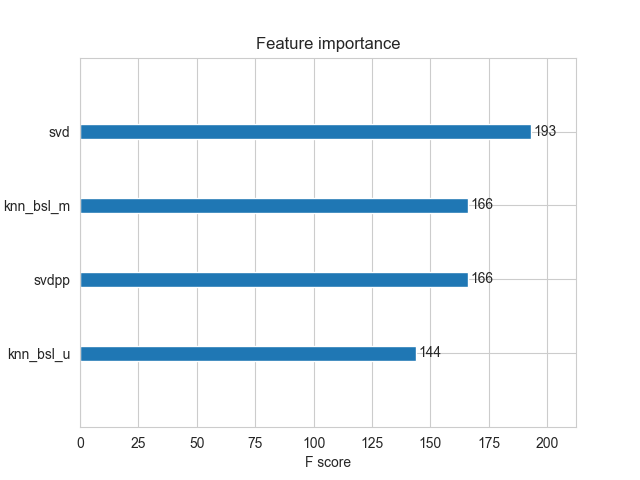

In [135]:
xgb_all_models_25k = xgb.XGBRegressor(objective='reg:squarederror', subsample=0.9, min_child_weight=10, max_depth=3,
                                  gamma= 0.1, eta = 0.3, colsample_bytree = 0.7, n_estimators = 100, 
                                  n_jobs=10, random_state=15)
train_results_25k, test_results_25k = run_xgboost(xgb_all_models_25k, x_train_25k, y_train_25k, x_test_25k, y_test_25k)

# store the results in models_evaluations dictionaries
models_evaluation_train_25k['xgb_all_models'] = train_results_25k
models_evaluation_test_25k['xgb_all_models'] = test_results_25k

xgb.plot_importance(xgb_all_models_25k)
plt.show()

# 6. Conclusion 

The Business Problem that we were trying to solve over here was to Recommend Movies to Users on Netflix. Netflix had its own CineMatch Movie Recommendation Algorithm which carries out its own Implementation. However, the important point is that there are many alternative approaches than the algorithmic approach that is followed by CineMatch, both present in literature as well as some innovations. 

The Error Metric that Netflix was using was RMSE, which is the Evaluation Metric that we took into consideration, with the challenge being to improve CineMatch's RMSE Value by 10%. However, we also consider MAPE as another evaluation metric to understand the relative error differences. Along with this, we knew that our Models need to be somewhat interpretable so that the user knows why a particular Movie/TV Show is being recommended to him/her.

We carried out Temporal Splitting of our Total Data into Train and Test Datasets, with the oldest 80% of our data being Training Data and the latest 20% being our Test Dataset, after which we carried out EDA on top of the Training Data. After this, we created Sparse Matrix from our Dataframe because we needed our Data to be present in a Matrix Format to work with, after which we computed the values of the Global Average of Ratings, the User Average as well as Movie Average.

<b> Netflix is a Rapidly growing platform over the past few years and hence we will face challenges, such as where we do not know what to recommend to a user who has just joined Netflix : This Problem is called the Cold Start Problem. </b> We observed that this Cold Start Problem is severe in the Case of Users and is not very severe when it comes to Movies.

After this, we tried to compute the User-User as well as Movie-Movie Similarity Matrices, and we realise by running for a Sample of 100 users, that to run this entire code snippet for 405K users would take us > 41 days, which even after parallelization still takes approx. 10.5 days (using 4 Cores). To overcome this problem, we developed a hack such that we created a dictionary of dictionaries to store these values, and we compute the User-User Similarities as and when needed, at runtime : We do not compute the entire matrix to start with.

Finally, we take a Sample of 10K Users and 1K movies out of our entire dataset which consisted of 405K users and 17K Movies. This sample size was considered only for faster execution of our code, even though we know that by increasing the number of users as well as movies, our Test RMSE Values will most likely decrease considerably. {In order to check the difference in the results, we run all of our Models with different featurizations once again, where we take a sample size of 25K Users and 3K Movies}. I would have definitely loved to increase this sample size, and maybe try and work on the entire dataset without Sampling, but working on this small sample dataset itself took me more than 3 days of System Runtime for Featurizing the Train Data, and another 8-9 hours to Featurize the Test Data, because of System constraints.

We apply multiple models on our samples : Models such as using 13 Handcrafted Features (5 Most Similar Users, 5 Most Similar Movies, User Avg, Movie Avg, Global Avg) etc., Surprise Baseline Model feature, KNNbaseline Surprise Model with both User-User and Movie-Movie computations, and the Matrix Factorization Techniques of SVD and SVD++. Summary of the Results that we obtained is as shown below using the 'PrettyTable' Library :

In [8]:
from prettytable import PrettyTable

x=PrettyTable()
x.field_names=["Model","Test RMSE","Test MAPE"]

print ("Taking a Sample Size of 10K Users and 1K Movies :")
print("="*100)

x.add_row(["XGBoost (13 Features) (W/O Tuning)","1.076","34.482"])
x.add_row(["XGBoost (13 Features) (With Tuning)","1.096","33.520"])
x.add_row(["Surprise Baseline Model","1.073","35.049"])
x.add_row(["XGBoost (13 Features) + Surprise Baseline (W/O Tuning)","1.076","34.464"])
x.add_row(["XGBoost (13 Features) + Surprise Baseline (With Tuning)","1.128","32.669"])
x.add_row(["Surprise KNNBaseline (User-User Similarities)","1.072","35.020"])
x.add_row(["Surprise KNNBaseline (Movie-Movie Similarities)","1.072","35.022"])
x.add_row(["XGBoost (13 Features) + Surprise Baseline + KNNBaseline (W/O Tuning)","1.076","34.447"])
x.add_row(["XGBoost (13 Features) + Surprise Baseline + KNNBaseline (With Tuning)","1.075","34.573"])
x.add_row(["Matrix Factorization (SVD)","1.072","35.019"])
x.add_row(["Matrix Factorization (SVDPP)","1.072","35.038"])
x.add_row(["XGBoost (13 Features) + Surprise Baseline + KNNBaseline + MF (W/O Tuning)","1.076","34.431"])
x.add_row(["XGBoost (13 Features) + Surprise Baseline + KNNBaseline + MF (With Tuning)","1.109","33.127"])
x.add_row(["XGBoost with Surprise Baseline + KNNBaseline + MF (W/O Tuning)","1.075","35.070"])
x.add_row(["XGBoost with Surprise Baseline + KNNBaseline + MF (With Tuning)","1.075","35.034"])
print(x)

Taking a Sample Size of 10K Users and 1K Movies :
+----------------------------------------------------------------------------+-----------+-----------+
|                                   Model                                    | Test RMSE | Test MAPE |
+----------------------------------------------------------------------------+-----------+-----------+
|                     XGBoost (13 Features) (W/O Tuning)                     |   1.076   |   34.482  |
|                    XGBoost (13 Features) (With Tuning)                     |   1.096   |   33.520  |
|                          Surprise Baseline Model                           |   1.073   |   35.049  |
|           XGBoost (13 Features) + Surprise Baseline (W/O Tuning)           |   1.076   |   34.464  |
|          XGBoost (13 Features) + Surprise Baseline (With Tuning)           |   1.128   |   32.669  |
|               Surprise KNNBaseline (User-User Similarities)                |   1.072   |   35.020  |
|              Surprise

In [9]:
y=PrettyTable()
y.field_names=["Model","Test RMSE","Test MAPE"]

print ("Taking a Sample Size of 25K Users and 3K Movies :")
print("="*100)

y.add_row(["XGBoost (13 Features) (W/O Tuning)","1.091","34.964"])
y.add_row(["XGBoost (13 Features) (With Tuning)","1.156","33.323"])
y.add_row(["Surprise Baseline Model","1.086","35.011"])
y.add_row(["XGBoost (13 Features) + Surprise Baseline (W/O Tuning)","1.091","34.964"])
y.add_row(["XGBoost (13 Features) + Surprise Baseline (With Tuning)","1.113","34.212"])
y.add_row(["Surprise KNNBaseline (User-User Similarities)","1.087","35.013"])
y.add_row(["Surprise KNNBaseline (Movie-Movie Similarities)","1.087","35.016"])
y.add_row(["XGBoost (13 Features) + Surprise Baseline + KNNBaseline (W/O Tuning)","1.091","34.975"])
y.add_row(["XGBoost (13 Features) + Surprise Baseline + KNNBaseline (With Tuning)","1.095","34.782"])
y.add_row(["Matrix Factorization (SVD)","1.086","34.941"])
y.add_row(["Matrix Factorization (SVDPP)","1.087","34.902"])
y.add_row(["XGBoost (13 Features) + Surprise Baseline + KNNBaseline + MF (W/O Tuning)","1.091","34.975"])
y.add_row(["XGBoost (13 Features) + Surprise Baseline + KNNBaseline + MF (With Tuning)","1.111","34.183"])
y.add_row(["XGBoost with Surprise Baseline + KNNBaseline + MF (W/O Tuning)","1.096","35.609"])
y.add_row(["XGBoost with Surprise Baseline + KNNBaseline + MF (With Tuning)","1.096","35.614"])
print(y)

Taking a Sample Size of 25K Users and 3K Movies :
+----------------------------------------------------------------------------+-----------+-----------+
|                                   Model                                    | Test RMSE | Test MAPE |
+----------------------------------------------------------------------------+-----------+-----------+
|                     XGBoost (13 Features) (W/O Tuning)                     |   1.091   |   34.964  |
|                    XGBoost (13 Features) (With Tuning)                     |   1.156   |   33.323  |
|                          Surprise Baseline Model                           |   1.086   |   35.011  |
|           XGBoost (13 Features) + Surprise Baseline (W/O Tuning)           |   1.091   |   34.964  |
|          XGBoost (13 Features) + Surprise Baseline (With Tuning)           |   1.113   |   34.212  |
|               Surprise KNNBaseline (User-User Similarities)                |   1.087   |   35.013  |
|              Surprise

***The Reason why our Test RMSE Values are worse when our Data Sample Size is large could be because when we increase the training data we get a more diverse dataset on which our models are not able to fit properly.***